In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score

# Load the dataframe
df = pd.read_excel("dataset_excavate.xlsx")

# Display basic information
print(df.info())
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check unique values in 'PBE band gap' to identify non-numeric entries
print("Unique values in 'PBE band gap':", df['PBE band gap'].unique())

# Clean the 'PBE band gap' column
# Replace non-numeric values with NaN
# Try converting the column to numeric directly, setting errors='coerce' replaces non-numeric values with NaN
df['PBE band gap'] = pd.to_numeric(df['PBE band gap'], errors='coerce')

# Check for missing values again after conversion
print("Missing values after cleaning 'PBE band gap':\n", df['PBE band gap'].isnull().sum())

# Drop rows with NaN values after conversion
df.dropna(subset=['PBE band gap'], inplace=True)

# Check unique values in 'PBE band gap' after cleaning
print("Unique values in 'PBE band gap' after cleaning:", df['PBE band gap'].unique())

# Define target for classification (Binary)
df['is_insulator'] = df['PBE band gap'].apply(lambda x: 1 if x >= 0.0 else 0)

# Splitting Features and Target
X = df.drop(columns=['PBE band gap', 'functional group', 'is_insulator'])  # Drop non-numeric and target columns
y = df['is_insulator']

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check if any columns in X are entirely NaN or have too many missing values
print("Missing values in features (X):\n", X.isnull().sum())

# Check the shape of X to ensure it's not empty
print("Shape of X after cleaning:", X.shape)

# If there are any rows with NaN values in X, drop them (and ensure corresponding y values are dropped as well)
X.dropna(inplace=True)
y = y[X.index]  # Ensure that target labels correspond to remaining rows

# If after dropping, the dataset becomes too small (e.g., no rows left), raise a warning or handle the data differently
if X.shape[0] == 0:
    print("Warning: After cleaning, no samples remain for training. Please check your data or consider imputing missing values.")
else:
    print("Remaining rows in X after cleaning:", X.shape[0])

# Normalize data only if there are samples left
if X.shape[0] > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train Classification Model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)

    # Evaluate Classification
    print("Classification Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # --- Regression Model (Only for Insulators) ---
    df_insulators = df[df['is_insulator'] == 1]  # Filter only insulators

    X_reg = df_insulators.drop(columns=['PBE band gap', 'functional group', 'is_insulator'])
    y_reg = df_insulators['PBE band gap']

    # Ensure all columns in X_reg are numeric
    X_reg = X_reg.apply(pd.to_numeric, errors='coerce')

    # Drop rows where any feature in X_reg is NaN
    X_reg.dropna(inplace=True)
    y_reg = y_reg[X_reg.index]  # Ensure that target labels correspond to remaining rows

    # Normalize data for regression
    scaler_reg = StandardScaler()
    X_reg_scaled = scaler_reg.fit_transform(X_reg)

    # Split dataset
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

    # Train Regression Model
    reg = RandomForestRegressor(n_estimators=100, random_state=42)
    reg.fit(X_train_reg, y_train_reg)

    # Predictions
    y_pred_reg = reg.predict(X_test_reg)

    # Evaluate Regression
    print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_reg))
    print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
    print("R2 Score:", r2_score(y_test_reg, y_pred_reg))

    # Plot Predicted vs Actual
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
    plt.xlabel("Actual Band Gap")
    plt.ylabel("Predicted Band Gap")
    plt.title("Actual vs Predicted Band Gap (Regression)")
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)  # Diagonal line
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   functional group  5152 non-null   object 
 1   A                 5152 non-null   object 
 2   A_OS              5152 non-null   int64  
 3   A'                5152 non-null   object 
 4   A'_OS             5152 non-null   int64  
 5   A_HOMO-           5152 non-null   float64
 6   A_HOMO+           5152 non-null   float64
 7   A_IE-             5152 non-null   float64
 8   A_IE+             5152 non-null   float64
 9   A_LUMO-           5152 non-null   float64
 10  A_LUMO+           5152 non-null   float64
 11  A_X-              5152 non-null   float64
 12  A_X+              5152 non-null   float64
 13  A_Z_radii-        5152 non-null   float64
 14  A_Z_radii+        5152 non-null   float64
 15  A_e_affin-        5152 non-null   float64
 16  A_e_affin+        5152 non-null   float64


In [ ]:
"# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe
data = pd.read_excel("dataset_excavate.xlsx")
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Preprocessing
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as necessary
data.fillna(df.mean(), inplace=True)

# Feature selection
# Define features and target variable for classification
X_classification = df.drop(columns=['PBE Band Gap'])
y_classification = (df['PBE Band Gap'] >= 0.5).astype(int) # 1 for insulators, 0 for non-insulators

# Split the dataset into training and testing sets (80-20 split)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Create and train the classification model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = classifier.predict(X_test_class)

# Evaluate the classification model
print(classification_report(y_test_class, y_pred_class))

# Now for the regression task, we only use insulators
insulators_data = df[df['PBE Band Gap'] > 0.5]
X_regression = insulators_df.drop(columns=['PBE Band Gap'])
y_regression = insulators_df['PBE Band Gap']

# Split the insulator dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Create and train the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = regressor.predict(X_test_reg)

# Evaluate the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Mean Squared Error for Regression: {mse}')

# Optional: Visualize the predictions vs actual values for regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs Predicted Band Gap for Insulators')
plt.plot([0, max(y_test_reg)], [0, max(y_test_reg)], color='red', linestyle='--') # Diagonal line
plt.show()

  functional group   A  A_OS  A'  A'_OS  A_HOMO-  A_HOMO+   A_IE-   A_IE+  \
0       AgBaAuCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
1       AgBaAuHgO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
2       AgBaMoCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
3           AgBiO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   
4           AgBrO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   

   A_LUMO-  ...   B_X+  B_Z_radii-  B_Z_radii+  B_e_affin-  B_e_affin+  \
0   0.6485  ...  2.115      0.2225      2.4375       145.4        77.4   
1   0.6485  ...  2.270      0.1250      2.5350       135.4        87.4   
2   0.6485  ...  1.925      0.2525      2.4675        70.0         2.0   
3   0.0000  ...  2.020      0.0000      1.9970         0.0        91.3   
4   0.0000  ...  2.960      0.0000      1.2000         0.0       324.7   

   PBE band gap        μ       μĀ     μ𝐵 ̅        t  
0        0.0000  0.54286  0.13571  0.1

TypeError: Could not convert ['AgBaAuCdO6AgBaAuHgO6AgBaMoCdO6AgBiO3AgBrO3AgCaRePtO6AgCdAuTaO6AgCdAuTiO6AgCdReAuO6AgCsReAuO6AgCsTaAuO6AgCsZrSnO6AgCsZrTeO6AgCuReAuO6AgEuReAuO6AgEuTiAuO6AgEuWMgO6AgHfO3AgHgAuTaO6AgHgAuTiO6AgHgReAuO6AgHgWAlO6AgIrO3AgKReAuO6AgKTaAuO6AgLiAuTaO6AgMgFe2O6AgMgReAuO6AgMgW2O6AgMnReAuO6AgMoO3AgNaReAuO6AgNbO3AgNO3AgOsO3AgPbO3AgPbWAlO6AgPdAuTiO6AgPdO3AgPdReAuO6AgPO3AgPtO3AgRbReAuO6AgRbTaAuO6AgReO3AgRhO3AgRuO3AgSbO3AgSnO3AgTaO3AgTcO3AgTiO3AgTlAuTaO6AgTlAuTiO6AgTlHfNiO6AgTlHfPtO6AgTlHfSiO6AgTlReAuO6AgTlSbScO6AgVO3AgWO3AgYbWMgO6AgZnReAuO6AgZrO3AlBO3AsBO3AuAsO3AuBaMnInO6AuCoO3AuCrO3AuFeO3AuGaO3AuIO3AuMnO3AuMoO3AuNbO3AuNiO3AuOsO3AuReO3AuSbO3AuSmMnInO6AuTaO3AuTcO3AuWO3Ba2AlNbO6Ba2AsTmO6Ba2AuCeO6Ba2AuDyO6Ba2AuErO6Ba2AuEuO6Ba2AuGdO6Ba2AuHoO6Ba2AuLaO6Ba2AuLuO6Ba2AuNdO6Ba2AuPmO6Ba2AuPrO6Ba2AuScO6Ba2AuSmO6Ba2AuTaO6Ba2AuTbO6Ba2AuTiO6Ba2AuTmO6Ba2AuYbO6Ba2AuYO6Ba2BiCeO6Ba2BiCrO6Ba2BiDyO6Ba2BiIrO6Ba2BiNbO6Ba2BiPrO6Ba2BiRuO6Ba2BiTmO6Ba2BiVO6Ba2BiYbO6Ba2CaMoO6Ba2CaPuO6Ba2CaReO6Ba2CaWO6Ba2CdMoO6Ba2CdOsO6Ba2CdReO6Ba2CdTeO6Ba2CeIrO6Ba2CePtO6Ba2CePuO6Ba2CeSnO6Ba2CeTaO6Ba2CoIrO6Ba2CoMoO6Ba2CoReO6Ba2CoTaO6Ba2CoTeO6Ba2CoWO6Ba2CrEuO6Ba2CrGdO6Ba2CrLaO6Ba2CrOsO6Ba2CrPrO6Ba2CrReO6Ba2CrTaO6Ba2CrTlO6Ba2CrTmO6Ba2CuOsO6Ba2CuTeO6Ba2DyOsO6Ba2DyReO6Ba2DySbO6Ba2DyTaO6Ba2DyWO6Ba2ErBiO6Ba2ErIrO6Ba2ErMoO6Ba2ErOsO6Ba2ErRuO6Ba2ErSbO6Ba2ErTaO6Ba2EuBiO6Ba2EuMoO6Ba2EuNbO6Ba2EuOsO6Ba2EuRuO6Ba2EuSbO6Ba2EuTaO6Ba2FeBiO6Ba2FeMoO6Ba2FeNbO6Ba2FeOsO6Ba2FeSbO6Ba2FeTaO6Ba2FeWO6Ba2GaNbO6Ba2GdBiO6Ba2GdMoO6Ba2GdNbO6Ba2GdReO6Ba2GdSbO6Ba2GdTaO6Ba2GdWO6Ba2HfSeO6Ba2HfSiO6Ba2HfSnO6Ba2HfTaO6Ba2HfTbO6Ba2HfTiO6Ba2HfZrO6Ba2HoBiO6Ba2HoIrO6Ba2HoOsO6Ba2HoRuO6Ba2HoSbO6Ba2HoTaO6Ba2IGaO6Ba2InBiO6Ba2InIrO6Ba2InNbO6Ba2InOsO6Ba2InPuO6Ba2InReO6Ba2InRuO6Ba2InSbO6Ba2InTaO6Ba2IrDyO6Ba2IrEuO6Ba2IrLaO6Ba2IrLuO6Ba2IrNdO6Ba2IrPmO6Ba2IrTmO6Ba2IrYO6Ba2LaBiO6Ba2LaPuO6Ba2LaRuO6Ba2LaSbO6Ba2LaTaO6Ba2LiIO6Ba2LiOsO6Ba2LiReO6Ba2MgMoO6Ba2MgOsO6Ba2MgPuO6Ba2MgTeO6Ba2MnIrO6Ba2MnLaO6Ba2MnMoO6Ba2MnNbO6Ba2MnOsO6Ba2MnPrO6Ba2MnPuO6Ba2MnRuO6Ba2MnTaO6Ba2MnTeO6Ba2MnWO6Ba2MoCrO6Ba2MoDyO6Ba2MoInO6Ba2MoLuO6Ba2MoZnO6Ba2NaIO6Ba2NaOsO6Ba2NaReO6Ba2NbCeO6Ba2NbDyO6Ba2NbErO6Ba2NbHoO6Ba2NbLaO6Ba2NbLuO6Ba2NbNdO6Ba2NbScO6Ba2NbSmO6Ba2NbTlO6Ba2NbTmO6Ba2NbYO6Ba2NdBiO6Ba2NdMoO6Ba2NdOsO6Ba2NdPuO6Ba2NdReO6Ba2NdRuO6Ba2NdSbO6Ba2NdTaO6Ba2NdWO6Ba2NiMoO6Ba2NiNbO6Ba2NiReO6Ba2NiTeO6Ba2NiWO6Ba2OsCaO6Ba2OsCoO6Ba2OsGdO6Ba2OsLaO6Ba2OsLuO6Ba2OsNiO6Ba2OsPmO6Ba2OsSrO6Ba2OsTbO6Ba2OsYO6Ba2PbMoO6Ba2PbPuO6Ba2PrIrO6Ba2PrNbO6Ba2PrOsO6Ba2PrPtO6Ba2PrRuO6Ba2PrSbO6Ba2PrSiO6Ba2PrSnO6Ba2PrTaO6Ba2PrWO6Ba2PtErO6Ba2PtHoO6Ba2PtLuO6Ba2PtScO6Ba2PtTaO6Ba2ReAuO6Ba2ReErO6Ba2ReFeO6Ba2ReHoO6Ba2ReLaO6Ba2ReLuO6Ba2ReMgO6Ba2ReMnO6Ba2RhLuO6Ba2RhNbO6Ba2RhRuO6Ba2RhTmO6Ba2RuDyO6Ba2RuLuO6Ba2RuTmO6Ba2RuYbO6Ba2SbBiO6Ba2SbCoO6Ba2SbGaO6Ba2SbRhO6Ba2SbTaO6Ba2SbTbO6Ba2SbTlO6Ba2ScBiO6Ba2ScIrO6Ba2ScMoO6Ba2ScOsO6Ba2ScReO6Ba2ScSbO6Ba2ScTaO6Ba2SeCaO6Ba2SeDyO6Ba2SeEuO6Ba2SeSmO6Ba2SeSrO6Ba2SeTmO6Ba2SeVO6Ba2SeYbO6Ba2SmBiO6Ba2SmIrO6Ba2SmMoO6Ba2SmOsO6Ba2SmReO6Ba2SmRuO6Ba2SmSbO6Ba2SmTaO6Ba2SmWO6Ba2SrMoO6Ba2SrPuO6Ba2SrReO6Ba2SrTeO6Ba2SrWO6Ba2TaAlO6Ba2TaBiO6Ba2TaGaO6Ba2TaTlO6Ba2TaZrO6Ba2TbBiO6Ba2TbIrO6Ba2TbNbO6Ba2TbPbO6Ba2TbReO6Ba2TbRuO6Ba2TbSeO6Ba2TbSiO6Ba2TbSnO6Ba2TbTaO6Ba2TcLaO6Ba2TcLuO6Ba2TcYO6Ba2TeCaO6Ba2TiNbO6Ba2TiPuO6Ba2TiTaO6Ba2TlBiO6Ba2TmOsO6Ba2TmReO6Ba2TmSbO6Ba2TmTaO6Ba2VDyO6Ba2VErO6Ba2VEuO6Ba2VGdO6Ba2VHoO6Ba2VLaO6Ba2VNbO6Ba2VNdO6Ba2VPrO6Ba2VTaO6Ba2VTbO6Ba2VTlO6Ba2VTmO6Ba2VYbO6Ba2VYO6Ba2WAlO6Ba2WCdO6Ba2WCrO6Ba2WEuO6Ba2WLuO6Ba2WMgO6Ba2YBiO6Ba2YbIrO6Ba2YbMoO6Ba2YbNbO6Ba2YbOsO6Ba2YbReO6Ba2YbSbO6Ba2YbTaO6Ba2YMoO6Ba2YReO6Ba2YRuO6Ba2YSbO6Ba2YTaO6Ba2ZnOsO6Ba2ZnPuO6Ba2ZnReO6Ba2ZnTeO6Ba2ZnWO6Ba2ZrSiO6Ba2ZrSnO6Ba2ZrTbO6Ba2ZrTiO6BaAgNbInO6BaAuCrInO6BaBiNaTeO6BaCaAuGdO6BaCaAuTaO6BaCaAuTmO6BaCaAuYbO6BaCaAuYO6BaCaBiTmO6BaCaBiYO6BaCaPtTaO6BaCaReAuO6BaCaSbTaO6BaCaSbTmO6BaCaTaBiO6BaCaTaInO6BaCdAuTiO6BaCdPtTaO6BaCdReAuO6BaCeO3BaCO3BaCoO3BaCrO3BaCsCrInO6BaCsMnInO6BaCsMnTbO6BaCsReAlO6BaCsReDyO6BaCsReInO6BaCsReYO6BaCsTaZrO6BaCsWAlO6BaCsWDyO6BaCsWInO6BaCsWTbO6BaCsWTlO6BaCsWYbO6BaCsWZrO6BaEuBiTmO6BaEuBiYO6BaEuCrTmO6BaEuNbInO6BaEuNbTmO6BaEuPtTaO6BaEuReAuO6BaEuTaAlO6BaEuTaBiO6BaEuTaScO6BaEuTcYO6BaEuVPrO6BaEuVTmO6BaEuWAlO6BaFeO3BaHfO3BaIrO3BaKAuSmO6BaKCrInO6BaKFeInO6BaKMnInO6BaKMnTbO6BaKNbHfO6BaKTaZrO6BaKWCeO6BaKWDyO6BaKWErO6BaKWInO6BaKWScO6BaKWTbO6BaKWTlO6BaKWYbO6BaKWYO6BaLaCoRuO6BaLaFeTiO6BaLaLiTeO6BaLaMgMoO6BaLaMgNbO6BaLaMgRuO6BaLaMnMoO6BaLaMnSbO6BaLaMnTaO6BaLaNaTeO6BaLaRuCuO6BaLaZnRuO6BaLiOsInO6BaLiWInO6BaMnO3BaMnReAuO6BaMoO3BaNaCrInO6BaNaFeInO6BaNaMnInO6BaNaMnTbO6BaNaNbHfO6BaNaWAlO6BaNaWAsO6BaNaWBO6BaNaWInO6BaNaWScO6BaNaWTbO6BaNaWTmO6BaNbO3BaNdAsAlO6BaNdAsGaO6BaNdCrInO6BaNdGeSiO6BaNdNiSbO6BaNiO3BaOsO3BaPbBiYO6BaPbNbInO6BaPbNbScO6BaPbO3BaPbSbScO6BaPbTaBiO6BaPbTaScO6BaPbWAlO6BaPdCrInO6BaPdO3BaPrCoNbO6BaPrCoTaO6BaPrLiTeO6BaPrO3BaPuO3BaRbAsNbO6BaRbAsRhO6BaRbAsTaO6BaRbNbHfO6BaRbSeNbO6BaRbSeRhO6BaRbSeScO6BaRbTaHfO6BaRbTaZrO6BaRbWAsO6BaRbWSeO6BaReO3BaRhO3BaRuO3BaSiO3BaSmAsAlO6BaSmAsGaO6BaSmCrInO6BaSnO3BaSrAuCeO6BaSrAuLaO6BaSrAuPrO6BaSrAuScO6BaSrAuTaO6BaSrAuTiO6BaSrAuTmO6BaSrAuYbO6BaSrAuYO6BaSrBiCeO6BaSrBiLaO6BaSrBiScO6BaSrBiTmO6BaSrBiYO6BaSrCoWO6BaSrCrInO6BaSrCrTlO6BaSrHf2O6BaSrHfZrO6BaSrMgWO6BaSrMnAuO6BaSrMnInO6BaSrMnTaO6BaSrMoYbO6BaSrNbLaO6BaSrNbTlO6BaSrNbTmO6BaSrNbYO6BaSrNiWO6BaSrPtCeO6BaSrPtTaO6BaSrReAuO6BaSrSbBiO6BaSrSbGdO6BaSrSbLaO6BaSrSbPrO6BaSrSbTaO6BaSrSbTmO6BaSrSn2O6BaSrTaBiO6BaSrTaGaO6BaSrTaGdO6BaSrTaInO6BaSrTaLaO6BaSrTaPrO6BaSrTaTlO6BaSrTaTmO6BaSrTaYO6BaSrTcLaO6BaSrVBiO6BaSrVInO6BaSrVTlO6BaSrWInO6BaSrZr2O6BaTaO3BaTbO3BaTcO3BaTeO3BaTiO3BaTlCrInO6BaTlMnTbO6BaTmCrLuO6BaTmNbInO6BaTmPtTaO6BaTmReAuO6BaTmTaAlO6BaTmTaBiO6BaTmWAlO6BaWO3BaYbMnAuO6BaYbNbInO6BaYbReAuO6BaYbTaAlO6BaYbWAlO6BaZnReAuO6BaZrO3BCsWInO6BeBaMnInO6BeCsMnInO6BeKMnInO6Bi2CrLiO6Bi2MnAlO6Bi2MoCdO6Bi2MoMgO6Bi2ScCuO6Bi2ScSbO6Bi2SeMnO6Bi2TiMgO6Bi2VLiO6Bi2WCdO6Bi2WMgO6BiAgMoCdO6BiAgWAlO6BiAlO3BiBaAuCdO6BiBaAuHgO6BiBaHfCuO6BiBaHfNiO6BiBaMoCdO6BiBaNbMgO6BiBaNbScO6BiBaPtTaO6BiBaWAlO6BiBaWCdO6BiBaWMgO6BiCaAuCdO6BiCaAuHgO6BiCaAuTiO6BiCaHfAuO6BiCaHfCuO6BiCaMoCdO6BiCaReAuO6BiCaTaAuO6BiCaWCdO6BiCdAuMgO6BiCdHfCuO6BiCdReAuO6BiCdSeTaO6BiCdTaAuO6BiCePtCdO6BiCeSeTiO6BiCeWCdO6BiCoO3BiCrO3BiCsInNbO6BiCsReAuO6BiCsTaAuO6BiCsTiTeO6BiCsVInO6BiCsWAlO6BiCsWInO6BiCsZrSnO6BiCuWAlO6BiFeReAuO6BiHgAuMgO6BiHgAuTaO6BiHgAuTiO6BiHgMoMgO6BiHgReAuO6BiHgReSeO6BiHgSeFeO6BiHgSeTaO6BiHgTaTeO6BiHgTiSeO6BiHgTiTeO6BiHgWAlO6BiHgWMgO6BiHoCoTiO6BiInO3BiKAuTaO6BiKInNbO6BiKTaScO6BiKWCeO6BiKWCsO6BiKWInO6BiLiPtTaO6BiLiReAuO6BiLiTaAuO6BiLuSeTiO6BiMgReAuO6BiMgTaPtO6BiMnO3BiMnReAuO6BiMnWAlO6BiPbAuHgO6BiPbHfCoO6BiPbHfCuO6BiPbMoCdO6BiPbMoMgO6BiPbNbMgO6BiPbNbScO6BiPbNiScO6BiPbWAlO6BiPbWCdO6BiPbWMgO6BiPrWCdO6BiPtWAlO6BiRbAuTaO6BiRbHfSiO6BiRbPtTaO6BiRbScSbO6BiRbTaTeO6BiRbTiTeO6BiRbWAlO6BiRbZrSnO6BiRbZrTeO6BiRhO3BiScO3BiSmO3BiSrAuHgO6BiSrAuZnO6BiSrHfCoO6BiSrHfCuO6BiSrMoCdO6BiSrReAuO6BiSrTaAuO6BiSrTiAuO6BiSrWAlO6BiSrWCdO6BiTlAuTiO6BiTlInNbO6BiTlPtTaO6BiTlReAuO6BiTlTaAuO6BiTlTaNbO6BiTlTaScO6BiTlWAlO6BiTlZrSnO6BiTlZrTiO6BiTmAuCdO6BiTmMoCdO6BiTmReAuO6BiTmSeTiO6BiYbAuCdO6BiYbAuHgO6BiYbMoCdO6BiZnReAuO6Ca2AlNbO6Ca2AlSbO6Ca2AuGaO6Ca2BiAsO6Ca2BiNbO6Ca2BiTaO6Ca2CdReO6Ca2CdTeO6Ca2CdWO6Ca2CoNbO6Ca2CoOsO6Ca2CoReO6Ca2CoTaO6Ca2CoTeO6Ca2CoWO6Ca2CrMoO6Ca2CrNbO6Ca2CrOsO6Ca2CrReO6Ca2CrSbO6Ca2CrTaO6Ca2CrTiO6Ca2CrWO6Ca2DyNbO6Ca2DySbO6Ca2DyTaO6Ca2ErNbO6Ca2ErSbO6Ca2ErTaO6Ca2EuNbO6Ca2EuSbO6Ca2EuTaO6Ca2FeBiO6Ca2FeIrO6Ca2FeMoO6Ca2FeNbO6Ca2FeOsO6Ca2FeReO6Ca2FeSbO6Ca2FeTaO6Ca2FeWO6Ca2GaNbO6Ca2GaTaO6Ca2GdNbO6Ca2GdSbO6Ca2GdTaO6Ca2HoNbO6Ca2HoSbO6Ca2HoTaO6Ca2InNbO6Ca2InOsO6Ca2InSbO6Ca2InTaO6Ca2LaNbO6Ca2LaSbO6Ca2LaTaO6Ca2LiOsO6Ca2LiReO6Ca2LuNbO6Ca2MgMoO6Ca2MgReO6Ca2MgTeO6Ca2MgWO6Ca2MnIrO6Ca2MnMoO6Ca2MnNbO6Ca2MnReO6Ca2MnRuO6Ca2MnSbO6Ca2MnTaO6Ca2MnTeO6Ca2MnWO6Ca2NaIO6Ca2NdNbO6Ca2NdSbO6Ca2NdTaO6Ca2NiOsO6Ca2NiReO6Ca2PdWO6Ca2PrNbO6Ca2PrSbO6Ca2PrTaO6Ca2ScNbO6Ca2ScReO6Ca2ScSbO6Ca2ScTaO6Ca2SiTiO6Ca2SmNbO6Ca2SmSbO6Ca2SmTaO6Ca2TbNbO6Ca2TbSbO6Ca2TbTaO6Ca2TiRuO6Ca2TmNbO6Ca2TmSbO6Ca2TmTaO6Ca2VDyO6Ca2VErO6Ca2VHoO6Ca2VMoO6Ca2VNbO6Ca2VTaO6Ca2VTbO6Ca2VTmO6Ca2YbNbO6Ca2YbSbO6Ca2YbTaO6Ca2YSbO6Ca2YTaO6Ca2ZnMoO6Ca2ZnTeO6Ca2ZnWO6Ca2ZrHfO6Ca2ZrMnO6CaAgTaAuO6CaCeO3CaCO3CaCrO3CaCsCrInO6CaCsReAlO6CaCsReErO6CaCsReGdO6CaCsReLuO6CaCsReYbO6CaCsReYO6CaCsWAlO6CaCsWDyO6CaCsWErO6CaCsWEuO6CaCsWInO6CaCsWTbO6CaCsWTlO6CaCsWYbO6CaCsWYO6CaFeO3CaGeO3CaHfO3CaIrO3CaLaCaRuO6CaLaCaTaO6CaLaCoNbO6CaLaFeTiO6CaLaFeVO6CaLaMgMoO6CaLaMnFeO6CaLaMnRuO6CaMnO3CaMnTi2O6CaMoO3CaNbO3CaNdCaNbO6CaNdCaRuO6CaNdCaTaO6CaOsO3CaPbO3CaPdO3CaPrLiTeO6CaPrO3CaPtO3CaReO3CaRuO3CaSiO3CaSnO3CaSrHf2O6CaSrLaSbO6CaSrSmSbO6CaTaO3CaTcO3CaTiO3CaTmMoYbO6CaTmReAuO6CaTmWGaO6CaVO3CaWO3CaYbBiScO6CaYbReAuO6CaYbWGaO6CaZrO3CdCeO3CdCO3CdCsWCeO6CdCsWDyO6CdCsWInO6CdGeO3CdIrO3CdMoO3CdNbO3CdOsO3CdPbO3CdPdO3CdPrO3CdPtO3CdPtWAlO6CdReO3CdRhO3CdRuO3CdSeO3CdSnO3CdTaO3CdTcO3CdTeO3CdWO3CdZrO3Ce2CoTmO6Ce2LuCoO6Ce2MoCdO6Ce2PrCoO6Ce2TaAlO6Ce2TmCrO6Ce2WMgO6CeAgAuTiO6CeAgHfAuO6CeAgMoCdO6CeAgO3CeAgReAuO6CeAgTaAuO6CeAgZrAuO6CeAlO3CeAsO3CeAuO3CeAuReSeO6CeBaCoInO6CeBaCoLuO6CeBaCoTmO6CeBaCrGdO6CeBaHfCuO6CeBaHfTiO6CeBaInTaO6CeBaMoCdO6CeBaNbInO6CeBaPrCuO6CeBaPtCdO6CeBaReAuO6CeBaTaAlO6CeBaTaBiO6CeBaTaMgO6CeBaTaScO6CeBaTcPrO6CeBaTmCrO6CeBaTmVO6CeBaWAlO6CeBaWCdO6CeBaWInO6CeBaZrBiO6CeBiMoCdO6CeBiTaAuO6CeBO3CeCaAuCdO6CeCaHfSbO6CeCaPtCdO6CeCaReAuO6CeCdAuTiO6CeCdReAuO6CeCdTaAuO6CeCdTaPtO6CeCdWMgO6CeCoO3CeCrB2O6CeCrO3CeCsAuPrO6CeCsAuScO6CeCsAuTaO6CeCsAuTiO6CeCsAuTmO6CeCsAuYbO6CeCsAuYO6CeCsBiPrO6CeCsBiYO6CeCsCrTmO6CeCsHfAuO6CeCsHfCoO6CeCsHfCuO6CeCsHfFeO6CeCsHfGaO6CeCsHfMnO6CeCsHfNiO6CeCsHfSnO6CeCsHfTeO6CeCsHfTiO6CeCsHfZrO6CeCsNbBiO6CeCsNbInO6CeCsNbPrO6CeCsNbYO6CeCsPtTaO6CeCsReAuO6CeCsSbGdO6CeCsSbYO6CeCsSeTaO6CeCsTaAlO6CeCsTaBiO6CeCsTaPrO6CeCsTaScO6CeCsTaTiO6CeCsTaTmO6CeCsTaYO6CeCsWDyO6CeCsWInO6CeCsWNaO6CeCsWSrO6CeCsWTlO6CeCsZrAuO6CeCsZrSnO6CeCuReAuO6CeDyCr2O6CeErCr2O6CeEuLuCoO6CeEuWMgO6CeFeO3CeGaO3CeGdCr2O6CeGdTmCrO6CeHfCo2O6CeHfV2O6CeHgAuTaO6CeHgPtTaO6CeHgReAuO6CeHgTiAuO6CeHgTiTeO6CeHoCr2O6CeInWMgO6CeIrO3CeKAuPrO6CeKAuTaO6CeKAuTmO6CeKAuYbO6CeKAuYO6CeKBiPrO6CeKBiTmO6CeKBiYO6CeKHfAuO6CeKHfTeO6CeKSbTmO6CeKTaBiO6CeKTaPrO6CeKTaTeO6CeKTaTmO6CeKWInO6CeKZrAuO6CeLaBAlO6CeLaBInO6CeLaLuCoO6CeLiReAuO6CeLuCr2O6CeLuO3CeLuWMgO6CeMgNi2O6CeMnO3CeMnReAuO6CeMoO3CeNaAuTaO6CeNaTaTmO6CeNbO3CeNiO3CePbAuCdO6CePbHfAuO6CePbMoCaO6CePbMoCdO6CePbO3CePbPtCdO6CePbReAuO6CePbTaAuO6CePbTeTiO6CePbTiAuO6CePbTmCoO6CePbWCdO6CePdO3CePdReAuO6CePtO3CePtReAuO6CeRbAuGdO6CeRbAuPrO6CeRbAuScO6CeRbAuTaO6CeRbAuTiO6CeRbAuTmO6CeRbAuYbO6CeRbAuYO6CeRbBiTmO6CeRbBiYO6CeRbCoLuO6CeRbHfAuO6CeRbHfCuO6CeRbHfTeO6CeRbHfZrO6CeRbNbTmO6CeRbSbTmO6CeRbSeYbO6CeRbTaBiO6CeRbTaInO6CeRbTaPrO6CeRbTaTeO6CeRbTaTmO6CeRbTaYO6CeRbWInO6CeRbZrAuO6CeRuO3CeScO3CeSrCoLuO6CeSrCoTmO6CeSrHfCuO6CeSrHfFeO6CeSrHfMnO6CeSrHfNiO6CeSrNbTmO6CeSrReAuO6CeSrTaGaO6CeSrTaInO6CeSrWCdO6CeSrWGaO6CeTaO3CeTiO3CeTlAuTiO6CeTlBiYO6CeTlHfSnO6CeTlNbScO6CeTlO3CeTlReAuO6CeTlSeTiO6CeTlSeYbO6CeTlTaAuO6CeTlTaScO6CeTlTaTeO6CeTlWAlO6CeTlZrAuO6CeTlZrSnO6CeTlZrTiO6CeTmCoLuO6CeTmCr2O6CeTmHfCoO6CeTmMoCdO6CeTmNbInO6CeTmWMgO6CeVO3CeYbHfCoO6CeYbMoCdO6CeYbNbInO6CeYbO3CeYbWMgO6CeYO3CoAgReAuO6CoCaRePtO6CoCsReAuO6CoCsWInO6CoFeO3CoGeO3CoIrO3CoKReAuO6CoMnO3CoMoO3CoNaReAuO6CoOsO3CoPdO3CoPtO3CoRbReAuO6CoReO3CoRhO3CoRuO3CoSiO3CoSrReAuO6CoTcO3CoTiO3CoTlWAlO6CoWO3CrBO3CrIrO3CrOsO3CrPdO3CrPtO3CrRbReAuO6CrReO3CrRuO3CrTcO3CrTiO3CsBrO3CsCeNb2O6CsCeTa2O6CsCeZr2O6CsEuTa2O6CsEuZr2O6CsGdTa2O6CsGdZr2O6CsIO3CsLaTa2O6CsLaZr2O6CsNbO3CsPrHf2O6CsPrTa2O6CsPrZr2O6CsTaO3CsVO3CsWO3CsYbHf2O6CsYbTa2O6CsYbZr2O6CuBaReAuO6CuCO3CuCsReAuO6CuKReAuO6CuNbO3CuPbWAlO6CuPO3CuPtWAlO6CuRbReAuO6CuSiO3CuTaO3CuTeO3CuTlReAuO6CuTlReSeO6CuTlWAlO6CuVO3Dy2CoMnO6Dy2CoPtO6Dy2CuMnO6Dy2CuTiO6Dy2ErGaO6Dy2ErInO6Dy2ErLuO6Dy2ErTmO6Dy2GdGaO6Dy2HoErO6Dy2HoGaO6Dy2HoInO6Dy2HoLuO6Dy2HoTmO6Dy2InGaO6Dy2LuAlO6Dy2LuBO6Dy2LuCuO6Dy2LuGaO6Dy2LuInO6Dy2LuTlO6Dy2NbLuO6Dy2NiMnO6Dy2NiRuO6Dy2PtHoO6Dy2TaLuO6Dy2TbCrO6Dy2TbErO6Dy2TbHoO6Dy2TbLuO6Dy2TbTmO6Dy2TlGaO6Dy2TmGaO6Dy2TmInO6Dy2TmLuO6Dy2YErO6Dy2YGaO6Dy2YHoO6Dy2YInO6Dy2YLuO6Dy2YTmO6DyAgO3DyAlGa2O6DyAlO3DyAsO3DyAuO3DyBO3DyCeGa2O6DyCeO3DyCoO3DyCrO3DyErAl2O6DyErGa2O6DyErO3DyEuAl2O6DyEuGa2O6DyFeO3DyGaAl2O6DyGaO3DyGdAl2O6DyGdGa2O6DyHfO3DyHoAl2O6DyHoGa2O6DyInAl2O6DyInGa2O6DyInO3DyIrO3DyLaAl2O6DyLaGa2O6DyLaO3DyLuAl2O6DyLuCr2O6DyLuGa2O6DyMgFe2O6DyMgW2O6DyMnO3DyMoO3DyNbO3DyNdAl2O6DyNdGa2O6DyNdO3DyNiO3DyOsO3DyPbO3DyPdO3DyPmAl2O6DyPmGa2O6DyPmO3DyPrGa2O6DyPrO3DyPtO3DyReO3DyRhO3DyRuO3DyScAl2O6DyScCr2O6DyScO3DySmAl2O6DySmGa2O6DySmO3DySnO3DyTaO3DyTbCr2O6DyTcO3DyTeO3DyTiO3DyTlGa2O6DyTlO3DyTmAl2O6DyTmGa2O6DyTmO3DyVEr2O6DyVHo2O6DyVO3DyWO3DyYAl2O6DyYbAl2O6DyYbCr2O6DyYbGa2O6DyYGa2O6DyZrO3Er2DyGaO6Er2DyLuO6Er2GdGaO6Er2HoGaO6Er2HoLuO6Er2HoTmO6Er2InGaO6Er2LuGaO6Er2ScGaO6Er2TbCrO6Er2TbLuO6Er2TbTmO6Er2TlGaO6Er2TmGaO6Er2TmLuO6Er2YGaO6Er2YHoO6Er2YLuO6Er2YTmO6ErAlGa2O6ErAlO3ErAsO3ErAuO3ErBO3ErCeAl2O6ErCeO3ErCoO3ErCrB2O6ErCrO3ErCsVInO6ErCsWInO6ErDyCr2O6ErEuAl2O6ErEuGa2O6ErEuO3ErFeO3ErGaAl2O6ErGdAl2O6ErGdGa2O6ErGdO3ErHoAl2O6ErHoGa2O6ErHoO3ErInAl2O6ErInGa2O6ErIrO3ErLaAl2O6ErLaBMoO6ErLaGa2O6ErLaO3ErLuAl2O6ErLuCr2O6ErLuGa2O6ErLuO3ErMnO3ErMoAl2O6ErMoGa2O6ErMoO3ErNbAl2O6ErNbO3ErNdAl2O6ErNdBMoO6ErNdGa2O6ErNiO3ErPdAl2O6ErPdO3ErPmAl2O6ErPmGa2O6ErPrAl2O6ErPrGa2O6ErPrO3ErRhAl2O6ErRhGa2O6ErRhO3ErRuO3ErSbO3ErScAl2O6ErScCr2O6ErSmAl2O6ErSmGa2O6ErSmO3ErTaAl2O6ErTaO3ErTbAl2O6ErTbCr2O6ErTbGa2O6ErTbO3ErTlAl2O6ErTlGa2O6ErTmAl2O6ErTmCr2O6ErTmGa2O6ErVAl2O6ErVGa2O6ErVO3ErYAl2O6ErYbAl2O6ErYbCr2O6ErYbGa2O6ErYGa2O6ErYO3Eu2BiTmO6Eu2CrTmO6Eu2SbScO6Eu2TaGaO6Eu2WMgO6EuAgO3EuAlO3EuAsO3EuBaCo2O6EuBaCoGdO6EuBaCoTmO6EuBaCrLuO6EuBaHfCuO6EuBaHfSbO6EuBaTaGaO6EuBaTaMgO6EuBiSnMgO6EuCaAuTmO6EuCaNbTmO6EuCaSbTmO6EuCdAuZnO6EuCdHfCuO6EuCdReAuO6EuCdSeTaO6EuCdTaAuO6EuCdTaPtO6EuCrO3EuCsAuTaO6EuCsHfTcO6EuCsHfZrO6EuCsNbYO6EuCsPrTaO6EuCsSbYO6EuCsTaScO6EuCsWInO6EuDyCr2O6EuDyO3EuFeO3EuGaO3EuHoCr2O6EuHoGa2O6EuInO3EuIrO3EuKHfZrO6EuKPtTaO6EuKTaBiO6EuKTaInO6EuLaBAlO6EuLaO3EuLiPtTaO6EuMgMn2O6EuMnO3EuMnReAuO6EuNaHfSnO6EuNdCr2O6EuNdGa2O6EuNdO3EuNiO3EuOsO3EuPbAuCdO6EuPbMoCdO6EuPbO3EuPmGa2O6EuPmO3EuPrGa2O6EuPrO3EuPtO3EuRbHfCoO6EuRbHfFeO6EuRbHfNiO6EuRbHfSnO6EuRbHfTeO6EuRbTaPrO6EuRbTaTeO6EuReO3EuRhO3EuRuO3EuSbO3EuScCr2O6EuScO3EuSmCr2O6EuSmO3EuSnO3EuSrAuCdO6EuSrHfCoO6EuSrNbTmO6EuSrSbTmO6EuSrSeYbO6EuTaO3EuTeO3EuTiO3EuTlO3EuTlZrTiO6EuTmCr2O6EuTmWMgO6EuWO3EuYbCr2O6EuYbZrGaO6EuYCr2O6EuYGa2O6EuYO3EuZrO3FeBiO3FeBO3FeCsWInO6FeIrO3FeKReAuO6FeOsO3FePbReAuO6FePdO3FePtO3FeReO3FeRuO3FeSrRePtO6FeTcO3FeTiO3FeTlAuTiO6FeTlReAuO6FeWO3FeZrO3GaAlO3GaBO3GaCsWInO6GaFeO3GaInO3GaKWInO6Gd2CoMnO6Gd2CuTiO6Gd2MgPtO6Gd2NiMnO6Gd2NiRuO6Gd2TaAlO6Gd2TbCrO6Gd2VBO6Gd2WMgO6GdAgO3GdAgReAuO6GdAlO3GdAsO3GdAuO3GdBaCrTmO6GdBaHfCuO6GdBaHfMnO6GdBaHfSbO6GdBaMoCdO6GdBaNbHgO6GdBaNbInO6GdBaNbTmO6GdBaTaGaO6GdBaTaMgO6GdBaTaPtO6GdBaVTmO6GdBaWAlO6GdBaWCdO6GdBaWGaO6GdBiSnMgO6GdBO3GdCaPtTaO6GdCdSeTaO6GdCrO3GdCsAuScO6GdCsBiYO6GdCsHfTcO6GdCsHfTiO6GdCsHfZrO6GdCsNbInO6GdCsPtTaO6GdCsTaInO6GdCsTaScO6GdCsZrSnO6GdDyO3GdEuTaAlO6GdFeO3GdGaO3GdHoCr2O6GdHoGa2O6GdKBiYO6GdKHfSnO6GdKHfTeO6GdKTaYO6GdKWInO6GdLaGa2O6GdLaLuCoO6GdLaLuCrO6GdLiPtTaO6GdLuTaAlO6GdMoO3GdNaHfSnO6GdNbO3GdNdGa2O6GdNiO3GdPbAuCdO6GdPbMoCdO6GdPbNbTmO6GdPbPtCdO6GdPdO3GdPmGa2O6GdPrLuCrO6GdPrO3GdRbAuTiO6GdRbHfCoO6GdRbHfGeO6GdRbHfNiO6GdRbHfSnO6GdRbHfTeO6GdRbHfTiO6GdRbPtTaO6GdRbTaInO6GdRbTaTeO6GdRbVTmO6GdRuO3GdSbO3GdScO3GdSrAuCdO6GdSrHfCoO6GdSrSeYbO6GdSrVTmO6GdTaO3GdTbGa2O6GdTiO3GdTlBiYO6GdTlO3GdTlTaScO6GdTlZrTiO6GdTmGa2O6GdTmTaAlO6GdVO3GdYbCr2O6GdYbTaAlO6GdYbZrGaO6GdYGa2O6GdYO3GeCsVTbO6GeCsWAlO6GeCsWInO6GeKWCeO6GeKWCsO6GeKWInO6HfAgCo2O6HfAgV2O6HfBaAl2O6HfBaTaAlO6HfCaCo2O6HfCaV2O6HfCdCo2O6HfCdV2O6HfCoV2O6HfCrAl2O6HfCrCo2O6HfCrV2O6HfCsReAuO6HfCsTaAlO6HfCsVInO6HfCsWInO6HfCsZrMnO6HfCuCo2O6HfCuV2O6HfDyAl2O6HfDyCo2O6HfDyCr2O6HfDyGa2O6HfDyV2O6HfEuAl2O6HfEuCr2O6HfEuGa2O6HfFeNi2O6HfKReAuO6HfKWInO6HfNdAl2O6HfNdGa2O6HfNdNi2O6HfRbReAuO6HfRbZrAuO6HfSmAl2O6HfSmFe2O6HfSmGa2O6HfSmNi2O6HfSrFe2O6HfSrNi2O6HfSrTaAlO6HfSrTaGaO6HfTiAl2O6HfTiCo2O6HfTiCr2O6HfTiNi2O6HfTiV2O6HfTlReAuO6HfTlTaAuO6HfTmAl2O6HfTmCo2O6HfTmCr2O6HfTmGa2O6HfTmV2O6HfVAl2O6HfYbAl2O6HfYbCo2O6HfYbCr2O6HfYbGa2O6HfYbTaAlO6HfYbV2O6HgCeO3HgCoWAlO6HgCuWAlO6HgFeO3HgFeWAlO6HgHfO3HgIO3HgIrO3HgMnReAuO6HgMnWAlO6HgMoO3HgNbO3HgNiWAlO6HgOsO3HgPdO3HgPrO3HgPtO3HgPtWAlO6HgReO3HgRhO3HgRuO3HgSbO3HgSeO3HgSnO3HgTaO3HgTcO3HgTeO3HgTiO3HgWO3HgZnWAlO6HgZrO3Ho2DyErO6Ho2DyGaO6Ho2DyLuO6Ho2DyTmO6Ho2DyYO6Ho2ErGaO6Ho2ErLuO6Ho2ErTmO6Ho2InGaO6Ho2LuAlO6Ho2LuBO6Ho2LuCuO6Ho2LuGaO6Ho2LuInO6Ho2ScGaO6Ho2TbCrO6Ho2TbDyO6Ho2TbErO6Ho2TbLuO6Ho2TbTmO6Ho2TlGaO6Ho2TmGaO6Ho2TmInO6Ho2TmLuO6Ho2YErO6Ho2YGaO6Ho2YLuO6Ho2YTmO6HoAgO3HoAlGa2O6HoAlO3HoAsO3HoAuO3HoBO3HoCeAl2O6HoCeO3HoCoO3HoCrB2O6HoCrO3HoCsWInO6HoDyCr2O6HoDyO3HoErCr2O6HoEuAl2O6HoEuO3HoFeO3HoGaAl2O6HoGaO3HoGdAl2O6HoGdO3HoInAl2O6HoInGa2O6HoIrO3HoKWInO6HoLaAl2O6HoLaBMoO6HoLaGa2O6HoLaO3HoLuAl2O6HoLuCr2O6HoLuGa2O6HoLuO3HoMoAl2O6HoMoGa2O6HoMoO3HoNbAl2O6HoNbO3HoNdAl2O6HoNdBMoO6HoNdGa2O6HoNiO3HoPdAl2O6HoPdO3HoPmAl2O6HoPmGa2O6HoPmO3HoPrAl2O6HoPrGa2O6HoPrO3HoRhAl2O6HoRhGa2O6HoRhO3HoRuO3HoSbO3HoScAl2O6HoScCr2O6HoScO3HoSmAl2O6HoSmBMoO6HoSmGa2O6HoTaAl2O6HoTaO3HoTbAl2O6HoTbBMoO6HoTbCr2O6HoTbGa2O6HoTbO3HoTlAl2O6HoTlGa2O6HoTlO3HoTmAl2O6HoTmCr2O6HoTmGa2O6HoTmO3HoVAl2O6HoVGa2O6HoVO3HoYAl2O6HoYbAl2O6HoYbCr2O6HoYbGa2O6HoYGa2O6HoYO3InAgHfCoO6InAgHfCuO6InAgHfGeO6InAgHfSnO6InAgTaPtO6InAgWGaO6InAsO3InAuWAlO6InBaMoCdO6InBO3InCaRePtO6InCdHfCoO6InCdWGaO6InCoO3InCrB2O6InCrO3InCsHfPtO6InCsHfSnO6InFeO3InIrO3InKHfPtO6InMoO3InNiO3InRhO3InRuO3InSrRePtO6InSrWGaO6InTiO3InTlHfGeO6InTlHfNiO6InTlHfSiO6InTlHfSnO6InTmWMgO6InVB2O6InYbWMgO6IrBaReAuO6IrHgWAlO6IrKReAuO6IrNaReAuO6IrPtReAuO6K2OsYO6K2ReAuO6KAsO3KBiO3KBrO3KCeTa2O6KCsReTbO6KCsTa2O6KCsWTbO6KIO3KLaHf2O6KLaMnWO6KMoO3KNaTa2O6KNbO3KNO3KPO3KSbO3KTaO3KVO3KWO3KYbHf2O6La2AlBO6La2CaTiO6La2CaZrO6La2CoFeO6La2CoIrO6La2CoMnO6La2CoRhO6La2CoRuO6La2CoTiO6La2CoYbO6La2CrCoO6La2CrFeO6La2CrMnO6La2CrRhO6La2CuIrO6La2CuMnO6La2CuRhO6La2CuRuO6La2CuSnO6La2CuTiO6La2CuZrO6La2DyAsO6La2DyErO6La2DyGaO6La2DyHoO6La2DyInO6La2DyLuO6La2DyTlO6La2DyTmO6La2DyYO6La2ErAsO6La2ErCoO6La2ErCrO6La2ErFeO6La2ErGaO6La2ErInO6La2ErLuO6La2ErMnO6La2ErMoO6La2ErNiO6La2ErRuO6La2ErTlO6La2ErTmO6La2ErVO6La2EuGaO6La2FeIrO6La2FeMnO6La2FeRhO6La2FeRuO6La2FeTiO6La2FeVO6La2GaCoO6La2GaFeO6La2GaMnO6La2GaNiO6La2GaRuO6La2GdCoO6La2GdCrO6La2GdGaO6La2GdInO6La2GdLuO6La2GdVO6La2HfCoO6La2HoAsO6La2HoCoO6La2HoCrO6La2HoErO6La2HoFeO6La2HoGaO6La2HoInO6La2HoIrO6La2HoLuO6La2HoMnO6La2HoMoO6La2HoNiO6La2HoRhO6La2HoRuO6La2HoTiO6La2HoTlO6La2HoTmO6La2HoVO6La2InAgO6La2InGaO6La2KNbO6La2LiIrO6La2LiMoO6La2LiNbO6La2LiOsO6La2LiReO6La2LiRuO6La2LiSbO6La2LiVO6La2LuAsO6La2LuCoO6La2LuCrO6La2LuFeO6La2LuGaO6La2LuInO6La2LuIrO6La2LuMnO6La2LuMoO6La2LuNbO6La2LuNiO6La2LuRhO6La2LuRuO6La2LuTiO6La2LuTlO6La2LuVO6La2MgGeO6La2MgHfO6La2MgIrO6La2MgMnO6La2MgPtO6La2MgRhO6La2MgRuO6La2MgSnO6La2MgTiO6La2MgZrO6La2MnIrO6La2MnRhO6La2MnRuO6La2MnTiO6La2MnTmO6La2MnVO6La2MoCdO6La2NaIrO6La2NaOsO6La2NaRuO6La2NiCoO6La2NiDyO6La2NiFeO6La2NiGeO6La2NiIrO6La2NiMnO6La2NiPtO6La2NiRhO6La2NiRuO6La2NiSnO6La2NiTiO6La2NiTmO6La2NiVO6La2NiZrO6La2PmCoO6La2PrCoO6La2ScGaO6La2ScInO6La2ScMnO6La2TaAlO6La2TbDyO6La2TbErO6La2TbGeO6La2TbHoO6La2TbLuO6La2TbMgO6La2TbNiO6La2TbTmO6La2TbVO6La2TbZnO6La2TlCoO6La2TlCrO6La2TlGaO6La2TlInO6La2TlTiO6La2TlVO6La2TmAsO6La2TmCoO6La2TmCrO6La2TmGaO6La2TmInO6La2TmLuO6La2TmTlO6La2VTmO6La2WCdO6La2WMgO6La2WNdO6La2YCoO6La2YErO6La2YGaO6La2YHoO6La2YInO6La2YLuO6La2YTmO6La2ZnHfO6La2ZnIrO6La2ZnMnO6La2ZnPtO6La2ZnRhO6La2ZnRuO6La2ZnTiO6LaAgAuCdO6LaAgAuHgO6LaAgMoCdO6LaAgReAuO6LaAgWCdO6LaAgZrTeO6LaAlGa2O6LaAlO3LaBaAuMnO6LaBaCo2O6LaBaCoInO6LaBaCoLuO6LaBaCrLuO6LaBaGeAsO6LaBaHfAgO6LaBaHfTiO6LaBaMoCdO6LaBaMoHgO6LaBaMoYbO6LaBaNbInO6LaBaNbTlO6LaBaPrAgO6LaBaPtTaO6LaBaPtTiO6LaBaSeYbO6LaBaSiAlO6LaBaSiAsO6LaBaSiTaO6LaBaTaAlO6LaBaTaBiO6LaBaTaScO6LaBaTcYO6LaBaTeMoO6LaBaTeNbO6LaBaTePdO6LaBaTiBiO6LaBaTiGdO6LaBaTiTmO6LaBaWAlO6LaBaZrBiO6LaBiMoCdO6LaBO3LaCaAuCdO6LaCaHfAgO6LaCaHfSbO6LaCaMnCoO6LaCaMnNbO6LaCaReAuO6LaCaSiAlO6LaCaSiBO6LaCdReAuO6LaCdTaAuO6LaCeGa2O6LaCeGdCoO6LaCePrCoO6LaCeWMgO6LaCoO3LaCrO3LaCsAsAlO6LaCsAuCeO6LaCsAuGdO6LaCsAuLuO6LaCsAuPrO6LaCsAuScO6LaCsAuTaO6LaCsAuTiO6LaCsAuTmO6LaCsAuYbO6LaCsAuYO6LaCsBiGdO6LaCsBiPrO6LaCsBiTmO6LaCsBiYO6LaCsHfFeO6LaCsHfMnO6LaCsHfSnO6LaCsHfTeO6LaCsHfTiO6LaCsHfVO6LaCsHfZrO6LaCsNbBiO6LaCsNbInO6LaCsNbPrO6LaCsNbTmO6LaCsNbYO6LaCsPtCeO6LaCsSbBiO6LaCsSbTmO6LaCsSbYO6LaCsSeVO6LaCsTaAlO6LaCsTaBiO6LaCsTaGdO6LaCsTaInO6LaCsTaPrO6LaCsTaScO6LaCsTaTiO6LaCsTaTlO6LaCsTaTmO6LaCsTaYO6LaCsVGdO6LaCsVTmO6LaCsZrSnO6LaCuO3LaDyBCoO6LaDyBMoO6LaDyBVO6LaDyCr2O6LaDyMnGaO6LaDySiMoO6LaErCr2O6LaEuAl2O6LaEuCoLuO6LaEuCr2O6LaEuCrLuO6LaEuGa2O6LaEuNbInO6LaEuTaAlO6LaEuWMgO6LaFeO3LaGaAl2O6LaGaO3LaGdAl2O6LaGdTaAlO6LaHgReAuO6LaHgTaAuO6LaHgTiTeO6LaHoCr2O6LaInAl2O6LaInGa2O6LaInO3LaInWMgO6LaIrO3LaKAuCeO6LaKAuGdO6LaKAuLuO6LaKAuPrO6LaKAuTaO6LaKAuTmO6LaKAuYbO6LaKAuYO6LaKBiPrO6LaKBiYO6LaKHfPtO6LaKHfTeO6LaKPtTaO6LaKReAuO6LaKTaBiO6LaKTaGdO6LaKTaInO6LaKTaPrO6LaKTaTeO6LaKTaTlO6LaKTaTmO6LaLiPtTaO6LaLiReAuO6LaLiTaAuO6LaLuAl2O6LaLuCr2O6LaLuGa2O6LaLuHfCoO6LaLuO3LaLuTaAlO6LaLuWMgO6LaMgWAlO6LaMnO3LaMnReAuO6LaMoAl2O6LaMoGa2O6LaNaMnMoO6LaNaTaAuO6LaNbAl2O6LaNbGa2O6LaNbO3LaNdAl2O6LaNdCr2O6LaNdGa2O6LaNdGeAlO6LaNdMnInO6LaNdRuAlO6LaNdSeAlO6LaNdSiAlO6LaNdSiInO6LaNdSiMoO6LaNiO3LaPbMoCaO6LaPbMoCdO6LaPbReAuO6LaPbTaAuO6LaPbTiAuO6LaPdAl2O6LaPdO3LaPmAl2O6LaPmCr2O6LaPmGa2O6LaPmO3LaPrAl2O6LaPrCr2O6LaPrGa2O6LaPrTaAlO6LaRbAsAlO6LaRbAuCeO6LaRbAuGdO6LaRbAuLuO6LaRbAuPrO6LaRbAuScO6LaRbAuTaO6LaRbAuTiO6LaRbAuTmO6LaRbAuYbO6LaRbAuYO6LaRbBiYO6LaRbHfTcO6LaRbHfTeO6LaRbHfZrO6LaRbMnAuO6LaRbMoYbO6LaRbPtTaO6LaRbReAuO6LaRbTaBiO6LaRbTaGdO6LaRbTaInO6LaRbTaPrO6LaRbTaTeO6LaRbTaTlO6LaRbTaTmO6LaRbTaYO6LaRhAl2O6LaRhGa2O6LaRhO3LaRuO3LaSbO3LaScAl2O6LaScCr2O6LaScO3LaSmAl2O6LaSmCr2O6LaSmGa2O6LaSmGeAlO6LaSmMnGaO6LaSmSeAlO6LaSmSiAlO6LaSmSiBO6LaSmSiMoO6LaSrAuTmO6LaSrCoLuO6LaSrCoNbO6LaSrCoRuO6LaSrCuRuO6LaSrCuSbO6LaSrFeCoO6LaSrFeNiO6LaSrGeLuO6LaSrHfFeO6LaSrHfMnO6LaSrHfNiO6LaSrMnCoO6LaSrMoTaO6LaSrMoYbO6LaSrNbGdO6LaSrNbTlO6LaSrNiRuO6LaSrNiSbO6LaSrNiTaO6LaSrReAuO6LaSrSeYbO6LaSrTaGaO6LaSrTaPtO6LaSrTiTlO6LaSrWGaO6LaTaAl2O6LaTaGa2O6LaTaO3LaTbAl2O6LaTbBMoO6LaTbCr2O6LaTbGa2O6LaTiAl2O6LaTiO3LaTlAl2O6LaTlAuTiO6LaTlBiYO6LaTlGa2O6LaTlNbScO6LaTlNbTmO6LaTlSbScO6LaTlSeCdO6LaTlSeTiO6LaTlSnMgO6LaTlTaAuO6LaTlTaScO6LaTlTaTeO6LaTlWMgO6LaTlZrSnO6LaTlZrTiO6LaTmAl2O6LaTmCoLuO6LaTmCr2O6LaTmCrLuO6LaTmGa2O6LaTmHfCoO6LaTmMoCdO6LaTmNbInO6LaTmO3LaTmReAuO6LaTmSeYbO6LaTmSiVO6LaTmTaAlO6LaTmTaGaO6LaTmWCdO6LaTmWMgO6LaVAl2O6LaVGa2O6LaVO3LaYAl2O6LaYbCoTmO6LaYbCr2O6LaYbCrTmO6LaYbGa2O6LaYbHfAlO6LaYbHfCoO6LaYbHfCuO6LaYbHfFeO6LaYbMoCdO6LaYbNbInO6LaYbNbTmO6LaYbO3LaYbReAuO6LaYbTaAlO6LaYbVTmO6LaYbWCdO6LaYbWMgO6LaYbZrGaO6LaYCr2O6LaYGa2O6LaYHfFeO6LaYO3LaYTmCoO6LiAsO3LiBiO3LiLaWMgO6LiMoO3LiNbO3LiNO3LiPO3LiReO3LiSbO3LiTcO3LiVO3Lu2DyGaO6Lu2ErGaO6Lu2GdGaO6Lu2HoGaO6Lu2InGaO6Lu2TaAlO6Lu2TmAlO6Lu2TmBO6Lu2TmGaO6Lu2YGaO6LuAgO3LuAgReAuO6LuAgTaAuO6LuAgWMgO6LuAlGa2O6LuAlO3LuAsO3LuAuO3LuBaReAuO6LuBaTaAlO6LuBaWAlO6LuBO3LuCaPtTaO6LuCaTaGaO6LuCaWGaO6LuCdWMgO6LuCeGa2O6LuCoO3LuCrB2O6LuCrO3LuCsAuTiO6LuCsHfMnO6LuCsHfTiO6LuCsNbInO6LuCsNbTmO6LuCsPtTaO6LuCsSbScO6LuCsTaInO6LuCsTaScO6LuCsTaTeO6LuCsTaTiO6LuCsTiTeO6LuCsVTmO6LuCsZrCoO6LuDyO3LuEuGa2O6LuFeO3LuGaAl2O6LuGaO3LuHgAuTiO6LuHgReAuO6LuInAl2O6LuInGa2O6LuInO3LuIrO3LuKHfGeO6LuKPtTaO6LuKTaAuO6LuKTaInO6LuKTaTmO6LuLiAuTaO6LuLiPtTaO6LuMnO3LuMoAl2O6LuMoO3LuNaPtTaO6LuNaReAuO6LuNbAl2O6LuNbO3LuNdGa2O6LuNiO3LuPbWAlO6LuPdAl2O6LuPdO3LuPmGa2O6LuPrGa2O6LuRbAuTiO6LuRbHfTiO6LuRbPtTaO6LuRbTaInO6LuRbTaScO6LuRbTaTiO6LuRhAl2O6LuRhO3LuRuO3LuSbO3LuScAl2O6LuScCr2O6LuSmAl2O6LuSmGa2O6LuSrTaPtO6LuSrWGaO6LuSrWMgO6LuTaAl2O6LuTaO3LuTbAl2O6LuTbBCrO6LuTbBMoO6LuTbBVO6LuTbGa2O6LuTlAl2O6LuTlAuTiO6LuTlCrTmO6LuTlGa2O6LuTlNbInO6LuTlPtTaO6LuTlTaAuO6LuTlVTmO6LuTlWAlO6LuTmAl2O6LuTmGa2O6LuTmHfCoO6LuTmO3LuTmTaGaO6LuTmWMgO6LuTmZrAlO6LuVAl2O6LuVB2O6LuVEr2O6LuVHo2O6LuVO3LuYAl2O6LuYbCoTmO6LuYbGa2O6LuYbHfCoO6LuYbNbMgO6LuYbWMgO6LuYGa2O6MgCeO3MgCO3MgCoNi2O6MgCoW2O6MgCrNi2O6MgCrW2O6MgCsVTbO6MgCsWDyO6MgCsWInO6MgFeNi2O6MgGeO3MgKWCeO6MgKWDyO6MgKWInO6MgLiWAlO6MgSeO3MgSiO3MgSnO3MgTiNi2O6MgTiO3MgVNi2O6MgVO3MnBaLuAuO6MnCsReAuO6MnCsTa2O6MnCsWDyO6MnCsWInO6MnCsWLuO6MnGeO3MnHgWGaO6MnIrO3MnKReAuO6MnNaWAlO6MnNaWSrO6MnOsO3MnPdO3MnPtO3MnRbReAuO6MnReO3MnRhO3MnRuO3MnSeO3MnSiO3MnSnO3MnSrVAlO6MnTcO3MnTlAuTiO6MnTlReAuO6MnVO3MnWO3MoAlO3MoBaAl2O6MoMgFe2O6MoPbCo2O6Na2TaNbO6NaAsO3NaBiO3NaEuTi2O6NaGdMgWO6NaIO3NaIrO3NaLaMnWO6NaNbO3NaNdCoWO6NaNdMgWO6NaNdMnWO6NaNO3NaPO3NaSbO3NaSmTi2O6NaTaO3NaTbMnWO6NaVO3NaWO3NbBaAl2O6NbBaCoInO6NbBaCrInO6NbBaFeInO6NbBaNiInO6NbCsWInO6NbLuGa2O6NbMgMn2O6NbMgNi2O6Nd2AlBO6Nd2AsErO6Nd2AsHoO6Nd2AsTmO6Nd2CoMnO6Nd2CoPtO6Nd2CoRuO6Nd2CuIrO6Nd2CuMnO6Nd2CuSnO6Nd2CuTiO6Nd2DyCoO6Nd2DyErO6Nd2DyGaO6Nd2DyHoO6Nd2DyInO6Nd2DyLuO6Nd2DyTmO6Nd2DyYO6Nd2ErCoO6Nd2ErGaO6Nd2ErInO6Nd2ErLuO6Nd2ErNiO6Nd2ErTmO6Nd2GaMnO6Nd2GdCoO6Nd2GdGaO6Nd2HoCoO6Nd2HoErO6Nd2HoGaO6Nd2HoInO6Nd2HoLuO6Nd2HoTmO6Nd2InGaO6Nd2KNbO6Nd2LiIrO6Nd2LiOsO6Nd2LiRuO6Nd2LuGaO6Nd2LuInO6Nd2LuTlO6Nd2MgIrO6Nd2MgPtO6Nd2MgSnO6Nd2MgTiO6Nd2MnNiO6Nd2MnRhO6Nd2MnTiO6Nd2NaIrO6Nd2NaOsO6Nd2NaRuO6Nd2NiPtO6Nd2NiRuO6Nd2PmCoO6Nd2PtErO6Nd2PtHoO6Nd2PtLuO6Nd2RhLuO6Nd2RuLuO6Nd2ScGaO6Nd2TbDyO6Nd2TbErO6Nd2TbHoO6Nd2TbLuO6Nd2TbTmO6Nd2TlGaO6Nd2TlInO6Nd2TmAlO6Nd2TmBO6Nd2TmCoO6Nd2TmCuO6Nd2TmGaO6Nd2TmInO6Nd2TmLuO6Nd2TmNiO6Nd2VTbO6Nd2YCoO6Nd2YErO6Nd2YGaO6Nd2YHoO6Nd2YInO6Nd2YTmO6Nd2ZnPtO6NdAgO3NdAlGa2O6NdAlO3NdAsO3NdAuFeInO6NdAuMnInO6NdAuO3NdBaAuCaO6NdBaCo2O6NdBaFe2O6NdBaMn2O6NdBaMnInO6NdBaSeErO6NdBaSeGaO6NdBaSeHoO6NdBaSeScO6NdBaSeTiO6NdBaSiErO6NdBaSiGaO6NdBaSiHoO6NdBaVAsO6NdBO3NdCeAl2O6NdCeCr2O6NdCeO3NdCoO3NdCrB2O6NdCrO3NdCsCrInO6NdCsFeInO6NdCsMnTbO6NdCsVInO6NdCsWInO6NdCsWTlO6NdDyBMoO6NdDyCr2O6NdErCr2O6NdErO3NdEuAl2O6NdEuSiAlO6NdFeO3NdGaAl2O6NdGaO3NdGdAl2O6NdHfO3NdHoCr2O6NdHoO3NdInAl2O6NdInGa2O6NdInO3NdIrO3NdLaBAlO6NdLaBInO6NdLaBMoO6NdLaCoInO6NdLaCuAlO6NdLaGaMnO6NdLaNiInO6NdLaO3NdLiWInO6NdLuAl2O6NdLuCr2O6NdMgNi2O6NdMnO3NdMoO3NdNbO3NdNiO3NdOsO3NdPbO3NdPdO3NdPmAl2O6NdPmGa2O6NdPmO3NdPrGa2O6NdPtO3NdReO3NdRhO3NdRuO3NdScAl2O6NdScO3NdSmAl2O6NdSmBAlO6NdSmBMoO6NdSmCr2O6NdSmGa2O6NdSmGaAlO6NdSmGeAlO6NdSmMnInO6NdSmSeAlO6NdSmSiAlO6NdSnO3NdSrCrInO6NdSrFeInO6NdSrMn2O6NdSrMnInO6NdTaO3NdTbAl2O6NdTbCr2O6NdTbO3NdTcO3NdTeO3NdTiO3NdTlAl2O6NdTlFeInO6NdTlO3NdTmAl2O6NdTmCr2O6NdTmGa2O6NdVO3NdVTm2O6NdWO3NdYAl2O6NdYbAl2O6NdYbCr2O6NdYbGa2O6NdYbO3NdYCr2O6NdYGa2O6NdYO3NdZrO3NiCsReAuO6NiCsWInO6NiKReAuO6NiMnO3NiNaReAuO6NiRbReAuO6NiTiO3NiTlReAuO6NiTlWGaO6OsKWCeO6OsKWCsO6OsKWInO6Pb2AlNbO6Pb2AuTaO6Pb2AuTiO6Pb2BiTaO6Pb2BiVO6Pb2BiYO6Pb2CaReO6Pb2CaTeO6Pb2CdMoO6Pb2CdReO6Pb2CdTeO6Pb2CdWO6Pb2CoMoO6Pb2CoNbO6Pb2CoReO6Pb2CoTaO6Pb2CoWO6Pb2CrAlO6Pb2CrGdO6Pb2CrLuO6Pb2CrNbO6Pb2CrTaO6Pb2CrTmO6Pb2CuWO6Pb2DyNbO6Pb2FeMoO6Pb2FeNbO6Pb2FeReO6Pb2FeTaO6Pb2FeTiO6Pb2FeWO6Pb2GaNbO6Pb2HfVO6Pb2HfWO6Pb2HgCrO6Pb2InNbO6Pb2LuNbO6Pb2MgMoO6Pb2MgReO6Pb2MgTeO6Pb2MgWO6Pb2MnNbO6Pb2MnTaO6Pb2MnTeO6Pb2MoAlO6Pb2MoInO6Pb2MoYbO6Pb2NaIO6Pb2NbTaO6Pb2NiMoO6Pb2NiReO6Pb2NiTeO6Pb2NiWO6Pb2PtTaO6Pb2ScNbO6Pb2ScSbO6Pb2ScTaO6Pb2TaAlO6Pb2TaSbO6Pb2TbHfO6Pb2TcScO6Pb2TmNbO6Pb2VAlO6Pb2VLuO6Pb2VTmO6Pb2VYO6Pb2WAlO6Pb2YbNbO6Pb2YbTaO6Pb2ZnMoO6Pb2ZnReO6Pb2ZnTeO6Pb2ZnWO6PbBaBiNbO6PbBaGdCoO6PbBaTaAuO6PbBaTmCrO6PbBaYCoO6PbBaYFeO6PbCaAuTmO6PbCaCrLuO6PbCaReAuO6PbCaTaAuO6PbCaVTmO6PbCdAuTaO6PbCdAuTiO6PbCdReAuO6PbCdWAlO6PbCO3PbCoWAlO6PbCrO3PbCsCrLuO6PbCsHfCuO6PbCsNbInO6PbCsNbZrO6PbCsPtTaO6PbCsReAuO6PbCsSeYbO6PbCsTaAuO6PbCsTeScO6PbCsTeTiO6PbCsTiAuO6PbCsVAlO6PbCsVDyO6PbCsVYO6PbCsWAlO6PbCsWInO6PbCsWYO6PbCsZrAuO6PbDyCr2O6PbEuScSbO6PbEuTiAuO6PbFeWAlO6PbGeO3PbHfO3PbHgAuTaO6PbHgAuTiO6PbHgReAuO6PbHgWAlO6PbIrO3PbKCrLuO6PbKHfAuO6PbKPtTaO6PbKReAuO6PbKReInO6PbKTaAuO6PbKTaInO6PbKTiAuO6PbKWCeO6PbKWCsO6PbKWGaO6PbKWInO6PbKZrAuO6PbMgAuTiO6PbMgReAuO6PbMnO3PbMnReAuO6PbMnWAlO6PbNaPtTaO6PbNaReAuO6PbNbO3PbNiWAlO6PbOsO3PbPdO3PbPtO3PbPtWAlO6PbRbNbTmO6PbRbPtTaO6PbRbReAuO6PbRbTaAuO6PbRbTeScO6PbRbTiAuO6PbRbWAlO6PbRbZrAuO6PbRhO3PbRuO3PbSiO3PbSnO3PbSrBiYO6PbSrCrLuO6PbSrInNbO6PbSrTmCrO6PbSrTmVO6PbSrVCaO6PbTaCo2O6PbTaCr2O6PbTcCo2O6PbTeCr2O6PbTiCr2O6PbTiO3PbTlCrLuO6PbTlPtTaO6PbTlSeYbO6PbTlTiAuO6PbTlWAlO6PbTmCr2O6PbTmWAlO6PbVO3PbYbCo2O6PbYbCr2O6PbYbWAlO6PbZnReAuO6PbZnWAlO6PbZrCo2O6PbZrO3Pd2MnBO6Pd2NbGaO6Pd2SbGaO6PdBaAl2O6PdCsMnInO6PdCsReAuO6PdCsWInO6PdIrO3PdKWCeO6PdKWInO6PdPtO3PdReO3PdRhO3PdRuO3Pm2AlBO6Pm2DyCoO6Pm2ErCoO6Pm2HoCoO6Pm2LuGaO6Pm2TmAlO6Pm2TmAsO6Pm2TmBO6Pm2TmCoO6Pm2TmCuO6Pm2TmNiO6Pm2VCaO6Pm2VInO6Pm2VTbO6PmAgO3PmAlGa2O6PmAlO3PmAsO3PmAuO3PmBaAuCaO6PmBaSeErO6PmBaSeGaO6PmBaSeHoO6PmBaSeScO6PmBaSiErO6PmBaSiGaO6PmBaSiHoO6PmCeAl2O6PmCeCr2O6PmCeO3PmCoO3PmCrB2O6PmCrO3PmCsCrInO6PmCsMnInO6PmCsVInO6PmCsVTlO6PmCsWInO6PmCsWTlO6PmDyBMoO6PmDyCr2O6PmErCr2O6PmErO3PmEuAl2O6PmEuCr2O6PmFeO3PmGaAl2O6PmGdO3PmHoCr2O6PmInAl2O6PmInGa2O6PmIrO3PmKWDyO6PmKWInO6PmKWSrO6PmKWTbO6PmKWTlO6PmLaBAlO6PmLaBInO6PmLaBMoO6PmLaCuAlO6PmLuCr2O6PmMnO3PmMoAl2O6PmMoGa2O6PmMoO3PmNaMnInO6PmNbAl2O6PmNbGa2O6PmNbO3PmNdBAlO6PmNdBTbO6PmNdCr2O6PmNdGeAlO6PmNdSeAlO6PmNdSiAlO6PmNiO3PmPdAl2O6PmPdO3PmPrAl2O6PmPrGa2O6PmPrO3PmRhAl2O6PmRhGa2O6PmRhO3PmRuO3PmSbO3PmScAl2O6PmScCr2O6PmSmAl2O6PmSmBAlO6PmSmCr2O6PmSmGa2O6PmSmGeAlO6PmSmO3PmSmSeAlO6PmSmSiAlO6PmTaAl2O6PmTaGa2O6PmTaO3PmTbAl2O6PmTbCr2O6PmTbGa2O6PmTiO3PmTlAl2O6PmTlGa2O6PmTlO3PmTmAl2O6PmTmCr2O6PmTmGa2O6PmTmO3PmVAl2O6PmVGa2O6PmYAl2O6PmYbAl2O6PmYbCr2O6PmYbGa2O6PmYCr2O6PmYGa2O6Pr2AlBO6Pr2DyCoO6Pr2DyErO6Pr2DyGaO6Pr2DyHoO6Pr2DyInO6Pr2DyLuO6Pr2DyTmO6Pr2DyYO6Pr2ErAsO6Pr2ErCoO6Pr2ErGaO6Pr2ErInO6Pr2ErLuO6Pr2ErNiO6Pr2ErTmO6Pr2EuCoO6Pr2EuCrO6Pr2GdCoO6Pr2GdGaO6Pr2HfCoO6Pr2HfFeO6Pr2HoAsO6Pr2HoCoO6Pr2HoErO6Pr2HoGaO6Pr2HoInO6Pr2HoLuO6Pr2HoTmO6Pr2InGaO6Pr2InNbO6Pr2LuCrO6Pr2LuFeO6Pr2LuGaO6Pr2LuInO6Pr2LuTlO6Pr2NdCrO6Pr2PmCoO6Pr2ScGaO6Pr2SmCrO6Pr2TaAlO6Pr2TbDyO6Pr2TbErO6Pr2TbHoO6Pr2TbLuO6Pr2TbNiO6Pr2TbTmO6Pr2TbVO6Pr2TlGaO6Pr2TlInO6Pr2TmAlO6Pr2TmAsO6Pr2TmCoO6Pr2TmCrO6Pr2TmGaO6Pr2TmInO6Pr2TmLuO6Pr2TmNiO6Pr2TmTlO6Pr2TmVO6Pr2WMgO6Pr2YbCrO6Pr2YCoO6Pr2YErO6Pr2YGaO6Pr2YHoO6Pr2YInO6Pr2YTmO6PrAgMoCdO6PrAgO3PrAgReAuO6PrAlGa2O6PrAlO3PrAsO3PrAuO3PrBaAl2O6PrBaAlAsO6PrBaAlInO6PrBaCo2O6PrBaCoGdO6PrBaCoInO6PrBaCoTmO6PrBaCrGdO6PrBaCrInO6PrBaCrLuO6PrBaEuCoO6PrBaFeGdO6PrBaFeInO6PrBaGa2O6PrBaGaAlO6PrBaGaBO6PrBaGdNiO6PrBaHfCoO6PrBaHfCrO6PrBaHfCuO6PrBaHfFeO6PrBaHfMnO6PrBaHfSbO6PrBaMnInO6PrBaMoCdO6PrBaMoYbO6PrBaNbBiO6PrBaNiInO6PrBaSeErO6PrBaSeGaO6PrBaSeHoO6PrBaSeScO6PrBaSiErO6PrBaSiGaO6PrBaSiHoO6PrBaSiInO6PrBaSiNbO6PrBaTaAlO6PrBaTaBiO6PrBaTcYO6PrBaTmCrO6PrBaTmFeO6PrBaTmNiO6PrBaTmVO6PrBaVInO6PrBaWAlO6PrBaWCdO6PrBaWHgO6PrBaWMgO6PrBiMoCdO6PrBiSnMgO6PrBiWMgO6PrBO3PrCaAl2O6PrCaAuCdO6PrCaGa2O6PrCaPtCdO6PrCaPtYO6PrCaReAuO6PrCdHfCuO6PrCdReAuO6PrCdSeTaO6PrCeAl2O6PrCeCoTmO6PrCeCr2O6PrCeGaAlO6PrCeLuCoO6PrCeO3PrCePtCdO6PrCoO3PrCrAl2O6PrCrO3PrCsAuCeO6PrCsAuGdO6PrCsAuScO6PrCsAuTaO6PrCsAuTiO6PrCsAuTmO6PrCsAuYbO6PrCsAuYO6PrCsBiGdO6PrCsBiYO6PrCsCeZrO6PrCsCrGdO6PrCsCrInO6PrCsCrLuO6PrCsCrTmO6PrCsFeInO6PrCsGeInO6PrCsHfAuO6PrCsHfCrO6PrCsHfCuO6PrCsHfTcO6PrCsHfTeO6PrCsHfTiO6PrCsHfZrO6PrCsMnInO6PrCsMoYbO6PrCsNbInO6PrCsNbYO6PrCsReAuO6PrCsSbYO6PrCsSeTaO6PrCsSeYbO6PrCsTaAlO6PrCsTaBiO6PrCsTaGdO6PrCsTaInO6PrCsTaNbO6PrCsTaScO6PrCsTaTmO6PrCsTaYO6PrCsVInO6PrCsWInO6PrCsWTlO6PrCsZrSnO6PrCuReAuO6PrDyAl2O6PrDyBMoO6PrDyCr2O6PrErCr2O6PrEuAl2O6PrEuCoTmO6PrEuCr2O6PrEuCrTmO6PrEuHfAlO6PrEuHfCuO6PrEuHfFeO6PrEuLuCrO6PrEuMoCdO6PrEuVTmO6PrEuWCdO6PrFeO3PrGaAl2O6PrGaO3PrGdAl2O6PrGdCr2O6PrGdGa2O6PrGdHfCoO6PrGdTaAlO6PrGdWMgO6PrHfCo2O6PrHfCr2O6PrHfFe2O6PrHfMn2O6PrHfNi2O6PrHfV2O6PrHgReAuO6PrHgTaAuO6PrHgTaTeO6PrHgTiTeO6PrHgWMgO6PrHoCr2O6PrHoMo2O6PrHoNi2O6PrInAl2O6PrInGa2O6PrInO3PrIrO3PrKAuCeO6PrKAuGdO6PrKAuTaO6PrKAuTmO6PrKAuYbO6PrKAuYO6PrKBiGdO6PrKBiTmO6PrKBiYO6PrKCeHfO6PrKHfAuO6PrKHfSnO6PrKHfTcO6PrKHfTeO6PrKHfTmO6PrKMnInO6PrKNbBiO6PrKReAuO6PrKSbBiO6PrKSbGdO6PrKSbTmO6PrKTaBiO6PrKTaGdO6PrKTaInO6PrKTaTeO6PrKTaTmO6PrKWCeO6PrKWCsO6PrKWDyO6PrKWInO6PrKWTbO6PrKWTlO6PrLaBAlO6PrLaBInO6PrLaBMoO6PrLaCuAlO6PrLaGaAlO6PrLaInNbO6PrLaLuCoO6PrLaLuCrO6PrLaO3PrLaTaPtO6PrLiReAuO6PrLuCr2O6PrMgCo2O6PrMgCr2O6PrMgFe2O6PrMgMn2O6PrMgMo2O6PrMnFe2O6PrMnNi2O6PrMnO3PrMnV2O6PrMoAl2O6PrMoGa2O6PrMoO3PrNaHfSnO6PrNaMnInO6PrNaTaInO6PrNaTaTmO6PrNaWCeO6PrNbAl2O6PrNbGa2O6PrNbGaAlO6PrNbO3PrNdAl2O6PrNdBAlO6PrNdCr2O6PrNdGaAlO6PrNdGeAlO6PrNdMnAlO6PrNdO3PrNdSeAlO6PrNdSiAlO6PrNiO3PrPbAuCdO6PrPbHfCoO6PrPbMoCaO6PrPbMoCdO6PrPbNbScO6PrPbNbTmO6PrPbO3PrPbPtCdO6PrPbReAuO6PrPbWCaO6PrPbWCdO6PrPbWMgO6PrPbZrAuO6PrPdO3PrPmBAlO6PrPmBMoO6PrPmCr2O6PrPmMo2O6PrPtO3PrPtReAuO6PrRbAuCeO6PrRbAuGdO6PrRbAuLuO6PrRbAuScO6PrRbAuTaO6PrRbAuTiO6PrRbAuTmO6PrRbAuYbO6PrRbAuYO6PrRbBiTmO6PrRbBiYO6PrRbCePtO6PrRbCeSnO6PrRbCeZrO6PrRbCoTmO6PrRbHfAuO6PrRbHfCoO6PrRbHfCrO6PrRbHfCuO6PrRbHfFeO6PrRbHfGaO6PrRbHfGdO6PrRbHfGeO6PrRbHfMnO6PrRbHfNiO6PrRbHfPtO6PrRbHfSnO6PrRbHfTcO6PrRbHfTeO6PrRbHfZrO6PrRbNbBiO6PrRbNbTmO6PrRbPtTaO6PrRbReAuO6PrRbSbBiO6PrRbSbGdO6PrRbSbTmO6PrRbSeYbO6PrRbTaBiO6PrRbTaGdO6PrRbTaInO6PrRbTaTeO6PrRbTaTmO6PrRbTaYO6PrRbZrAuO6PrRhAl2O6PrRhGa2O6PrRhO3PrRuO3PrSbO3PrScAl2O6PrScO3PrSmAl2O6PrSmBAlO6PrSmBMoO6PrSmCr2O6PrSmGeAlO6PrSmO3PrSmSiAlO6PrSrAl2O6PrSrCo2O6PrSrCoTmO6PrSrCrLuO6PrSrFeTmO6PrSrGa2O6PrSrGaAlO6PrSrHfCoO6PrSrHfCrO6PrSrHfCuO6PrSrLiTeO6PrSrMnAlO6PrSrMnInO6PrSrNbTmO6PrSrPtCdO6PrSrSeYbO6PrSrSnTmO6PrSrTaGaO6PrSrTaPtO6PrSrWCdO6PrTaAl2O6PrTaGa2O6PrTaGaAlO6PrTaO3PrTbAl2O6PrTbBMoO6PrTbCr2O6PrTbGa2O6PrTlAl2O6PrTlBiYO6PrTlCr2O6PrTlGa2O6PrTlO3PrTlSeTiO6PrTlTaBiO6PrTlTaTeO6PrTlWAlO6PrTmAl2O6PrTmAuCdO6PrTmCoLuO6PrTmCr2O6PrTmCrLuO6PrTmMoCdO6PrTmNbInO6PrTmReAuO6PrTmTaAlO6PrVO3PrYAl2O6PrYbCr2O6PrYbHfAlO6PrYbNbInO6PrYbO3PrYbReAuO6PrYbTaAlO6PrYbZrGaO6PrYCr2O6PrYGa2O6Pt2WAlO6PtCoWAlO6PtCsVInO6PtCsWInO6PtCuReAuO6PtErCo2O6PtErNi2O6PtErV2O6PtEuNi2O6PtKWCeO6PtKWCsO6PtKWInO6PtNiWAlO6PtTlWAlO6PtZnCo2O6PtZnNi2O6PtZnReAuO6PtZnV2O6PtZnWAlO6Rb2OsGdO6Rb2ReAuO6Rb2TaNbO6RbBrO3RbCeTa2O6RbCsTa2O6RbCsWTbO6RbIO3RbKTa2O6RbLaTa2O6RbMnO3RbNaTa2O6RbNbO3RbNO3RbPO3RbTaO3RbVO3RbYbHf2O6ReBaAl2O6ReBaInFeO6ReBaMnInO6ReCsFeInO6ReDyAl2O6ReNdAl2O6ReNdGa2O6ReSmAl2O6ReTmAl2O6RhBaAl2O6RhBaMnInO6RhBaSiPmO6RhBaTbAuO6RhCsFeInO6RhCsMnInO6RhCsReAuO6RhCsWInO6RhKWCeO6RhKWInO6RhRbReAuO6RhSmAl2O6RhTlReAuO6RuBaSc2O6RuBaTbAuO6RuCsWInO6RuKWCeO6RuKWCsO6RuKWInO6RuRbWCeO6RuRbWCsO6RuRbWInO6Sb2MnBO6SbAgFeAuO6SbBaAuZnO6SbBaReAuO6SbBaTaPtO6SbBaTiAuO6SbCrO3SbCsAuTaO6SbCsWAlO6SbCsWInO6SbGaO3SbHgTaAuO6SbHgWAlO6SbKAuTaO6SbKPtTaO6SbKReAuO6SbNaPtTaO6SbNiO3SbPbPtTaO6SbPbRePtO6SbPbWAlO6SbPtWAlO6SbRbPtTaO6SbRbReAuO6SbRbTaAuO6SbSrPtTaO6SbTlPtTaO6SbTlTiTeO6SbTlWAlO6Sc2ErCoO6Sc2FeBO6Sc2InGaO6Sc2VTbO6ScAlO3ScAsO3ScBaAuCdO6ScBaPtCdO6ScBO3ScCrO3ScCsAuTaO6ScCsHfSnO6ScCsHfTeO6ScCsNbBiO6ScCsTaBiO6ScCsWInO6ScGaO3ScIrO3ScKReAuO6ScMoAl2O6ScMoO3ScNbAl2O6ScNbO3ScNiO3ScRbPtTaO6ScRbReAuO6ScRhAl2O6ScRuO3ScTaAl2O6ScTaO3ScTbAl2O6ScTiO3ScTlAuTiO6ScTlReAuO6ScTmAl2O6ScVAl2O6ScYAl2O6SiCsWInO6Sm2CoMnO6Sm2CoPtO6Sm2CoRuO6Sm2CuMnO6Sm2CuSnO6Sm2CuTiO6Sm2DyErO6Sm2DyGaO6Sm2DyHoO6Sm2DyInO6Sm2DyLuO6Sm2DyTmO6Sm2DyYO6Sm2ErGaO6Sm2ErInO6Sm2ErLuO6Sm2ErTmO6Sm2HoErO6Sm2HoGaO6Sm2HoInO6Sm2HoLuO6Sm2HoTmO6Sm2InGaO6Sm2LiIrO6Sm2LiOsO6Sm2LiRuO6Sm2LuGaO6Sm2LuInO6Sm2MgIrO6Sm2MgPtO6Sm2MnRhO6Sm2MnTiO6Sm2NaIrO6Sm2NiMnO6Sm2NiPtO6Sm2NiRuO6Sm2PrCrO6Sm2PtErO6Sm2PtHoO6Sm2PtLuO6Sm2ScGaO6Sm2TbDyO6Sm2TbErO6Sm2TbHoO6Sm2TbLuO6Sm2TbTmO6Sm2TlGaO6Sm2TmAlO6Sm2TmBO6Sm2TmCuO6Sm2TmGaO6Sm2TmInO6Sm2TmLuO6Sm2VTbO6Sm2YErO6Sm2YGaO6Sm2YHoO6Sm2YInO6Sm2YTmO6Sm2ZnPtO6SmAgO3SmAlGa2O6SmAlO3SmAsO3SmAuFeInO6SmAuO3SmBaCo2O6SmBaFe2O6SmBaGaAlO6SmBaMn2O6SmBaMnInO6SmBaSeGaO6SmBO3SmCeAl2O6SmCeCr2O6SmCeO3SmCoO3SmCrB2O6SmCrO3SmCsAl2O6SmCsAlInO6SmCsBInO6SmCsFeInO6SmCsGaAlO6SmCsGeGaO6SmCsMnTbO6SmCsSiInO6SmCsVInO6SmCsWInO6SmDyBMoO6SmDyCr2O6SmErCr2O6SmEuAl2O6SmEuGa2O6SmFeO3SmGaAl2O6SmGdAl2O6SmGdGa2O6SmHfO3SmHoCr2O6SmHoO3SmInAl2O6SmInGa2O6SmInO3SmIrO3SmKGa2O6SmLaBAlO6SmLaBInO6SmLaBMoO6SmLaO3SmLuCr2O6SmMgNi2O6SmMgO3SmMnO3SmMoO3SmNaGa2O6SmNbO3SmNdO3SmNiO3SmOsO3SmPbO3SmPdO3SmPrGa2O6SmPtO3SmReO3SmRhO3SmRuO3SmScAl2O6SmScCr2O6SmScO3SmSiO3SmSnO3SmTaO3SmTbAl2O6SmTbBMoO6SmTbO3SmTcO3SmTeO3SmTiO3SmTlAl2O6SmTlGa2O6SmTlO3SmTmAl2O6SmTmCr2O6SmTmGa2O6SmVB2O6SmVO3SmVRu2O6SmVTm2O6SmWO3SmYAl2O6SmYbAl2O6SmYbCr2O6SmYbGa2O6SmYCr2O6SmYGa2O6SmZrO3SnCsGeTaO6SnCsPtTaO6SnCsReAuO6SnCsSiTaO6SnCsTaAuO6SnCsVInO6SnCsWAlO6SnCsWGaO6SnCsWInO6SnHgWAlO6SnKPtTaO6SnKReAuO6SnMgNi2O6SnRbPtTaO6SnRbReAuO6SnRbTaAuO6SnTlPtTaO6SnTlReAuO6SnTlWAlO6SnTlWGaO6Sr2AlNbO6Sr2AlSbO6Sr2AlTaO6Sr2AuCeO6Sr2AuGdO6Sr2AuLaO6Sr2AuPrO6Sr2AuTaO6Sr2AuTmO6Sr2AuYbO6Sr2AuYO6Sr2BiLuO6Sr2BiSbO6Sr2BiTaO6Sr2CaMoO6Sr2CaOsO6Sr2CaReO6Sr2CaTeO6Sr2CaWO6Sr2CdMoO6Sr2CdReO6Sr2CdTeO6Sr2CdWO6Sr2CeHfO6Sr2CeIrO6Sr2CeRuO6Sr2CeTaO6Sr2CeZrO6Sr2CoFeO6Sr2CoIrO6Sr2CoMnO6Sr2CoMoO6Sr2CoNbO6Sr2CoOsO6Sr2CoReO6Sr2CoRuO6Sr2CoSbO6Sr2CoTaO6Sr2CoTeO6Sr2CoTiO6Sr2CoWO6Sr2CrMnO6Sr2CrMoO6Sr2CrNbO6Sr2CrOsO6Sr2CrReO6Sr2CrRuO6Sr2CrSbO6Sr2CrTaO6Sr2CrWO6Sr2CuMoO6Sr2CuOsO6Sr2CuTeO6Sr2CuWO6Sr2DyBiO6Sr2DyIrO6Sr2DyMoO6Sr2DyNbO6Sr2DyReO6Sr2DyRuO6Sr2DySbO6Sr2DyTaO6Sr2ErBiO6Sr2ErIrO6Sr2ErMoO6Sr2ErNbO6Sr2ErReO6Sr2ErSbO6Sr2ErTaO6Sr2EuBiO6Sr2EuIrO6Sr2EuMoO6Sr2EuNbO6Sr2EuRuO6Sr2EuSbO6Sr2EuTaO6Sr2FeBiO6Sr2FeIrO6Sr2FeMoO6Sr2FeNbO6Sr2FeOsO6Sr2FeReO6Sr2FeRuO6Sr2FeSbO6Sr2FeTaO6Sr2FeTiO6Sr2FeWO6Sr2GaNbO6Sr2GaOsO6Sr2GaReO6Sr2GaSbO6Sr2GaTaO6Sr2GdBiO6Sr2GdIrO6Sr2GdMoO6Sr2GdSbO6Sr2GdTaO6Sr2HfNbO6Sr2HfNiO6Sr2HfSnO6Sr2HfTaO6Sr2HfTiO6Sr2HoBiO6Sr2HoIrO6Sr2HoMoO6Sr2HoNbO6Sr2HoReO6Sr2HoRuO6Sr2HoSbO6Sr2HoTaO6Sr2InBiO6Sr2InNbO6Sr2InOsO6Sr2InReO6Sr2InSbO6Sr2InTaO6Sr2IrNbO6Sr2IrTaO6Sr2LaNbO6Sr2LaRuO6Sr2LaSbO6Sr2LaTaO6Sr2LiOsO6Sr2LiReO6Sr2LuIrO6Sr2MgMoO6Sr2MgOsO6Sr2MgReO6Sr2MgTeO6Sr2MgWO6Sr2MnMoO6Sr2MnNbO6Sr2MnReO6Sr2MnRuO6Sr2MnSbO6Sr2MnTaO6Sr2MnTeO6Sr2MnTiO6Sr2MnWO6Sr2NaIO6Sr2NaOsO6Sr2NaReO6Sr2NbTlO6Sr2NdRuO6Sr2NdSbO6Sr2NdTaO6Sr2NiMoO6Sr2NiOsO6Sr2NiReO6Sr2NiWO6Sr2PbMoO6Sr2PrRuO6Sr2PrSbO6Sr2PrTaO6Sr2PtCeO6Sr2PtTaO6Sr2ReAuO6Sr2RhNbO6Sr2RhSbO6Sr2RhTaO6Sr2SbTaO6Sr2ScBiO6Sr2ScIrO6Sr2ScNbO6Sr2ScOsO6Sr2ScReO6Sr2ScSbO6Sr2ScTaO6Sr2SmBiO6Sr2SmIrO6Sr2SmNbO6Sr2SmRuO6Sr2SmSbO6Sr2SmTaO6Sr2TaTlO6Sr2TbIrO6Sr2TbNbO6Sr2TbReO6Sr2TbRuO6Sr2TbSbO6Sr2TbTaO6Sr2TiMoO6Sr2TiNbO6Sr2TiPrO6Sr2TiRuO6Sr2TiTaO6Sr2TiTbO6Sr2TmBiO6Sr2TmIrO6Sr2TmReO6Sr2TmRuO6Sr2TmSbO6Sr2TmTaO6Sr2VDyO6Sr2VErO6Sr2VHoO6Sr2VInO6Sr2VMoO6Sr2VNbO6Sr2VScO6Sr2VTaO6Sr2VTlO6Sr2VTmO6Sr2VYO6Sr2YbBiO6Sr2YBiO6Sr2YbIrO6Sr2YbMoO6Sr2YbNbO6Sr2YbReO6Sr2YbRuO6Sr2YbSbO6Sr2YbTaO6Sr2YIrO6Sr2YMoO6Sr2YNbO6Sr2YOsO6Sr2YReO6Sr2YRuO6Sr2YSbO6Sr2YTaO6Sr2ZnMoO6Sr2ZnReO6Sr2ZnTeO6Sr2ZnWO6Sr2ZrHfO6Sr2ZrMnO6Sr2ZrMoO6Sr2ZrNbO6Sr2ZrSnO6Sr2ZrTaO6Sr2ZrTiO6SrAgReAuO6SrAgTaAuO6SrBaMnWO6SrCaAuTmO6SrCaCoTeO6SrCaFeSbO6SrCaLaRuO6SrCaNiTeO6SrCaPrRuO6SrCaPtTaO6SrCeO3SrCO3SrCoO3SrCrO3SrCsNbTbO6SrCsReHoO6SrCsReInO6SrCsReTbO6SrCsReYO6SrCsVTbO6SrCsWAlO6SrCsWDyO6SrCsWErO6SrCsWEuO6SrCsWInO6SrCsWTbO6SrCsWTlO6SrCsWYbO6SrCsWYO6SrCuReAuO6SrEuAuCeO6SrEuAuTiO6SrEuAuTmO6SrEuLiTeO6SrEuMoYbO6SrEuReAuO6SrFeO3SrFeReAuO6SrGeO3SrHfO3SrHgWAlO6SrIrO3SrKSmHfO6SrLaFeTiO6SrLaFeVO6SrLaMgMoO6SrLaMnFeO6SrLaMnRuO6SrLiWErO6SrLiWInO6SrLiWTbO6SrLiWYO6SrMnO3SrMoO3SrNaSbHfO6SrNbO3SrNdFeTiO6SrOsO3SrPbAuGdO6SrPbAuTiO6SrPbO3SrPbReAuO6SrPbSbScO6SrPbTaAuO6SrPbTaBiO6SrPbTaScO6SrPbWAlO6SrPrCoRuO6SrPrFeTiO6SrPrMgRuO6SrPrNiRuO6SrPrO3SrPrZnRuO6SrRbSmHfO6SrRuO3SrSiO3SrSnO3SrTbO3SrTcO3SrTiO3SrTmAuLuO6SrTmCrLuO6SrTmNbInO6SrTmReAuO6SrTmTaAlO6SrTmWAlO6SrVO3SrVRu2O6SrWO3SrYbAuTiO6SrYbAuTmO6SrYbNbInO6SrYbReAuO6SrYbTaAuO6SrYbWAlO6SrYbWGaO6SrZnReAuO6SrZrO3TaBaAl2O6TaBaInCoO6TaCsReAuO6TaKReAuO6TaLiReAuO6TaMgFe2O6TaMgNi2O6TaMnTiAuO6TaPbReAuO6TaRbReAuO6TaTlReAuO6TaTlReSeO6TaTlTiAuO6Tb2DyErO6Tb2DyGaO6Tb2DyHoO6Tb2DyInO6Tb2DyLuO6Tb2DyTmO6Tb2DyYO6Tb2ErGaO6Tb2ErInO6Tb2ErLuO6Tb2ErTmO6Tb2GdGaO6Tb2HoErO6Tb2HoGaO6Tb2HoInO6Tb2HoLuO6Tb2HoTmO6Tb2InGaO6Tb2LuAlO6Tb2LuAsO6Tb2LuBO6Tb2LuGaO6Tb2LuInO6Tb2LuTlO6Tb2TlGaO6Tb2TlInO6Tb2TmAlO6Tb2TmAsO6Tb2TmBO6Tb2TmGaO6Tb2TmInO6Tb2TmLuO6Tb2VHoO6Tb2VInO6Tb2VPrO6Tb2YErO6Tb2YGaO6Tb2YHoO6Tb2YInO6Tb2YLuO6Tb2YTmO6Tb2YVO6TbAgO3TbAlGa2O6TbAlO3TbAsO3TbAuO3TbBaAl2O6TbBaGa2O6TbCaAl2O6TbCaGa2O6TbCeO3TbCoO3TbCrAl2O6TbCrB2O6TbCrO3TbDyAl2O6TbDyGa2O6TbDyO3TbEuCr2O6TbEuGa2O6TbEuO3TbFeO3TbGaAl2O6TbGdAl2O6TbGdO3TbHfCo2O6TbHfCr2O6TbHfV2O6TbInAl2O6TbInGa2O6TbIrO3TbLaO3TbLuCr2O6TbLuO3TbMgFe2O6TbMgNi2O6TbMnO3TbMoAl2O6TbMoGa2O6TbMoO3TbNbAl2O6TbNbGa2O6TbNbO3TbNdGa2O6TbPbCr2O6TbPbO3TbPdO3TbPmO3TbPrO3TbPtO3TbRhAl2O6TbRhGa2O6TbRhO3TbRuO3TbSbO3TbScCr2O6TbScO3TbSmCr2O6TbSmGa2O6TbSrAl2O6TbSrGa2O6TbTaAl2O6TbTaGa2O6TbTaO3TbTiO3TbTlGa2O6TbTlO3TbTmCr2O6TbTmGa2O6TbTmO3TbVO3TbYAl2O6TbYGa2O6TbYO3TcBaAuZnO6TcCsReAuO6TcHgWAlO6TcKReAuO6TcMgNi2O6TcMgO3TcRbReAuO6TcTlReAuO6TeAgMnAuO6TeAgWGaO6TeBaCoInO6TeBaGaAlO6TeBaTiAuO6TeCeAuZnO6TeCuReAuO6TeLiReAuO6TeMgFe2O6TeMgNi2O6TeNaReAuO6TeNbMnAuO6TeNdBInO6TePbFeAuO6TePrAuZnO6TeYbAuZnO6TiAuO3TiBaAl2O6TiBO3TiCsReAuO6TiIrO3TiKReAuO6TiOsO3TiPdO3TiPtO3TiRbReAuO6TiReO3TiRhO3TiRuO3TiTcO3TiWO3Tl2SeMgO6TlAgO3TlAgRePtO6TlAgReSeO6TlAgWAlO6TlAgWMgO6TlAsO3TlAuO3TlBaAuCdO6TlBaAuHgO6TlBaCoYO6TlBaFeInO6TlBaMnInO6TlBaMoCaO6TlBaMoCdO6TlBaNbYO6TlBaReAuO6TlBaTaAuO6TlBaTiAuO6TlBaWAlO6TlBaZrAuO6TlBaZrMnO6TlBaZrTiO6TlBrO3TlCaHfCoO6TlCaHfFeO6TlCaHfMnO6TlCaHfNiO6TlCaPtTaO6TlCaSeYbO6TlCaWGaO6TlCdHfCoO6TlCdHfNiO6TlCdWAlO6TlCdWGaO6TlCdWMgO6TlCeWMgO6TlCoO3TlCrO3TlCsAuLuO6TlCsAuPrO6TlCsAuScO6TlCsAuTaO6TlCsAuTiO6TlCsAuTmO6TlCsAuYO6TlCsBiTmO6TlCsBiYO6TlCsHfPtO6TlCsHfSiO6TlCsHfSnO6TlCsHfTeO6TlCsHfTiO6TlCsHfZrO6TlCsNbInO6TlCsNbScO6TlCsNbTaO6TlCsNbTmO6TlCsNbYO6TlCsPtTaO6TlCsSbScO6TlCsSbTmO6TlCsSbYO6TlCsTaBiO6TlCsTaPrO6TlCsTaScO6TlCsTaTeO6TlCsTaTiO6TlCsTaYO6TlCsTiTeO6TlCsVGdO6TlCsVTmO6TlCsWAlO6TlCsZrSnO6TlCsZrTiO6TlCsZrVO6TlCuWGaO6TlDyCr2O6TlErCr2O6TlErO3TlEuCr2O6TlEuWAlO6TlEuWMgO6TlFeO3TlGaO3TlGdCr2O6TlHgAuTiO6TlHgMoMgO6TlHgReAuO6TlHgTiTeO6TlHoCr2O6TlInO3TlIO3TlIrO3TlKAuTaO6TlKAuTiO6TlKHfTiO6TlKPtTaO6TlKTaPrO6TlKTaScO6TlKTaTmO6TlKTaYO6TlLiPtTaO6TlLuCr2O6TlLuSeMgO6TlMnWAlO6TlMoO3TlNaAuTiO6TlNaPtTaO6TlNdCr2O6TlNdMnInO6TlNiO3TlNiWAlO6TlPbAuCdO6TlPbMoMgO6TlPbReAuO6TlPdO3TlPdReAuO6TlPmCr2O6TlPtO3TlRbAuScO6TlRbAuTaO6TlRbAuTiO6TlRbBiYO6TlRbHfTeO6TlRbHfTiO6TlRbHfZrO6TlRbNbInO6TlRbNbYO6TlRbPtTaO6TlRbSbYO6TlRbTaPrO6TlRbTaScO6TlRbTaTeO6TlRbTaTiO6TlRbTaYO6TlRbTiTeO6TlRbWAlO6TlRbZrSnO6TlRhO3TlRuO3TlSbO3TlSmCr2O6TlSmMnInO6TlSrHfFeO6TlSrHfNiO6TlSrNbInO6TlSrPtTaO6TlSrReAuO6TlSrRePtO6TlSrSeYbO6TlSrTaAlO6TlSrTaMgO6TlSrTiAuO6TlSrWAlO6TlSrWGaO6TlSrWMgO6TlSrWZnO6TlTbCr2O6TlTiO3TlTmCr2O6TlTmNbScO6TlTmSeMgO6TlTmWMgO6TlVO3TlYbMoMgO6TlYbSeMgO6TlYbWMgO6TlYCr2O6Tm2DyGaO6Tm2ErGaO6Tm2GdGaO6Tm2HoGaO6Tm2InGaO6Tm2LuGaO6Tm2TaAlO6Tm2TaGaO6Tm2TbCrO6Tm2TlGaO6Tm2VBO6Tm2YGaO6TmAgO3TmAgReAuO6TmAgTaAuO6TmAgWMgO6TmAlGa2O6TmAlO3TmAsO3TmAuO3TmBaAuCdO6TmBaCoLuO6TmBaHfCuO6TmBaMoCdO6TmBaTaGaO6TmBaZrGaO6TmBaZrInO6TmBO3TmCaPtTaO6TmCaTaGaO6TmCdHfCuO6TmCdReAuO6TmCdTaAuO6TmCdWMgO6TmCeO3TmCoO3TmCrB2O6TmCrO3TmCsAuTiO6TmCsCrLuO6TmCsHfCoO6TmCsHfFeO6TmCsHfGeO6TmCsHfMnO6TmCsHfNiO6TmCsHfSiO6TmCsHfSnO6TmCsHfTcO6TmCsHfTeO6TmCsHfTiO6TmCsMnAuO6TmCsNbBiO6TmCsNbGaO6TmCsNbInO6TmCsSbScO6TmCsTaAlO6TmCsTaBiO6TmCsTaInO6TmCsTaScO6TmCsVInO6TmCsWInO6TmCsZrSnO6TmCuReAuO6TmCuReSeO6TmDyCr2O6TmErO3TmEuAl2O6TmEuGa2O6TmEuNbInO6TmEuO3TmEuTaAlO6TmFeO3TmFeReAuO6TmGaAl2O6TmGdAl2O6TmHfO3TmInAl2O6TmInGa2O6TmInO3TmIrO3TmKHfGeO6TmKPtTaO6TmKTaInO6TmKTaTeO6TmLaBMoO6TmLaBVO6TmLuCr2O6TmLuTaAlO6TmMgNi2O6TmMgReAuO6TmMgW2O6TmMnAuTiO6TmMnO3TmMnReAuO6TmMoO3TmNaPtTaO6TmNaReAuO6TmNbO3TmNdO3TmNiO3TmOsO3TmPbO3TmPdO3TmPrO3TmPtO3TmRbAuTiO6TmRbHfTeO6TmRbHfTiO6TmRbNbInO6TmRbPtTaO6TmRbTaAlO6TmRbTaBiO6TmRbTaInO6TmRbTaScO6TmRbZrSnO6TmReO3TmRuO3TmSbO3TmScCr2O6TmSmO3TmSnO3TmSrCoLuO6TmSrHfCuO6TmSrHfFeO6TmSrHfNiO6TmSrPtTaO6TmSrSeYbO6TmSrTaGaO6TmSrWGaO6TmSrWMgO6TmTaO3TmTbAl2O6TmTbBMoO6TmTbBVO6TmTcO3TmTeO3TmTiO3TmTlAl2O6TmTlAuTiO6TmTlGa2O6TmTlO3TmTlPtTaO6TmTlTaScO6TmTlWAlO6TmVB2O6TmVEr2O6TmVO3TmWO3TmYAl2O6TmYbAl2O6TmYbCr2O6TmYbGa2O6TmYbHfCoO6TmYbNbInO6TmYbReAuO6TmYbSbScO6TmYGa2O6TmYO3TmZnReAuO6TmZrO3VAlO3VBaEr2O6VBaTm2O6VBaY2O6VBO3VCrO3VCsWInO6VKRu2O6VMgB2O6VRbReAuO6WBaAl2O6WCsFeInO6WDyAl2O6WDyGa2O6WNdAl2O6WNdGa2O6WSmAl2O6WSmGa2O6WTmAl2O6WTmGa2O6Y2DyErO6Y2DyGaO6Y2DyHoO6Y2DyLuO6Y2DyTmO6Y2ErGaO6Y2ErInO6Y2ErLuO6Y2ErTmO6Y2GdGaO6Y2HoErO6Y2HoGaO6Y2HoInO6Y2HoLuO6Y2HoTmO6Y2InGaO6Y2LuInO6Y2ScGaO6Y2SmGaO6Y2TbDyO6Y2TbErO6Y2TbHoO6Y2TbTmO6Y2TbVO6Y2TlGaO6Y2TmGaO6Y2TmInO6Y2TmLuO6YAgO3YAgReAuO6YAgTaAuO6YAlGa2O6YAlO3YAsO3YAuO3Yb2CrLuO6Yb2CrTmO6Yb2ReAuO6Yb2TaAlO6Yb2VTmO6Yb2WAlO6YBaAuCdO6YbAgTaAuO6YbAlO3YBaZrAuO6YbBaAuCdO6YbBaHfAgO6YbBaHfAlO6YbBaMoCdO6YbBaTaAgO6YbBaZrCoO6YbBaZrCuO6YbBaZrGaO6YbBaZrInO6YbBaZrNiO6YbBO3YbCdAuTiO6YbCdReAuO6YbCdTaAuO6YbCdWMgO6YbCoO3YbCrB2O6YbCrO3YbCsAuLuO6YbCsAuScO6YbCsAuTaO6YbCsAuTiO6YbCsBiTmO6YbCsHfGeO6YbCsHfMnO6YbCsHfPtO6YbCsHfSiO6YbCsHfSnO6YbCsHfVO6YbCsHfZrO6YbCsNbBiO6YbCsNbInO6YbCsNbTmO6YbCsPtScO6YbCsSbScO6YbCsSbTmO6YbCsTaAlO6YbCsTaInO6YbCsVTmO6YbCsZrSeO6YbCsZrSnO6YbEuNbInO6YbEuTaAlO6YbEuWAlO6YbEuWMgO6YbFeO3YbGaO3YbHgAuTiO6YbHgReAuO6YbHgTaAuO6YbKAuTaO6YbKAuTmO6YbKHfGeO6YbKHfZrO6YbKTaInO6YbLuCr2O6YbMgFe2O6YbMgReAuO6YbMgW2O6YbMnAuTiO6YbMnO3YbMnReAuO6YbNaReAuO6YbNiO3YBO3YbPbAuCdO6YbPbReAuO6YbRbAuLuO6YbRbAuScO6YbRbAuTaO6YbRbAuTiO6YbRbAuTmO6YbRbHfZrO6YbRbNbInO6YbRbTaAlO6YbRbTaInO6YbRbZrSnO6YbSrHfAgO6YbSrHfFeO6YbSrHfNiO6YbSrTaAlO6YbSrWMgO6YbSrWZnO6YbTbCr2O6YbTiO3YbTlAuTiO6YbTlCrTmO6YbTlHfGeO6YbTlReAuO6YbTlTaAuO6YbTlVTmO6YbTlWAlO6YbTlZrMnO6YbTlZrSiO6YbTlZrTiO6YbTmNbMgO6YbTmTaAlO6YbTmWMgO6YbTmZrGaO6YbVO3YbYAl2O6YCoO3YCrB2O6YCrO3YCsAuScO6YCsAuTaO6YCsAuTiO6YCsAuTmO6YCsBiTmO6YCsHfCoO6YCsHfFeO6YCsHfGeO6YCsMoYbO6YCsNbBiO6YCsNbTmO6YCsTaInO6YDyCr2O6YDyO3YDySiMoO6YErCr2O6YEuAl2O6YEuReAuO6YFeO3YGaAl2O6YGaO3YGdAl2O6YHoCr2O6YInAl2O6YInGa2O6YIrO3YKReAuO6YLuCr2O6YLuTaAlO6YMnO3YMoAl2O6YMoGa2O6YMoO3YNaReAuO6YNbAl2O6YNbGa2O6YNbO3YNiO3YPbAuCdO6YPbReAuO6YPdAl2O6YPdO3YPmO3YRbAuTaO6YRbTaInO6YRhAl2O6YRhGa2O6YRuO3YScCr2O6YScO3YSmO3YSrReAuO6YTaAl2O6YTaGa2O6YTaO3YTbCr2O6YTiO3YTlAuTiO6YTlCrTmO6YTlGa2O6YTlHfCoO6YTlO3YTlVGdO6YTlWAlO6YTmCr2O6YTmHfCoO6YTmTaAlO6YTmWMgO6YVAl2O6YVGa2O6YVO3YYbCoTmO6YYbCr2O6YYbCrTmO6YYbGa2O6YYbHfCoO6YYbHfCuO6YYbTaAlO6YYbTaPtO6YYbVTmO6YYbWMgO6ZnGeO3ZnIrO3ZnOsO3ZnPbO3ZnPtO3ZnReO3ZnRhO3ZnRuO3ZnSiO3ZnTcO3ZnTeO3ZnTiO3ZnWO3ZrBaAl2O6ZrCsHfNiO6ZrDyAl2O6ZrMgFe2O6ZrNdAl2O6ZrSmAl2O6ZrTmAl2O6'
 'AgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAlAsAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBBeBeBeBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCrCrCrCrCrCrCrCrCrCrCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuCuCuCuCuCuCuCuCuCuCuCuCuCuCuCuDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuFeFeFeFeFeFeFeFeFeFeFeFeFeFeFeFeFeFeGaGaGaGaGaGaGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGeGeGeGeGeGeHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInIrIrIrIrIrKKKKKKKKKKKKKKKKKKKKKKLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLiLiLiLiLiLiLiLiLiLiLiLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMoMoMoMoNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNbNbNbNbNbNbNbNbNbNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNiNiNiNiNiNiNiNiNiOsOsOsPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPdPdPdPdPdPdPdPdPdPdPdPdPdPdPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPtPtPtPtPtPtPtPtPtPtPtPtPtPtPtPtPtPtPtRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbReReReReReReReReReRhRhRhRhRhRhRhRhRhRhRhRhRhRuRuRuRuRuRuRuRuRuSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScSiSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrTaTaTaTaTaTaTaTaTaTaTaTaTaTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTcTcTcTcTcTcTcTcTeTeTeTeTeTeTeTeTeTeTeTeTeTeTeTeTiTiTiTiTiTiTiTiTiTiTiTiTiTiTiTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmVVVVVVVVVVWWWWWWWWWWYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYbYbYbYbYbYbYYbYbYYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYZnZnZnZnZnZnZnZnZnZnZnZnZnZrZrZrZrZrZrZr'
 'BaBaBaAgAgCaCdCdCdCsCsCsCsCuEuEuEuAgHgHgHgHgAgKKLiMgMgMgMnAgNaAgAgAgAgPbPdAgPdAgAgRbRbAgAgAgAgAgAgAgAgTlTlTlTlTlTlTlAgAgYbZnAgAlAsAuBaAuAuAuAuAuAuAuAuAuAuAuAuSmAuAuAuBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaAgAuBiCaCaCaCaCaCaCaCaCaCaCaCaCaCdCdCdBaBaBaBaCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsEuEuEuEuEuEuEuEuEuEuEuEuEuEuBaBaBaKKKKKKKKKKKKKKKKLaLaLaLaLaLaLaLaLaLaLaLaLiLiBaMnBaNaNaNaNaNaNaNaNaNaNaNaNaBaNdNdNdNdNdBaBaPbPbPbBaPbPbPbPbPdBaPrPrPrBaBaRbRbRbRbRbRbRbRbRbRbRbBaBaBaBaSmSmSmBaSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrBaBaBaBaBaTlTlTmTmTmTmTmTmTmBaYbYbYbYbYbZnBaCsBaCsKBiBiBiBiBiBiBiBiBiBiBiAgAgBiBaBaBaBaBaBaBaBaBaBaBaCaCaCaCaCaCaCaCaCaCdCdCdCdCdCeCeCeBiBiCsCsCsCsCsCsCsCsCuFeHgHgHgHgHgHgHgHgHgHgHgHgHgHoBiKKKKKKLiLiLiLuMgMgBiMnMnPbPbPbPbPbPbPbPbPbPbPbPrPtRbRbRbRbRbRbRbRbRbBiBiBiSrSrSrSrSrSrSrSrSrSrTlTlTlTlTlTlTlTlTlTlTmTmTmTmYbYbYbZnCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaAgCaCaCaCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCaCaCaCaLaLaLaLaLaLaLaLaCaMnCaCaNdNdNdCaCaCaPrCaCaCaCaCaCaSrSrSrCaCaCaTmTmTmCaCaYbYbYbCaCdCdCsCsCsCdCdCdCdCdCdCdCdCdPtCdCdCdCdCdCdCdCdCdCdCeCeCeCeCeCeCeAgAgAgCeAgAgAgCeCeCeAuBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBiBiCeCaCaCaCaCdCdCdCdCdCeCrCeCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuDyErEuEuCeCeGdGdHfHfHgHgHgHgHgHoInCeKKKKKKKKKKKKKKKKKLaLaLaLiLuCeLuMgCeMnCeNaNaCeCePbPbPbPbCePbPbPbPbPbPbPbCePdCePtRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbCeCeSrSrSrSrSrSrSrSrSrSrSrSrCeCeTlTlTlTlCeTlTlTlTlTlTlTlTlTlTlTmTmTmTmTmTmCeYbYbYbCeYbCeAgCaCsCsCoCoCoKCoCoNaCoCoCoRbCoCoCoCoSrCoCoTlCoCrCrCrCrCrRbCrCrCrCrCsCeCeCeEuEuGdGdCsLaLaCsPrPrPrCsCsCsYbYbYbBaCuCsKCuPbCuPtRbCuCuCuTlTlTlCuDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyAlDyDyDyDyCeDyDyDyErErDyEuEuDyGaDyGdGdDyHoHoInInDyDyLaLaDyLuLuLuMgMgDyDyDyNdNdDyDyDyDyDyPmPmDyPrDyDyDyDyDyScScDySmSmDyDyDyTbDyDyDyTlDyTmTmDyVVDyDyYYbYbYbYDyErErErErErErErErErErErErErErErErErErErAlErErErErCeErErCrErCsCsDyEuEuErErGaGdGdErHoHoErInInErLaLaLaErLuLuLuErErMoMoErNbErNdNdNdErPdErPmPmPrPrErRhRhErErErScScSmSmErTaErTbTbTbErTlTlTmTmTmVVErYYbYbYbYErEuEuEuEuEuEuEuEuBaBaBaBaBaBaBaBaBiCaCaCaCdCdCdCdCdCdEuCsCsCsCsCsCsCsCsDyEuEuEuHoHoEuEuKKKKLaEuLiMgEuMnNaNdNdEuEuEuPbPbEuPmEuPrEuEuRbRbRbRbRbRbRbEuEuEuEuScEuSmEuEuSrSrSrSrSrEuEuEuEuTlTmTmEuYbYbYYEuEuFeFeCsFeKFePbFeFeFeFeSrFeFeTlTlFeFeGaGaCsGaGaKGdGdGdGdGdGdGdGdGdGdAgGdGdGdBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBiGdCaCdGdCsCsCsCsCsCsCsCsCsCsGdEuGdGdHoHoKKKKKLaLaLaLiLuGdNaGdNdGdPbPbPbPbGdPmPrGdRbRbRbRbRbRbRbRbRbRbRbGdGdGdSrSrSrSrGdTbGdTlGdTlTlTmTmGdYbYbYbYGdCsCsCsKKKAgAgBaBaCaCaCdCdCoCrCrCrCsCsCsCsCsCuCuDyDyDyDyDyEuEuEuFeKKNdNdNdRbRbSmSmSmSmSrSrSrSrTiTiTiTiTiTlTlTmTmTmTmTmVYbYbYbYbYbYbHgCoCuHgFeHgHgHgMnMnHgHgNiHgHgHgHgPtHgHgHgHgHgHgHgHgHgHgHgZnHgHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoAlHoHoHoHoCeHoHoCrHoCsDyHoErEuHoHoGaHoGdHoInInHoKLaLaLaHoLuLuLuHoMoMoHoNbHoNdNdNdHoPdHoPmPmHoPrPrHoRhRhHoHoHoScScHoSmSmSmTaHoTbTbTbTbHoTlTlHoTmTmTmHoVVHoYYbYbYbYHoAgAgAgAgAgAgInAuBaInCaCdCdInCrInCsCsInInKInInInInSrSrInTlTlTlTlTmVYbBaHgKNaPtKKKKKCeCsCsCsKLaLaKNaKKKKKKKYbLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaAgAgAgAgAgAgAlLaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBiLaCaCaCaCaCaCaCaCaCdCdCeCeCeCeLaLaCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsLaDyDyDyDyDyDyErEuEuEuEuEuEuEuEuLaGaLaGdGdHgHgHgHoInInLaInLaKKKKKKKKKKKKKKKKKKKKKLiLiLiLuLuLuLuLaLuLuMgLaMnMoMoNaNaNbNbLaNdNdNdNdNdNdNdNdNdNdLaPbPbPbPbPbPdLaPmPmPmLaPrPrPrPrRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRhRhLaLaLaScScLaSmSmSmSmSmSmSmSmSmSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrTaTaLaTbTbTbTbTiLaTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTmTmTmTmTmTmTmTmLaTmTmTmTmTmTmTmVVLaYYbYbYbYbYbYbYbYbYbYbYbLaYbYbYbYbYbYbYYYLaYLiLiLaLiLiLiLiLiLiLiLiLuLuLuLuLuLuLuLuLuLuLuAgAgAgAlLuLuLuBaBaBaLuCaCaCaCdCeLuCrLuCsCsCsCsCsCsCsCsCsCsCsCsCsCsLuEuLuGaLuHgHgInInLuLuKKKKKLiLiLuMoLuNaNaNbLuNdLuPbPdLuPmPrRbRbRbRbRbRbRhLuLuLuScScSmSmSrSrSrTaLuTbTbTbTbTbTlTlTlTlTlTlTlTlTlTmTmTmLuTmTmTmVVVVLuYYbYbYbYbYbYMgMgCoCoCrCrCsCsCsFeMgKKKLiMgMgMgTiMgVMgBaCsCsCsCsCsMnHgMnKNaNaMnMnMnRbMnMnMnMnMnMnSrMnTlTlMnMnMoBaMgPbNaNaNaEuGdNaNaLaNaNdNdNdNaNaNaSmNaTbNaNaBaBaBaBaBaCsLuMgMgNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdAlNdNdAuAuNdBaBaBaBaBaBaBaBaBaBaBaBaBaBaNdCeCeNdNdCrNdCsCsCsCsCsCsDyDyErNdEuEuNdGaNdGdNdHoNdInInNdNdLaLaLaLaLaLaLaNdLiLuLuMgNdNdNdNdNdNdNdPmPmNdPrNdNdNdNdScNdSmSmSmSmSmSmSmSmSmSmNdSrSrSrSrNdTbTbNdNdNdNdTlTlNdTmTmTmNdVNdYYbYbYbNdYYNdNdCsCsKNiNaRbNiTlTlKKKPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbMgPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbBaBaBaBaBaBaCaCaCaCaCaCdCdCdCdPbCoPbCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsDyEuEuFePbPbHgHgHgHgPbKKKKKKKKKKKKKMgMgPbMnMnNaNaPbNiPbPbPbPtRbRbRbRbRbRbRbRbPbPbPbPbSrSrSrSrSrSrTaTaTcTeTiPbTlTlTlTlTlTmTmPbYbYbYbZnZnZrPbPdPdPdBaCsCsCsPdKKPdPdPdPdPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmAlPmPmPmBaBaBaBaBaBaBaBaCeCePmPmCrPmCsCsCsCsCsCsDyDyErPmEuEuPmGaPmHoInInPmKKKKKLaLaLaLaLuPmMoMoPmNaNbNbPmNdNdNdNdNdNdPmPdPmPrPrPmRhRhPmPmPmScScSmSmSmSmSmPmSmSmTaTaPmTbTbTbPmTlTlPmTmTmTmPmVVYYbYbYbYYPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrAgPrAgAlPrPrPrBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBiBiBiPrCaCaCaCaCaCaCdCdCdCeCeCeCeCePrCePrCrPrCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuDyDyDyErEuEuEuEuEuEuEuEuEuEuEuPrGaPrGdGdGdGdGdGdHfHfHfHfHfHfHgHgHgHgHgHoHoHoInInPrPrKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKLaLaLaLaLaLaLaLaPrLaLiLuMgMgMgMgMgMnMnPrMnMoMoPrNaNaNaNaNaNbNbNbPrNdNdNdNdNdNdPrNdNdPrPbPbPbPbPbPbPrPbPbPbPbPbPbPrPmPmPmPmPrPtRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRhRhPrPrPrScPrSmSmSmSmSmPrSmSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrTaTaTaPrTbTbTbTbTlTlTlTlPrTlTlTlTlTmTmTmTmTmTmTmTmTmPrYYbYbYbPrYbYbYbYYPtCoCsCsCuErErErEuKKKNiTlZnZnZnZnZnRbRbRbRbCeCsCsRbKLaRbNaRbRbRbRbRbYbBaBaBaCsDyNdNdSmTmBaBaBaBaCsCsCsCsKKRbSmTlBaBaCsKKKRbRbRbSbAgBaBaBaBaSbCsCsCsSbHgHgKKKNaSbPbPbPbPtRbRbRbSrTlTlTlScScScScScScBaBaScScCsCsCsCsCsCsScScKMoScNbScScRbRbRhScTaScTbScTlTlTmVYCsSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmAlSmSmAuSmBaBaBaBaBaBaSmCeCeSmSmCrSmCsCsCsCsCsCsCsCsCsCsDyDyErEuEuSmGaGdGdSmHoSmInInSmSmKLaLaLaSmLuMgSmSmSmNaSmSmSmSmSmSmPrSmSmSmSmScScSmSmSmSmTbTbSmSmSmSmTlTlSmTmTmTmVSmVVSmYYbYbYbYYSmCsCsCsCsCsCsCsCsCsHgKKMgRbRbRbTlTlTlTlSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrAgAgBaCaCaCaCaCaCaCaSrSrSrSrCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuEuEuEuEuEuEuSrFeSrSrHgSrKLaLaLaLaLaLiLiLiLiSrSrNaSrNdSrPbPbSrPbPbPbPbPbPbPrPrPrPrSrPrRbSrSrSrSrSrSrTmTmTmTmTmTmSrVSrYbYbYbYbYbYbYbZnSrBaBaCsKLiMgMgMnPbRbTlTlTlTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbAlTbTbTbBaBaCaCaTbTbCrCrTbDyDyTbEuEuTbTbGaGdTbHfHfHfInInTbTbLuTbMgMgTbMoMoTbNbNbTbNdPbTbTbTbTbTbRhRhTbTbTbScTbSmSmSrSrTaTaTbTbTlTbTmTmTbTbYYTbBaCsHgKMgTcRbTlAgAgBaBaBaCeCuLiMgMgNaNbNdPbPrYbTiBaTiCsTiKTiTiTiRbTiTiTiTiTiTlTlAgAgAgAgTlTlBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaTlCaCaCaCaCaCaCaCdCdCdCdCdCeTlTlCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuDyErTlEuEuEuTlTlGdHgHgHgHgHoTlTlTlKKKKKKKKLiLuLuMnTlNaNaNdNdTlNiPbPbPbTlPdPmTlRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbTlTlTlSmSmSrSrSrSrSrSrSrSrSrSrSrSrSrSrTbTlTmTmTmTmTlYbYbYbYTmTmTmTmTmTmTmTmTmTmTmTmTmAgAgAgAlTmTmTmBaBaBaBaBaBaBaTmCaCaCdCdCdCdTmTmCrTmCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuCuDyTmEuEuEuTmEuTmFeGaGdTmInInTmTmKKKKLaLaLuLuMgMgMgMnTmMnTmNaNaTmTmTmTmTmTmTmTmRbRbRbRbRbRbRbRbRbRbTmTmTmScTmTmSrSrSrSrSrSrSrSrSrTmTbTbTbTmTmTmTlTlTlTmTlTlTlVVTmTmYYbYbYbYbYbYbYbYTmZnTmVBaBaBaVVCsKMgRbBaCsDyDyNdNdSmSmTmTmYYYYYYYYYYYYYYYYYYYYYYYYYYYYYAgAgAlYYYYbYbYbYbYbYbBaAgYbBaBaBaBaBaBaBaBaBaBaBaYbCdCdCdCdYbCrYbCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsEuEuEuEuYbYbHgHgHgKKKKKLuMgMgMgMnYbMnNaYbYPbPbRbRbRbRbRbRbRbRbRbRbSrSrSrSrSrSrTbYbTlTlTlTlTlTlTlTlTlTlTmTmTmTmYbYYCrYCsCsCsCsCsCsCsCsCsCsCsCsDyYDyErEuEuYGaYGdHoInInYKLuLuYMoMoYNaNbNbYYPbPbPdYYRbRbRhRhYScYYSrTaTaYTbYTlTlTlTlYTlTlTmTmTmTmVVYYbYbYbYbYbYbYbYbYbYbZnZnZnZnZnZnZnZnZnZnZnZnZnBaCsDyMgNdSmTm'
 'AuAuMoBiBrReAuAuReReTaZrZrReReTiWHfAuAuReWIrReTaAuFeReWReMoReNbNOsPbWAuPdRePPtReTaReRhRuSbSnTaTcTiAuAuHfHfHfReSbVWWReZrBBAsMnCoCrFeGaIMnMoNbNiOsReSbMnTaTcWAlAsAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuBiBiBiBiBiBiBiBiBiBiCaCaCaCaCdCdCdCdCeCeCeCeCeCoCoCoCoCoCoCrCrCrCrCrCrCrCrCrCuCuDyDyDyDyDyErErErErErErErEuEuEuEuEuEuEuFeFeFeFeFeFeFeGaGdGdGdGdGdGdGdHfHfHfHfHfHfHfHoHoHoHoHoHoIInInInInInInInInInIrIrIrIrIrIrIrIrLaLaLaLaLaLiLiLiMgMgMgMgMnMnMnMnMnMnMnMnMnMnMnMoMoMoMoMoNaNaNaNbNbNbNbNbNbNbNbNbNbNbNbNdNdNdNdNdNdNdNdNdNiNiNiNiNiOsOsOsOsOsOsOsOsOsOsPbPbPrPrPrPrPrPrPrPrPrPrPtPtPtPtPtReReReReReReReReRhRhRhRhRuRuRuRuSbSbSbSbSbSbSbScScScScScScScSeSeSeSeSeSeSeSeSmSmSmSmSmSmSmSmSmSrSrSrSrSrTaTaTaTaTaTbTbTbTbTbTbTbTbTbTbTcTcTcTeTiTiTiTlTmTmTmTmVVVVVVVVVVVVVVVWWWWWWYYbYbYbYbYbYbYbYYYYYZnZnZnZnZnZrZrZrZrNbCrNaAuAuAuAuAuBiBiPtReSbSbTaTaAuPtReCeCCoCrCrMnMnReReReReTaWWWWWWWBiBiCrNbNbPtReTaTaTaTcVVWFeHfIrAuCrFeMnMnNbTaWWWWWWWWWCoFeLiMgMgMgMnMnMnNaRuZnOsWMnReMoCrFeMnMnNbWWWWWWWNbAsAsCrGeNiNiOsBiNbNbPbSbTaTaWCrPdCoCoLiPrPuAsAsAsNbSeSeSeTaTaWWReRhRuSiAsAsCrSnAuAuAuAuAuAuAuAuAuBiBiBiBiBiCoCrCrHfHfMgMnMnMnMoNbNbNbNbNiPtPtReSbSbSbSbSbSbSnTaTaTaTaTaTaTaTaTaTcVVVWZrTaTbTcTeTiCrMnCrNbPtReTaTaWWMnNbReTaWReZrWMnMnMnCrMnMoMoScScSeTiVWWMoWAlAuAuHfHfMoNbNbPtWWWAuAuAuHfHfMoReTaWAuHfReSeTaPtSeWCoCrInReTaTiVWWZrWReAuAuAuMoReReSeSeTaTiTiWWCoInAuInTaWWWPtReTaSeReTaMnReWAuHfHfMoMoNbNbNiWWWWWAuHfPtScTaTiWZrZrRhScSmAuAuHfHfMoReTaTiWWAuInPtReTaTaTaWZrZrAuMoReSeAuAuMoReAlAlAuBiBiBiCdCdCdCoCoCoCoCoCoCrCrCrCrCrCrCrCrDyDyDyErErErEuEuEuFeFeFeFeFeFeFeFeFeGaGaGdGdGdHoHoHoInInInInLaLaLaLiLiLuMgMgMgMgMnMnMnMnMnMnMnMnMnNaNdNdNdNiNiPdPrPrPrScScScScSiSmSmSmTbTbTbTiTmTmTmVVVVVVVVYbYbYbYYZnZnZnZrZrTaCeCCrCrReReReReReReWWWWWWWWWFeGeHfIrCaCaCoFeFeMgMnMnMnTiMoNbCaCaCaOsPbPdLiPrPtReRuSiSnHfLaSmTaTcTiMoReWVWBiReWZrCeCWWWGeIrMoNbOsPbPdPrPtWReRhRuSeSnTaTcTeWZrCoLuMoPrTaTmWAuHfMoAgReTaZrAlAsAuReCoCoCoCrHfHfInMoNbPrPtReTaTaTaTaTcTmTmWWWZrMoTaBAuHfPtReAuReTaTaWCoBCrAuAuAuAuAuAuAuBiBiCrHfHfHfHfHfHfHfHfHfHfHfNbNbNbNbPtReSbSbSeTaTaTaTaTaTaTaWWWWWZrZrReCrCrLuWFeGaCrTmCoVAuPtReTiTiCrWIrAuAuAuAuAuBiBiBiHfHfSbTaTaTaTaWZrBBLuReCrLuWNiMnReMoAuTaNbNiAuHfMoMoPbPtReTaTeTiTmWPdRePtReAuAuAuAuAuAuAuAuBiBiCoHfHfHfHfNbSbSeTaTaTaTaTaTaWZrRuScCoCoHfHfHfHfNbReTaTaWWTaTiAuBiHfNbTlReSeSeTaTaTaWZrZrZrCoCrHfMoNbWVHfMoNbYbWYReReReWFeGeIrReMnMoReOsPdPtReReRhRuSiReTcTiWWBIrOsPdPtReReRuTcTiBrNbTaZrTaZrTaZrITaZrNbHfTaZrTaVWHfTaZrReCReReNbWPWReSiTaTeReReWVCoCoCuCuErErErErGdHoHoHoHoHoInLuLuLuLuLuLuNbNiNiPtTaTbTbTbTbTbTlTmTmTmYYYYYYAgGaAlAsAuBGaCeCoCrAlGaErAlGaFeAlGaAlGaHfAlGaAlGaInIrAlGaLaAlCrGaFeWMnMoNbAlGaNdNiOsPbPdAlGaPmGaPrPtReRhRuAlCrScAlGaSmSnTaCrTcTeTiGaTlAlGaTmErHoVWAlAlCrGaGaZrDyDyGdHoHoHoInLuScTbTbTbTlTmTmYYYYGaAlAsAuBAlCeCoBCrVWCrAlGaEuFeAlAlGaGdAlGaHoAlGaIrAlBGaLaAlCrGaLuMnAlGaMoAlNbAlBGaNiAlPdAlGaAlGaPrAlGaRhRuSbAlCrAlGaSmAlTaAlCrGaTbAlGaAlCrGaAlGaVAlAlCrGaGaYBiCrSbTaWAgAlAsCoCoCoCrHfHfTaTaSnAuNbSbAuHfReSeTaTaCrAuHfHfNbPrSbTaWCrDyFeGaCrGaInIrHfPtTaTaBLaPtMnMnReHfCrGaNdNiOsAuMoPbGaPmGaPrPtHfHfHfHfHfTaTaReRhRuSbCrScCrSmSnAuHfNbSbSeTaTeTiTlZrCrWWCrZrCrGaYZrBiBWIrReOsRePdPtReRuReTcTiAuReWZrAlBWFeInWCoCuMgNiNiTaTbVWAgReAlAsAuCrHfHfHfMoNbNbNbTaTaTaVWWWSnBPtSeCrAuBiHfHfHfNbPtTaTaZrDyTaFeGaCrGaBiHfHfTaWGaLuLuPtTaMoHfNbGaNiAuMoNbPtPdGaLuPrAuHfHfHfHfHfHfPtTaTaVRuSbScAuHfSeVTaGaTiBiTlTaZrGaTaVCrTaZrGaYVWWWWWCoVAlTaCoVCoVVAlCoVReTaVWZrCoVAlCoCrGaVAlCrGaNiReWAlGaNiReZrAlFeGaNiFeNiTaTaAlCoCrNiVReTaAlCoCrGaVAlAlCoCrGaTaVCeWWFeWHfIIrReWMoNbWOsPdPrPtWReRhRuSbSeSnTaTcTeTiWWZrDyDyDyDyDyErErErInLuLuLuLuLuScTbTbTbTbTbTlTmTmTmYYYYAgGaAlAsAuBAlCeCoBCrWCrDyCrAlEuFeAlGaAlGdAlGaIrWAlBGaLaAlCrGaLuAlGaMoAlNbAlBGaNiAlPdAlGaPmAlGaPrAlGaRhRuSbAlCrScAlBGaAlTaAlBCrGaTbAlGaTlAlCrGaTmAlGaVAlAlCrGaGaYHfHfHfHfTaWAsWMoBReHfWCoBCrHfHfFeIrHfMoNiRhRuReWTiHfHfHfHfWBWReWReReReOsReAsBiBrTaReTaWIHfMnMoTaNbNPSbTaVWHfAlCaCaCoCoCoCoCoCoCoCrCrCrCrCuCuCuCuCuCuCuDyDyDyDyDyDyDyDyDyErErErErErErErErErErErErErErEuFeFeFeFeFeFeGaGaGaGaGaGdGdGdGdGdGdHfHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoInInKLiLiLiLiLiLiLiLiLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuMgMgMgMgMgMgMgMgMgMgMnMnMnMnMnMnMoNaNaNaNiNiNiNiNiNiNiNiNiNiNiNiNiNiPmPrScScScTaTbTbTbTbTbTbTbTbTbTbTlTlTlTlTlTlTmTmTmTmTmTmTmVWWWYYYYYYYZnZnZnZnZnZnZnAuAuMoReWZrGaAlAuCoCoCoCrGeHfHfMoMoMoNbNbPrPtPtSeSiSiSiTaTaTaTcTeTeTeTiTiTiWZrMoBAuHfHfMnMnReSiSiReTaGaGdPrWCoCrAsAuAuAuAuAuAuAuAuAuAuBiBiBiBiHfHfHfHfHfHfHfNbNbNbNbNbPtSbSbSbSeTaTaTaTaTaTaTaTaTaTaVVZrCuBBBCrMnSiCrAlCoCrCrGaNbTaWFeAlGaAlTaReTaTiCrAlGaInWIrAuAuAuAuAuAuAuAuBiBiHfHfPtReTaTaTaTaTaTaTaPtReTaAlCrGaHfLuTaWWMnReAlGaMnTaAlGaNbAlCrGaGeMnRuSeSiSiSiNiMoMoReTaTiAlPdAlCrGaPmAlCrGaTaAsAuAuAuAuAuAuAuAuAuAuBiHfHfHfMnMoPtReTaTaTaTaTaTaTaTaAlGaRhRuSbAlCrScAlCrGaGeMnSeSiSiSiAuCoCoCoCuCuFeFeGeHfHfHfMnMoMoNbNbNiNiNiReSeTaTaTiWAlGaTaAlBCrGaAlTiAlAuBiGaNbNbSbSeSeSnTaTaTaWZrZrAlCoCrCrGaHfMoNbTmReSeSiTaTaWWAlGaVAlCoCrCrGaHfHfHfHfMoNbNbYbReTaVWWZrCrGaHfYTmAsBiWMoNbNPReSbTcVDyErGdHoInTaTmTmTmYAgReTaWGaAlAsAuReTaWBPtTaWWGaCoBCrAuHfHfNbNbPtSbTaTaTaTaTiVZrDyGaFeAlGaAuReAlGaInIrHfPtTaTaTaAuPtMnAlMoPtReAlNbGaNiWAlPdGaGaAuHfPtTaTaTaAlRhRuSbAlCrAlGaTaWWAlTaAlBBBGaAlAuCrGaNbPtTaVWAlGaHfTmTaWZrAlBErHoVAlCoGaHfNbWGaCeCNiWNiWVWWNiGeWWWWSeSiSnNiTiNiVLuReTaWWWGeWIrReWWOsPdPtReReRhRuSeSiSnVTcAuReVWAlAlFeCoTaAsBiTiMgIIrMnNbCoMgMnNPSbTiTaMnVWAlCoCrFeNiWGaMnNiAlAsAsAsCoCoCoCuCuCuCuDyDyDyDyDyDyDyDyErErErErErErGaGdGdHoHoHoHoHoHoInKLiLiLiLuLuLuMgMgMgMgMnMnMnNaNaNaNiNiPmPtPtPtRhRuScTbTbTbTbTbTlTlTmTmTmTmTmTmTmTmVYYYYYYZnAgGaAlAsFeMnAuAuCoFeMnMnSeSeSeSeSeSiSiSiVBAlCrCeCoBCrCrFeMnVWWBCrCrErAlSiFeAlGaAlHfCrHoAlGaInIrBBBCoCuGaNiLaWAlCrNiMnMoNbNiOsPbPdAlGaPmGaPtReRhRuAlScAlBBCrGaGaGeMnSeSiSnCrFeMnMnTaAlCrTbTcTeTiAlFeTlAlCrGaVTmWAlAlCrGaYbCrGaYZrReWReMnReReTiReWWWWAlAuAuBiBiBiCaCaCdCdCdCdCoCoCoCoCoCrCrCrCrCrCrCuDyFeFeFeFeFeFeGaHfHfHgInLuMgMgTeMgMnMnMnMoMoMoNaNbNiNiNiNiPtScScScTaTaTbTcTmVVVVWYbYbZnZnZnZnBiGdTaTmYYAuCrReTaVAuAuReWCWCrCrHfNbNbPtReSeTaTeTeTiVVVWWWZrCrScTiWGeHfAuAuReWIrCrHfPtReReTaTaTiWWWWZrAuReMnReWPtReNbWOsPdPtWNbPtReTaTeTiWZrRhRuSiSnBiCrInTmTmVCoCrCoCrCrTiCrPtSeTiWCrWVCoCrWReWCoZrMnNbSbAlMnReWIrWWPtReRhRuAlDyErHoLuTmTmTmTmTmTmVVVAgGaAlAsAuAuSeSeSeSeSiSiSiAlCrCeCoBCrCrMnVVWWBCrCrErAlCrFeAlGdCrAlGaIrWWWWWBBBCuCrMnAlGaMoMnAlGaNbBBCrGeSeSiNiAlPdAlGaPrAlGaRhRuSbAlCrAlBCrGaGeSmSeSiAlGaTaAlCrGaTiAlGaTlAlCrGaTmAlGaAlAlCrGaCrGaAlDyDyDyDyDyDyDyDyErErErErErErErEuEuGdGdHfHfHoHoHoHoHoHoHoInInLuLuLuLuLuNdPmScSmTaTbTbTbTbTbTbTbTlTlTmTmTmTmTmTmTmTmTmTmWYbYYYYYYMoAgReGaAlAsAuAlAlAlCoCoCoCoCrCrCrEuFeFeGaGaGaGdHfHfHfHfHfHfMnMoMoNbNiSeSeSeSeSiSiSiSiSiTaTaTcTmTmTmTmVWWWWMoSnWBAlAuGaPtPtReHfReSeAlCoCrGaLuCePtCoAlCrAuAuAuAuAuAuAuAuBiBiCeCrCrCrCrFeGeHfHfHfHfHfHfHfMnMoNbNbReSbSeSeTaTaTaTaTaTaTaTaVWWZrReAlBCrCrAlCoCrCrHfHfHfLuMoVWFeAlGaAlCrGaHfTaWCoCrFeMnNiVReTaTaTiWCrMoNiAlGaInIrAuAuAuAuAuAuBiBiBiCeHfHfHfHfHfMnNbReSbSbSbTaTaTaTaTaWWWWWWBBBCuGaInLuLuLaTaReCrCoCrFeMnMoFeNiMnVAlGaMoHfMnTaTaWAlGaGaNbAlBCrGaGeMnNdSeSiNiAuHfMoMoNbNbPbPtReWWWZrPdBBCrMoPtReAuAuAuAuAuAuAuAuAuBiBiCeCeCeCoHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfNbNbPtReSbSbSbSeTaTaTaTaTaTaZrAlGaRhRuSbAlScAlBBCrGeSmSiAlCoCoCrFeGaGaHfHfHfLiMnMnNbPtSeSnTaTaWAlGaGaTaAlBCrGaAlBiCrGaTlSeTaTaWAlAuCoCrCrMoNbReTaVAlCrHfNbYbReTaZrCrGaWWVWReCoNiVNiWWWWWCoNiReVWOsReTaBrTaTaWITaTaMnTaNbNPTaVHfAlInMnFeAlAlGaAlAlAlMnSiTbFeMnReWWWReAlReScTbWWWWWWWMnFeAuReTaTiCrAuWWGaTaWAuPtRePtNiPtReWWPtReTaPtPtTiWErFeInVAlAsAuPtBCrAuHfHfNbTaWGaIrReAlMoAlNbNiPtReAlRuAlTaAlTiAuReAlAlAlWCoCoCoCuCuCuDyDyDyDyDyDyDyErErErErHoHoHoHoHoInLiLiLiLuLuMgMgMnMnNaNiNiNiPrPtPtPtScTbTbTbTbTbTlTmTmTmTmTmTmVYYYYYZnAgGaAlAsFeAuCoFeGaMnMnSeBAlCrCeCoBCrAlAlBFeGaGeMnSiVWBCrCrAlGaFeAlAlGaHfCrHoAlGaInIrGaBBBLaCrNiMgMnMoGaNbNdNiOsPbPdGaPtReRhRuAlCrScSiSnTaAlBTbTcTeTiAlGaTlAlCrGaBVRuTmWAlAlCrGaCrGaZrGePtReSiTaVWWWWPtReNiPtReTaPtReWWAlAlAlAuAuAuAuAuAuAuAuLuBiBiCaCaCaCaCaCdCdCdCdCeCeCeCeCeCoCoCoCoCoCoCoCoCoCoCoCoCoCrCrCrCrCrCrCrCrCrCuCuCuCuDyDyDyDyDyDyDyDyErErErErErErErEuEuEuEuEuEuEuFeFeFeFeFeFeFeFeFeFeFeGaGaGaGaGaGdGdGdGdGdHfHfHfHfHfHoHoHoHoHoHoHoHoInInInInInInIrIrLaLaLaLaLiLiLuMgMgMgMgMgMnMnMnMnMnMnMnMnMnNaNaNaNbNdNdNdNiNiNiNiPbPrPrPrPtPtReRhRhRhSbScScScScScScScSmSmSmSmSmSmTaTbTbTbTbTbTbTiTiTiTiTiTiTmTmTmTmTmTmVVVVVVVVVVVYbYYbYbYbYbYbYbYbYYYYYYYYZnZnZnZnZrZrZrZrZrZrZrReTaMnAuCoFeLaNiPrPtCeCCoCrNbReReReReVWWWWWWWWWReAuAuAuLiMoReFeReGeHfWIrSmFeFeMgMnMnWWWWMnMoSbNbFeOsAuAuPbReSbTaTaTaWCoFeMgNiPrZnSmRuSiSnTbTcTiAuCrNbReTaWVRuWAuAuNbReTaWWReZrAlInReReReFeNiTiReReReReTiDyDyDyDyDyDyDyErErErErGdHoHoHoHoHoInLuLuLuLuLuLuTlTlTmTmTmTmTmTmVVVYYYYYYYAgGaAlAsAuAlGaAlGaCeCoAlBCrAlGaDyCrGaEuFeAlAlGdCoCrVAlGaIrLaCrLuFeNiMnAlGaMoAlGaNbGaCrPbPdPmPrPtAlGaRhRuSbCrScCrGaAlGaAlGaTaTiGaTlCrGaTmVAlGaYAuReWReNiMgReReMnWCoGaTiAuReReFeNiReMnBFeAuAuAuAlBReIrReOsPdPtReReRhRuTcWSeAgReReWWAsAuAuAuCoFeMnMoMoNbReTaTiWZrZrZrBrHfHfHfHfPtSeWHfHfWWWWCoCrAuAuAuAuAuAuAuBiBiHfHfHfHfHfHfNbNbNbNbNbPtSbSbSbTaTaTaTaTaTaTiVVWZrZrZrWCrCrErCrWWFeGaCrAuMoReTiCrInIIrAuAuHfPtTaTaTaTaPtCrSeWMoAuPtCrMnNiWAuMoRePdReCrPtAuAuAuBiHfHfHfNbNbPtSbTaTaTaTaTaTiWZrRhRuSbCrMnHfHfNbPtReReSeTaTaTiWWWWCrTiCrNbSeWVMoSeWCrDyErGdHoInLuTaTaTbTlVYAgReTaWGaAlAsAuAuCoHfMoTaZrZrBPtTaHfReTaWCeCoBCrAuCrHfHfHfHfHfHfHfHfHfHfMnNbNbNbSbTaTaTaTaVWZrReReCrErAlGaNbEuTaFeReAlAlHfAlGaInIrHfPtTaTaBBCrTaNiReWAuMnReMoPtReNbNdNiOsPbPdPrPtAuHfHfNbPtTaTaTaTaZrReRuSbCrSmSnCoHfHfHfPtSeTaWWTaAlBBTcTeTiAlAuGaTlPtTaWBErVWAlAlCrGaHfNbReSbGaYReZrAlErTmYBCrWRuBReAlFeAlGaAlGaAlGaAlGaDyDyDyDyDyErErErErGdHoHoHoHoHoInLuScSmTbTbTbTbTbTlTmTmTmAgReTaGaAlAsAuCrCrReTaVWAuTaAlZrAuHfHfMoTaZrZrZrZrZrBAuReTaWCoBCrAuAuAuAuBiHfHfHfHfHfHfHfNbNbNbPtSbSbTaTaVZrZrNbTaWWFeGaAuReTaAuAuHfHfTaCrFeReWAuMnReReNiBAuReAuAuAuAuAuHfNbTaTaZrHfHfHfTaWWCrTiAuCrHfReTaVWZrZrZrNbTaWZrVAlCoBCrAuAuAuAuBiHfHfHfMoNbNbTaCrDySiCrAlReFeAlGaAlCrAlGaIrReCrTaMnAlGaMoReAlGaNbNiAuReAlPdPmAuTaAlGaRuCrScSmReAlGaTaCrTiAuCrGaHfTlVWCrHfTaWAlGaVCoCrCrGaHfHfTaTaVWGeIrOsPbPtReRhRuSiTcTeTiWAlHfAlFeAlAlAl'
 'CdHgCdBiBrPtTaTiAuAuAuSnTeAuAuAuMgHfTaTiAuAlIrAuAuTaFeAuWAuMoAuNbNOsPbAlTiPdAuPPtAuAuReRhRuSbSnTaTcTiTaTiNiPtSiAuScVWMgAuZrBBAsInCoCrFeGaIMnMoNbNiOsReSbInTaTcWNbTmCeDyErEuGdHoLaLuNdPmPrScSmTaTbTiTmYbYCeCrDyIrNbPrRuTmVYbMoPuReWMoOsReTeIrPtPuSnTaIrMoReTaTeWEuGdLaOsPrReTaTlTmOsTeOsReSbTaWBiIrMoOsRuSbTaBiMoNbOsRuSbTaBiMoNbOsSbTaWNbBiMoNbReSbTaWSeSiSnTaTbTiZrBiIrOsRuSbTaGaBiIrNbOsPuReRuSbTaDyEuLaLuNdPmTmYBiPuRuSbTaIOsReMoOsPuTeIrLaMoNbOsPrPuRuTaTeWCrDyInLuZnIOsReCeDyErHoLaLuNdScSmTlTmYBiMoOsPuReRuSbTaWMoNbReTeWCaCoGdLaLuNiPmSrTbYMoPuIrNbOsPtRuSbSiSnTaWErHoLuScTaAuErFeHoLaLuMgMnLuNbRuTmDyLuTmYbBiCoGaRhTaTbTlBiIrMoOsReSbTaCaDyEuSmSrTmVYbBiIrMoOsReRuSbTaWMoPuReTeWAlBiGaTlZrBiIrNbPbReRuSeSiSnTaLaLuYCaNbPuTaBiOsReSbTaDyErEuGdHoLaNbNdPrTaTbTlTmYbYAlCdCrEuLuMgBiIrMoNbOsReSbTaMoReRuSbTaOsPuReTeWSiSnTbTiInInTeGdTaTmYbYTmYTaAuTaTmBiInTiTaAuCeCCoCrInInTbAlDyInYZrAlDyInTbTlYbZrTmYTmInTmTaAuAlBiScYPrTmAlFeHfIrSmInInInTbHfZrCeDyErInScTbTlYbYRuTiTeMoNbRuMoSbTaTeCuRuInInMnAuMoInInInTbHfAlAsBInScTbTmNbAlGaInSiSbNiOsYInScPbScBiScAlInPdNbTaTePrPuNbRhTaHfNbRhScHfZrAsSeReRhRuSiAlGaInSnCeLaPrScTaTiTmYbYCeLaScTmYWInTlHfZrWAuInTaYbLaTlTmYWCeTaAuBiGdLaPrTaTmSnBiGaGdInLaPrTlTmYLaBiInTlInZrTaTbTcTeTiInTbLuInTaAuAlBiAlWAuInAuAlAlAuZrInInInInLiAlCdMgCuSbMnMgLiCdMgCdAlAlCdHgCuNiCdMgScTaAlCdMgCdHgTiAuCuCdAuAuCdMgCuAuTaAuCdTiCdCoCrNbAuAuTeInAlInSnAlAuMgTaTiMgAuSeFeTaTeSeTeAlMgTiInTaNbScCeCsInTaAuAuTiAuPtMnAuAlHgCoCuCdMgMgScScAlCdMgCdAlTaSiTaSbTeTeAlSnTeRhScSmHgZnCoCuCdAuAuAuAlCdTiNbTaAuAuNbScAlSnTiCdCdAuTiCdHgCdAuNbSbGaAsNbTaReTeWNbOsReTaTeWMoNbOsReSbTaTiWNbSbTaNbSbTaNbSbTaBiIrMoNbOsReSbTaWNbTaNbSbTaNbSbTaNbOsSbTaNbSbTaOsReNbMoReTeWIrMoNbReRuSbTaTeWINbSbTaOsReWNbSbTaNbReSbTaTiNbSbTaNbSbTaRuNbSbTaDyErHoMoNbTaTbTmNbSbTaSbTaMoTeWHfMnAuCeCCrInAlErGdLuYbYAlDyErEuInTbTlYbYFeGeHfIrRuTaNbTiVMoFeRuMnTiMoNbNbRuTaOsPbPdTePrPtReRuSiSnHfSbSbTaTcTiYbAuGaVWScAuGaZrCeCCeDyInGeIrMoNbOsPbPdPrPtAlReRhRuSeSnTaTcTeWZrTmCoCdCoAlCrMgTiAuCdAgAuAuAuAlAsAuSeInLuTmGdCuTiTaCdInCuCdAuAlBiMgScPrCrVAlCdInBiCdAuBCdSbCdAuTiAuAuPtMgCoBCrPrScTaTiTmYbYPrYTmAuCoCuFeGaMnNiSnTeTiZrBiInPrYTaAuGdYTaAlBiPrScTiTmYDyInNaSrTlAuSnAuCrCrCoMgFeGaCrCrCoVTaTaAuAuTeCrMgIrPrTaTmYbYPrTmYAuTeTmBiPrTeTmInAuAlInCoAuCrLuMgNiMnAuMoTaTmNbNiCdAuCaCdPbCdAuAuTiAuCoCdPdAuPtAuGdPrScTaTiTmYbYTmYLuAuCuTeZrTmTmYbBiInPrTeTmYInAuRuScLuTmCuFeMnNiTmAuGaInCdGaTaTiTiYSnScTlAuTiYbAuScTeAlAuSnTiLuCrCoCdInMgVCoCdInYbMgYAuPtAuInFeGeIrAuMnMoAuOsPdPtAuReRhRuSiAuTcTiAlWBIrOsPdPtAuReRuTcTiBrNbTaZrTaZrTaZrITaZrNbHfTaZrTaVWHfTaZrAuCAuAuNbAlPAlAuSiTaTeAuSeAlVMnPtMnTiGaInLuTmGaErGaInLuTmGaAlBCuGaInTlLuMnRuHoLuCrErHoLuTmGaGaInLuErGaHoInLuTmAgGaAlAsAuBGaCeCoCrAlGaErAlGaFeAlGaAlGaHfAlGaAlGaInIrAlGaLaAlCrGaFeWMnMoNbAlGaNdNiOsPbPdAlGaPmGaPrPtReRhRuAlCrScAlGaSmSnTaCrTcTeTiGaTlAlGaTmErHoVWAlAlCrGaGaZrGaLuGaGaLuTmGaGaGaCrLuTmGaGaLuGaHoLuTmGaAlAsAuBAlCeCoBCrInInCrAlGaEuFeAlAlGaGdAlGaHoAlGaIrAlMoGaLaAlCrGaLuMnAlGaMoAlNbAlMoGaNiAlPdAlGaAlGaPrAlGaRhRuSbAlCrAlGaSmAlTaAlCrGaTbAlGaAlCrGaAlGaVAlAlCrGaGaYTmTmScGaMgAgAlAsCoGdTmLuCuSbGaMgMgTmTmTmZnCuAuTaAuPtCrTaTcZrYTaYScInCrDyFeGaCrGaInIrZrTaBiInAlLaTaMnMnAuSnCrGaNdNiOsCdCdPbGaPmGaPrPtCoFeNiSnTePrTeReRhRuSbCrScCrSmSnCdCoTmTmYbTaTeTiTlTiCrMgWCrGaCrGaYZrBiBInIrAuOsAuPdPtReRuPtTcTiTiAuWZrAlBInFeInInMnTiPtMnRuAlCrBMgAgAuAlAsAuTmCuMnSbCdHgInTmGaMgPtTmAlCdGaMgBTaTaCrScYTcTiZrInTaInScSnDyAlFeGaCrGaYSnTeYInGaCoCrTaAlMoSnNbGaNiCdCdTmCdPdGaCrPrTiCoGeNiSnTeTiTaInTeTmRuSbScCdCoYbTmTaGaTiYTlScTiGaAlVCrAlGaGaYTbAlInCeCsInCoVAlAlCoVCoVVAlCoVAuAlInInMnCoVAlCoCrGaVAlCrGaNiAuInAlGaNiAuAuAlFeGaNiFeNiAlGaAlCoCrNiVAuAuAlCoCrGaVAlAlCoCrGaAlVCeAlAlFeAlHfIIrAuAlMoNbAlOsPdPrPtAlReRhRuSbSeSnTaTcTeTiWAlZrErGaLuTmYGaLuTmGaAlBCuGaInGaCrDyErLuTmGaGaInLuErGaLuTmAgGaAlAsAuBAlCeCoBCrInCrDyCrAlEuFeAlGaAlGdAlGaIrInAlMoGaLaAlCrGaLuAlGaMoAlNbAlMoGaNiAlPdAlGaPmAlGaPrAlGaRhRuSbAlCrScAlMoGaAlTaAlMoCrGaTbAlGaTlAlCrGaTmAlGaVAlAlCrGaGaYCoCuGeSnPtGaAsAlCdBPtCoGaCoBCrPtSnFeIrPtMoNiRhRuPtGaTiGeNiSiSnMgBMgAuAlAuAuAuYAuAsBiBrTaTbTaTbIHfWMoTaNbNPSbTaVWHfBTiZrFeIrMnRhRuTiYbCoFeMnRhIrMnRhRuSnTiZrAsErGaHoInLuTlTmYAsCoCrFeGaInLuMnMoNiRuTlTmVGaIrMnRhRuTiVCoFeMnNiRuCoCrGaInLuVCoAsCoCrErFeGaInIrLuMnMoNiRhRuTiTlTmVAgGaNbIrMoNbOsReRuSbVAsCoCrFeGaInIrMnMoNbNiRhRuTiTlVGeHfIrMnPtRhRuSnTiZrIrRhRuTiTmVCdIrOsRuCoDyFeGeIrMnPtRhRuSnTiTmVZrCoCoGaInMnAlDyErGeHoLuMgNiTmVZnCoCrGaInTiVAsCoCrGaInLuTlTmCdMgNdCoErGaHoInLuTmHfIrMnPtRhRuTiCdHgCdAuCdTeGaAlMnCoInLuLuAsAgTiCdHgYbInTlAgTaTiYbAlAsTaAlBiScYMoNbPdBiGdTmAlBiCdBCdAgSbCoNbAuAlBAuAuGaCoCoMgCoCrAlCeGdLuPrScTaTiTmYbYGdPrTmYFeMnSnTeTiVZrBiInPrTmYCeBiTmYVAlBiGdInPrScTiTlTmYGdTmSnCuCoMoVCrGaMoCrAlLuCrLuGaInAlMgFeAlGaAlAlAuAuTeCrAlGaInMgIrCeGdLuPrTaTmYbYPrYPtTeTaAuBiGdInPrTeTlTmTaAuAuAlCrGaCoLuAlMgAlMnAuAlGaMoAuAlGaNbAlCrGaAlInAlAlAlInMoNiCaCdAuAuAuAlPdAlCrGaPmAlCrGaAlAlCeGdLuPrScTaTiTmYbYYTcTeZrAuYbTaAuBiGdInPrTeTlTmYAlGaRhRuSbAlCrScAlCrGaAlGaAlAlBMoTmLuNbRuRuSbCoNiLuFeMnNiCoTaYbGdTlRuSbTaAuYbGaPtTlGaAlGaTaAlMoCrGaAlTiAlTiYGaScTmScCdTiMgAuScTeMgSnTiAlLuCrLuGaCoCdInTmAuYbVAlGaCdMgAlGaVAlTmCrTmGaAlCoCuFeCdInTmYbAuAlTmCdMgGaCrGaFeYCoAsBiMgMoNbNPReSbTcVGaGaGaGaGaAlAlBGaGaAgAuAuMgGaAlAsAuAuAlAlBTaGaGaMgGaCoBCrTiMnTiInTmTaScInScTeTiTeTmCoDyGaFeAlGaTiAuAlGaInIrGeTaAuInTmTaTaMnAlMoTaAuAlNbGaNiAlAlPdGaGaTiTiTaInScTiAlRhRuSbAlCrAlGaPtGaMgAlTaAlCrMoVGaAlTiTmGaInTaAuTmAlAlGaCoTmGaMgAlAlBErHoVAlTmGaCoMgMgGaCeCNiWNiWTbDyInNiGeCeDyInAlSeSiSnNiTiNiVAuAuTaDyInLuGeGaIrAuAlSrOsPdPtAuReRhRuSeSiSnAlTcTiAuVWAlAlFeCoNbAsBiTiWIIrWNbWWWNPSbTiTaWVWAlInInInInInGaMnNiBErHoTmMnPtRuIrMnSnTiCoErGaHoInLuTmYCoGaInLuNiTmMnCoGaCoErGaInLuTmGaNbIrOsRuGaInTlIrPtSnTiNiRhTiIrOsRuPtRuCoErHoLuLuLuGaDyErHoLuTmGaInAlBCoCuGaInLuNiTbCoErGaHoInTmPtAgGaAlAsInInAuCaCoFeMnInErGaHoScTiErGaHoAsBAlCrCeCoBCrInInTbInInTlMoCrCrErAlAlFeAlGaAlHfCrHoAlGaInIrAlInMoInAlMnInLaInAlCrNiMnMoNbNiOsPbPdAlGaPmGaPtReRhRuAlScAlAlMoCrGaAlAlInAlAlSnInInMnInTaAlCrTbTcTeTiAlInTlAlCrGaVTmWAlAlCrGaYbCrGaYZrAuInAuMnAuAuTiAuGaCeCsInNbTaTiTaVYReTeMoReTeWMoNbReTaWAlGdLuNbTaTmWNbMoNbReTaTiWNbVWCrNbNbMoReTeWNbTaTeAlInYbITaMoReTeWTaNbSbTaAlSbHfScNbAlLuTmYAlNbTaMoReTeWNbCoAuCrCoFeTmLuAuAuTmTaTiAuAlCAlCrLuCuInZrTaAuYbAuScTiAuAlDyYAlInYAuCrSbAuAlGeHfTaTiAuAlIrLuAuTaAuInAuInAuCeCsGaInAuTiAuMnAuAlTaAuNbAlOsPdPtAlTmTaAuAuScAuAlAuRhRuSiSnYLuNbCrVCaCoCrCoCrCrTiLuTaYbAuAlCrAlVCoCrAlAuAlCoZrBGaGaAlInAuInIrCeInPtReRhRuBCoCoCoGaAlAsBCoCuNiCaInTbAgGaAlAsAuCaErGaHoScErGaHoAlCrCeCoBCrInInInTlInTlMoCrCrErAlCrFeAlGdCrAlGaIrDyInSrTbTlAlInMoAlCrMnAlGaMoInAlGaNbAlTbCrAlAlAlNiAlPdAlGaPrAlGaRhRuSbAlCrAlAlCrGaAlSmAlAlAlGaTaAlCrGaTiAlGaTlAlCrGaTmAlGaAlAlCrGaCrGaBCoErGaHoInLuTmYAsCoGaInLuNiTmCoCrCoGaCoFeAsCoErGaInLuTmGaNbCrFeGaInTlCrCoGaCrAlDyErHoLuNiTmVGaInAlAsCoCrGaInLuNiTlVMgCrCoErGaHoInTmCdAgAuGaAlAsAuAlAsInCoGdInTmGdInLuCoGdInGaAlBNiCoCrCuFeMnSbInCdYbBiInErGaHoScErGaHoInNbAlBiYCrFeNiVInAlCdHgMgCdMgMgBAlCdGaCdYAuCuAuTaAlTmCrAlCoCeCdCoAlCrCeGdScTaTiTmYbYGdYZrGdInLuTmInInAuCrCuTcTeTiZrInYbInYAuYTaYbAlBiGdInNbScTmYInInTlSnAuAlMoCrCrAlTmCrTmAlCuFeCrCdTmCdFeAlGaAlCrGaCoAlMgCoCrFeMnNiVAuAuTeTeMgCrMoNiAlGaInIrCeGdTaTmYbYGdTmYHfAuSnTcTeTmInBiAuBiGdTmBiGdInTeTmCeCsDyInTbTlAlInMoAlAlNbCoCrLaPtAuCrCoCrFeMnMoFeNiMnVAlGaMoSnInInTmCeAlGaAlNbAlAlCrAlAlAlNdAlAlNiCdCoCaCdScTmPbCdAuCaCdMgAuPdAlMoCrMoPtAuCeGdLuScTaTiTmYbYTmYPtSnZrTmAuCoCrCuFeGaGdGeMnNiPtSnTcTeZrBiTmTaAuBiGdTmYbBiGdInTeTmYAuAlGaRhRuSbAlScAlAlMoCrAlSmAlAlCoTmLuTmGaAlCoCrCuTeAlInTmCdYbTmGaPtCdAlGaAlTaAlMoCrGaAlYCrGaTlTiBiTeAlAlCdLuCrLuCdInAuAlVAlCrAlInYbAuAlGaCrGaAlAlInInAuCoNiVNiCeCsInAlAlCoNiAuVAlGdAuNbBrTaTaTbITaTaMnTaNbNPTaVHfAlFeInInAlAlGaAlAlAlInPmAuInInAuInCeInAuAlAuScAuInCeCsInCeCsInBAuZnAuPtAuCrTaAlInGaAuAlTaTaAuTaNiTaPtAlAlTaAuAuTaTaTeAlCoBGaTbAlAsCdCdBCrTaSnTeBiBiInGaIrAuAlMoAlNbNiTaAuAlRuAlTaAlTiTiAuAlAlAlInMnPtRuMnSnTiErGaHoInLuTmYGaInLuTmErGaInLuTmGaIrOsRuGaInIrPtRhTiIrMnPtRuCrErHoLuGaDyErHoLuTmGaAlBCuGaInLuTbErGaHoInTmPtAgGaAlAsInAuCoFeAlMnInGaBAlCrCeCoBCrAlInInInAlGaTbInInInMoCrCrAlGaFeAlAlGaHfCrHoAlGaInIrGaAlInMoLaCrNiMgMnMoGaNbNdNiOsPbPdGaPtReRhRuAlCrScSiSnTaAlMoTbTcTeTiAlGaTlAlCrGaBVRuTmWAlAlCrGaCrGaZrTaTaAuTaAuInAlGaInAlTaAuNiTaAuAuTaAuAlGaNbSbTaCeGdLaPrTaTmYbYBiSbTaMoOsReTeWMoReTeWHfIrRuTaZrFeIrMnMoNbOsReRuSbTaTeTiWMnMoNbOsReRuSbTaWMoOsTeWBiIrMoNbReRuSbTaBiIrMoNbReSbTaBiIrMoNbRuSbTaBiIrMoNbOsReRuSbTaTiWNbOsReSbTaBiIrMoSbTaNbNiSnTaTiBiIrMoNbReRuSbTaBiNbOsReSbTaNbTaNbRuSbTaOsReIrMoOsReTeWMoNbReRuSbTaTeTiWIOsReTlRuSbTaMoOsReWMoRuSbTaCeTaAuNbSbTaTaBiIrNbOsReSbTaBiIrNbRuSbTaTlIrNbReRuSbTaMoNbPrRuTaTbBiIrReRuSbTaDyErHoInMoNbScTaTlTmYBiBiIrMoNbReRuSbTaIrMoNbOsReRuSbTaMoReTeWHfMnMoNbSnTaTiAuAuWTmTeSbRuTeRuTaCeCCoCrTbHoInTbYTbAlDyErEuInTbTlYbYAuCeTiTmTeYbAuFeAuGeHfAlIrHfTiVMoFeRuErInTbYMnMoHfNbTiOsGdTiPbAuScAuBiScAlRuTiRuRuPrRuHfRuSiSnTbTcTiLuLuInAuAlAlVRuWTiTmInAuAuAlGaAuZrAlCoAuAuAuFeNiAuAuAuAuSeAuErGaHoInLuTmYGaInLuTmGaErGaInLuTmGaAlAsBGaInTlGaInAlAsBGaInLuHoInPrErGaHoInLuTmVAgGaAlAsAuAlGaAlGaCeCoAlBCrAlGaDyCrGaEuFeAlAlGdCoCrVAlGaIrLaCrLuFeNiMnAlGaMoAlGaNbGaCrPbPdPmPrPtAlGaRhRuSbCrScCrGaAlGaAlGaTaTiGaTlCrGaTmVAlGaYZnAuAlAuNiMgAuAuAuGaInAlAuZnAuAuFeNiAuAuInAuZnZnAuAlBAuIrAuOsPdPtAuReRhRuTcWMgAgPtSeAlMgAsAuCdHgYInInCaCdYAuAuAuAlAuMnTiBrCoFeMnNiTaYbGaCoNiAlGaMgMgCoCrLuPrScTaTiTmYTmYPtSiSnTeTiZrInScTaTmYTaScTmYBiPrScTeTiYTeGdTmAlSnTiVGaCrCrErCrAlMgFeGaCrTiMgAuTeCrInIIrTaTiTiTaPrScTmYTaCrMgAlMoTiTaCrInNiAlCdMgAuPdAuCrPtScTaTiYTeTiZrInYTaYPrScTeTiYTeAlSnRhRuSbCrInFeNiInTaAuPtYbAlMgAuAlGaMgZnCrTiCrScMgMgVMgMgMgCrGaGaGaGaGaGaAlGaCrGaBGaAgAuAuMgGaAlAsAuCdLuCuCdGaGaInBTaGaCuAuAuMgCeCoBCrTiLuCoFeGeMnNiSiSnTcTeTiAuBiGaInScAlBiInScInInSnAuSeCrErAlGaInEuAlFeAuAlAlHfAlGaInIrGeTaInTeMoVCrAlNiAuWTiMnAuMoTaAuNbNdNiOsPbPdPrPtTiTeTiInTaAlBiInScSnReRuSbCrSmSnLuCuFeNiTaYbGaGaMgTaAlMoVTcTeTiAlTiGaTlTaScAlBErVWAlAlCrGaCoInAuScGaYAuZrAlErTmYBCrInRuBAuAlInAlGaAlGaAlGaAlGaErGaHoLuTmGaInLuTmGaErGaInLuTmGaInGaGaDyErHoTmVGaGaInLuAgAuAuGaAlAsAuLuTmAuAlTmAlCdAuAlAuCdAgAlCdAgCoCuGaInNiBTiAuAuMgCoBCrLuScTaTiTmGeMnPtSiSnVZrBiInTmScScTmAlInTmSeSnInAlAlMgFeGaTiAuAuTaTmGeZrInCrFeAuWTiMnAuAuNiBCdAuLuScTaTiTmZrInAlInSnAgFeNiAlMgZnCrTiTiTmGeAuAuTmAlMnSiTiMgAlMgGaVAlCoBCrScTaTiTmTmCoFeGeYbBiTmInCrDyMoCrAlAuFeAlGaAlCrAlGaIrAuCrAlMnAlGaMoAuAlGaNbNiCdAuAlPdPmTaInAlGaRuCrScSmAuAlGaTaCrTiTiTmGaCoTlGdAlCrCoAlMgAlGaVTmCrTmGaCoCuAlPtTmMgGeIrOsPbPtReRhRuSiTcTeTiWAlNiAlFeAlAlAl'] to numeric

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe
data = pd.read_excel("dataset_excavate.xlsx")
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Preprocessing
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as necessary
df.fillna(df.mean(), inplace=True)

# Feature selection
# Define features and target variable for classification
X_classification = df.drop(columns=['PBE Band Gap'])
y_classification = (df['PBE Band Gap'] >= 0.5).astype(int)  # 1 for insulators, 0 for non-insulators

# Split the dataset into training and testing sets (80-20 split)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Create and train the classification model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = classifier.predict(X_test_class)

# Evaluate the classification model
print(classification_report(y_test_class, y_pred_class))

# Now for the regression task, we only use insulators
insulators_data = df[df['PBE Band Gap'] > 0.5]  # Corrected this line
X_regression = insulators_data.drop(columns=['PBE Band Gap'])  # Use insulators_data
y_regression = insulators_data['PBE Band Gap']  # Use insulators_data

# Split the insulator dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Create and train the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = regressor.predict(X_test_reg)

# Evaluate the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Mean Squared Error for Regression: {mse}')

# Optional: Visualize the predictions vs actual values for regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs Predicted Band Gap for Insulators')
plt.plot([0, max(y_test_reg)], [0, max(y_test_reg)], color='red', linestyle='--')  # Diagonal line
plt.show()


  functional group   A  A_OS  A'  A'_OS  A_HOMO-  A_HOMO+   A_IE-   A_IE+  \
0       AgBaAuCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
1       AgBaAuHgO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
2       AgBaMoCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
3           AgBiO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   
4           AgBrO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   

   A_LUMO-  ...   B_X+  B_Z_radii-  B_Z_radii+  B_e_affin-  B_e_affin+  \
0   0.6485  ...  2.115      0.2225      2.4375       145.4        77.4   
1   0.6485  ...  2.270      0.1250      2.5350       135.4        87.4   
2   0.6485  ...  1.925      0.2525      2.4675        70.0         2.0   
3   0.0000  ...  2.020      0.0000      1.9970         0.0        91.3   
4   0.0000  ...  2.960      0.0000      1.2000         0.0       324.7   

   PBE band gap        μ       μĀ     μ𝐵 ̅        t  
0        0.0000  0.54286  0.13571  0.1

TypeError: Could not convert ['AgBaAuCdO6AgBaAuHgO6AgBaMoCdO6AgBiO3AgBrO3AgCaRePtO6AgCdAuTaO6AgCdAuTiO6AgCdReAuO6AgCsReAuO6AgCsTaAuO6AgCsZrSnO6AgCsZrTeO6AgCuReAuO6AgEuReAuO6AgEuTiAuO6AgEuWMgO6AgHfO3AgHgAuTaO6AgHgAuTiO6AgHgReAuO6AgHgWAlO6AgIrO3AgKReAuO6AgKTaAuO6AgLiAuTaO6AgMgFe2O6AgMgReAuO6AgMgW2O6AgMnReAuO6AgMoO3AgNaReAuO6AgNbO3AgNO3AgOsO3AgPbO3AgPbWAlO6AgPdAuTiO6AgPdO3AgPdReAuO6AgPO3AgPtO3AgRbReAuO6AgRbTaAuO6AgReO3AgRhO3AgRuO3AgSbO3AgSnO3AgTaO3AgTcO3AgTiO3AgTlAuTaO6AgTlAuTiO6AgTlHfNiO6AgTlHfPtO6AgTlHfSiO6AgTlReAuO6AgTlSbScO6AgVO3AgWO3AgYbWMgO6AgZnReAuO6AgZrO3AlBO3AsBO3AuAsO3AuBaMnInO6AuCoO3AuCrO3AuFeO3AuGaO3AuIO3AuMnO3AuMoO3AuNbO3AuNiO3AuOsO3AuReO3AuSbO3AuSmMnInO6AuTaO3AuTcO3AuWO3Ba2AlNbO6Ba2AsTmO6Ba2AuCeO6Ba2AuDyO6Ba2AuErO6Ba2AuEuO6Ba2AuGdO6Ba2AuHoO6Ba2AuLaO6Ba2AuLuO6Ba2AuNdO6Ba2AuPmO6Ba2AuPrO6Ba2AuScO6Ba2AuSmO6Ba2AuTaO6Ba2AuTbO6Ba2AuTiO6Ba2AuTmO6Ba2AuYbO6Ba2AuYO6Ba2BiCeO6Ba2BiCrO6Ba2BiDyO6Ba2BiIrO6Ba2BiNbO6Ba2BiPrO6Ba2BiRuO6Ba2BiTmO6Ba2BiVO6Ba2BiYbO6Ba2CaMoO6Ba2CaPuO6Ba2CaReO6Ba2CaWO6Ba2CdMoO6Ba2CdOsO6Ba2CdReO6Ba2CdTeO6Ba2CeIrO6Ba2CePtO6Ba2CePuO6Ba2CeSnO6Ba2CeTaO6Ba2CoIrO6Ba2CoMoO6Ba2CoReO6Ba2CoTaO6Ba2CoTeO6Ba2CoWO6Ba2CrEuO6Ba2CrGdO6Ba2CrLaO6Ba2CrOsO6Ba2CrPrO6Ba2CrReO6Ba2CrTaO6Ba2CrTlO6Ba2CrTmO6Ba2CuOsO6Ba2CuTeO6Ba2DyOsO6Ba2DyReO6Ba2DySbO6Ba2DyTaO6Ba2DyWO6Ba2ErBiO6Ba2ErIrO6Ba2ErMoO6Ba2ErOsO6Ba2ErRuO6Ba2ErSbO6Ba2ErTaO6Ba2EuBiO6Ba2EuMoO6Ba2EuNbO6Ba2EuOsO6Ba2EuRuO6Ba2EuSbO6Ba2EuTaO6Ba2FeBiO6Ba2FeMoO6Ba2FeNbO6Ba2FeOsO6Ba2FeSbO6Ba2FeTaO6Ba2FeWO6Ba2GaNbO6Ba2GdBiO6Ba2GdMoO6Ba2GdNbO6Ba2GdReO6Ba2GdSbO6Ba2GdTaO6Ba2GdWO6Ba2HfSeO6Ba2HfSiO6Ba2HfSnO6Ba2HfTaO6Ba2HfTbO6Ba2HfTiO6Ba2HfZrO6Ba2HoBiO6Ba2HoIrO6Ba2HoOsO6Ba2HoRuO6Ba2HoSbO6Ba2HoTaO6Ba2IGaO6Ba2InBiO6Ba2InIrO6Ba2InNbO6Ba2InOsO6Ba2InPuO6Ba2InReO6Ba2InRuO6Ba2InSbO6Ba2InTaO6Ba2IrDyO6Ba2IrEuO6Ba2IrLaO6Ba2IrLuO6Ba2IrNdO6Ba2IrPmO6Ba2IrTmO6Ba2IrYO6Ba2LaBiO6Ba2LaPuO6Ba2LaRuO6Ba2LaSbO6Ba2LaTaO6Ba2LiIO6Ba2LiOsO6Ba2LiReO6Ba2MgMoO6Ba2MgOsO6Ba2MgPuO6Ba2MgTeO6Ba2MnIrO6Ba2MnLaO6Ba2MnMoO6Ba2MnNbO6Ba2MnOsO6Ba2MnPrO6Ba2MnPuO6Ba2MnRuO6Ba2MnTaO6Ba2MnTeO6Ba2MnWO6Ba2MoCrO6Ba2MoDyO6Ba2MoInO6Ba2MoLuO6Ba2MoZnO6Ba2NaIO6Ba2NaOsO6Ba2NaReO6Ba2NbCeO6Ba2NbDyO6Ba2NbErO6Ba2NbHoO6Ba2NbLaO6Ba2NbLuO6Ba2NbNdO6Ba2NbScO6Ba2NbSmO6Ba2NbTlO6Ba2NbTmO6Ba2NbYO6Ba2NdBiO6Ba2NdMoO6Ba2NdOsO6Ba2NdPuO6Ba2NdReO6Ba2NdRuO6Ba2NdSbO6Ba2NdTaO6Ba2NdWO6Ba2NiMoO6Ba2NiNbO6Ba2NiReO6Ba2NiTeO6Ba2NiWO6Ba2OsCaO6Ba2OsCoO6Ba2OsGdO6Ba2OsLaO6Ba2OsLuO6Ba2OsNiO6Ba2OsPmO6Ba2OsSrO6Ba2OsTbO6Ba2OsYO6Ba2PbMoO6Ba2PbPuO6Ba2PrIrO6Ba2PrNbO6Ba2PrOsO6Ba2PrPtO6Ba2PrRuO6Ba2PrSbO6Ba2PrSiO6Ba2PrSnO6Ba2PrTaO6Ba2PrWO6Ba2PtErO6Ba2PtHoO6Ba2PtLuO6Ba2PtScO6Ba2PtTaO6Ba2ReAuO6Ba2ReErO6Ba2ReFeO6Ba2ReHoO6Ba2ReLaO6Ba2ReLuO6Ba2ReMgO6Ba2ReMnO6Ba2RhLuO6Ba2RhNbO6Ba2RhRuO6Ba2RhTmO6Ba2RuDyO6Ba2RuLuO6Ba2RuTmO6Ba2RuYbO6Ba2SbBiO6Ba2SbCoO6Ba2SbGaO6Ba2SbRhO6Ba2SbTaO6Ba2SbTbO6Ba2SbTlO6Ba2ScBiO6Ba2ScIrO6Ba2ScMoO6Ba2ScOsO6Ba2ScReO6Ba2ScSbO6Ba2ScTaO6Ba2SeCaO6Ba2SeDyO6Ba2SeEuO6Ba2SeSmO6Ba2SeSrO6Ba2SeTmO6Ba2SeVO6Ba2SeYbO6Ba2SmBiO6Ba2SmIrO6Ba2SmMoO6Ba2SmOsO6Ba2SmReO6Ba2SmRuO6Ba2SmSbO6Ba2SmTaO6Ba2SmWO6Ba2SrMoO6Ba2SrPuO6Ba2SrReO6Ba2SrTeO6Ba2SrWO6Ba2TaAlO6Ba2TaBiO6Ba2TaGaO6Ba2TaTlO6Ba2TaZrO6Ba2TbBiO6Ba2TbIrO6Ba2TbNbO6Ba2TbPbO6Ba2TbReO6Ba2TbRuO6Ba2TbSeO6Ba2TbSiO6Ba2TbSnO6Ba2TbTaO6Ba2TcLaO6Ba2TcLuO6Ba2TcYO6Ba2TeCaO6Ba2TiNbO6Ba2TiPuO6Ba2TiTaO6Ba2TlBiO6Ba2TmOsO6Ba2TmReO6Ba2TmSbO6Ba2TmTaO6Ba2VDyO6Ba2VErO6Ba2VEuO6Ba2VGdO6Ba2VHoO6Ba2VLaO6Ba2VNbO6Ba2VNdO6Ba2VPrO6Ba2VTaO6Ba2VTbO6Ba2VTlO6Ba2VTmO6Ba2VYbO6Ba2VYO6Ba2WAlO6Ba2WCdO6Ba2WCrO6Ba2WEuO6Ba2WLuO6Ba2WMgO6Ba2YBiO6Ba2YbIrO6Ba2YbMoO6Ba2YbNbO6Ba2YbOsO6Ba2YbReO6Ba2YbSbO6Ba2YbTaO6Ba2YMoO6Ba2YReO6Ba2YRuO6Ba2YSbO6Ba2YTaO6Ba2ZnOsO6Ba2ZnPuO6Ba2ZnReO6Ba2ZnTeO6Ba2ZnWO6Ba2ZrSiO6Ba2ZrSnO6Ba2ZrTbO6Ba2ZrTiO6BaAgNbInO6BaAuCrInO6BaBiNaTeO6BaCaAuGdO6BaCaAuTaO6BaCaAuTmO6BaCaAuYbO6BaCaAuYO6BaCaBiTmO6BaCaBiYO6BaCaPtTaO6BaCaReAuO6BaCaSbTaO6BaCaSbTmO6BaCaTaBiO6BaCaTaInO6BaCdAuTiO6BaCdPtTaO6BaCdReAuO6BaCeO3BaCO3BaCoO3BaCrO3BaCsCrInO6BaCsMnInO6BaCsMnTbO6BaCsReAlO6BaCsReDyO6BaCsReInO6BaCsReYO6BaCsTaZrO6BaCsWAlO6BaCsWDyO6BaCsWInO6BaCsWTbO6BaCsWTlO6BaCsWYbO6BaCsWZrO6BaEuBiTmO6BaEuBiYO6BaEuCrTmO6BaEuNbInO6BaEuNbTmO6BaEuPtTaO6BaEuReAuO6BaEuTaAlO6BaEuTaBiO6BaEuTaScO6BaEuTcYO6BaEuVPrO6BaEuVTmO6BaEuWAlO6BaFeO3BaHfO3BaIrO3BaKAuSmO6BaKCrInO6BaKFeInO6BaKMnInO6BaKMnTbO6BaKNbHfO6BaKTaZrO6BaKWCeO6BaKWDyO6BaKWErO6BaKWInO6BaKWScO6BaKWTbO6BaKWTlO6BaKWYbO6BaKWYO6BaLaCoRuO6BaLaFeTiO6BaLaLiTeO6BaLaMgMoO6BaLaMgNbO6BaLaMgRuO6BaLaMnMoO6BaLaMnSbO6BaLaMnTaO6BaLaNaTeO6BaLaRuCuO6BaLaZnRuO6BaLiOsInO6BaLiWInO6BaMnO3BaMnReAuO6BaMoO3BaNaCrInO6BaNaFeInO6BaNaMnInO6BaNaMnTbO6BaNaNbHfO6BaNaWAlO6BaNaWAsO6BaNaWBO6BaNaWInO6BaNaWScO6BaNaWTbO6BaNaWTmO6BaNbO3BaNdAsAlO6BaNdAsGaO6BaNdCrInO6BaNdGeSiO6BaNdNiSbO6BaNiO3BaOsO3BaPbBiYO6BaPbNbInO6BaPbNbScO6BaPbO3BaPbSbScO6BaPbTaBiO6BaPbTaScO6BaPbWAlO6BaPdCrInO6BaPdO3BaPrCoNbO6BaPrCoTaO6BaPrLiTeO6BaPrO3BaPuO3BaRbAsNbO6BaRbAsRhO6BaRbAsTaO6BaRbNbHfO6BaRbSeNbO6BaRbSeRhO6BaRbSeScO6BaRbTaHfO6BaRbTaZrO6BaRbWAsO6BaRbWSeO6BaReO3BaRhO3BaRuO3BaSiO3BaSmAsAlO6BaSmAsGaO6BaSmCrInO6BaSnO3BaSrAuCeO6BaSrAuLaO6BaSrAuPrO6BaSrAuScO6BaSrAuTaO6BaSrAuTiO6BaSrAuTmO6BaSrAuYbO6BaSrAuYO6BaSrBiCeO6BaSrBiLaO6BaSrBiScO6BaSrBiTmO6BaSrBiYO6BaSrCoWO6BaSrCrInO6BaSrCrTlO6BaSrHf2O6BaSrHfZrO6BaSrMgWO6BaSrMnAuO6BaSrMnInO6BaSrMnTaO6BaSrMoYbO6BaSrNbLaO6BaSrNbTlO6BaSrNbTmO6BaSrNbYO6BaSrNiWO6BaSrPtCeO6BaSrPtTaO6BaSrReAuO6BaSrSbBiO6BaSrSbGdO6BaSrSbLaO6BaSrSbPrO6BaSrSbTaO6BaSrSbTmO6BaSrSn2O6BaSrTaBiO6BaSrTaGaO6BaSrTaGdO6BaSrTaInO6BaSrTaLaO6BaSrTaPrO6BaSrTaTlO6BaSrTaTmO6BaSrTaYO6BaSrTcLaO6BaSrVBiO6BaSrVInO6BaSrVTlO6BaSrWInO6BaSrZr2O6BaTaO3BaTbO3BaTcO3BaTeO3BaTiO3BaTlCrInO6BaTlMnTbO6BaTmCrLuO6BaTmNbInO6BaTmPtTaO6BaTmReAuO6BaTmTaAlO6BaTmTaBiO6BaTmWAlO6BaWO3BaYbMnAuO6BaYbNbInO6BaYbReAuO6BaYbTaAlO6BaYbWAlO6BaZnReAuO6BaZrO3BCsWInO6BeBaMnInO6BeCsMnInO6BeKMnInO6Bi2CrLiO6Bi2MnAlO6Bi2MoCdO6Bi2MoMgO6Bi2ScCuO6Bi2ScSbO6Bi2SeMnO6Bi2TiMgO6Bi2VLiO6Bi2WCdO6Bi2WMgO6BiAgMoCdO6BiAgWAlO6BiAlO3BiBaAuCdO6BiBaAuHgO6BiBaHfCuO6BiBaHfNiO6BiBaMoCdO6BiBaNbMgO6BiBaNbScO6BiBaPtTaO6BiBaWAlO6BiBaWCdO6BiBaWMgO6BiCaAuCdO6BiCaAuHgO6BiCaAuTiO6BiCaHfAuO6BiCaHfCuO6BiCaMoCdO6BiCaReAuO6BiCaTaAuO6BiCaWCdO6BiCdAuMgO6BiCdHfCuO6BiCdReAuO6BiCdSeTaO6BiCdTaAuO6BiCePtCdO6BiCeSeTiO6BiCeWCdO6BiCoO3BiCrO3BiCsInNbO6BiCsReAuO6BiCsTaAuO6BiCsTiTeO6BiCsVInO6BiCsWAlO6BiCsWInO6BiCsZrSnO6BiCuWAlO6BiFeReAuO6BiHgAuMgO6BiHgAuTaO6BiHgAuTiO6BiHgMoMgO6BiHgReAuO6BiHgReSeO6BiHgSeFeO6BiHgSeTaO6BiHgTaTeO6BiHgTiSeO6BiHgTiTeO6BiHgWAlO6BiHgWMgO6BiHoCoTiO6BiInO3BiKAuTaO6BiKInNbO6BiKTaScO6BiKWCeO6BiKWCsO6BiKWInO6BiLiPtTaO6BiLiReAuO6BiLiTaAuO6BiLuSeTiO6BiMgReAuO6BiMgTaPtO6BiMnO3BiMnReAuO6BiMnWAlO6BiPbAuHgO6BiPbHfCoO6BiPbHfCuO6BiPbMoCdO6BiPbMoMgO6BiPbNbMgO6BiPbNbScO6BiPbNiScO6BiPbWAlO6BiPbWCdO6BiPbWMgO6BiPrWCdO6BiPtWAlO6BiRbAuTaO6BiRbHfSiO6BiRbPtTaO6BiRbScSbO6BiRbTaTeO6BiRbTiTeO6BiRbWAlO6BiRbZrSnO6BiRbZrTeO6BiRhO3BiScO3BiSmO3BiSrAuHgO6BiSrAuZnO6BiSrHfCoO6BiSrHfCuO6BiSrMoCdO6BiSrReAuO6BiSrTaAuO6BiSrTiAuO6BiSrWAlO6BiSrWCdO6BiTlAuTiO6BiTlInNbO6BiTlPtTaO6BiTlReAuO6BiTlTaAuO6BiTlTaNbO6BiTlTaScO6BiTlWAlO6BiTlZrSnO6BiTlZrTiO6BiTmAuCdO6BiTmMoCdO6BiTmReAuO6BiTmSeTiO6BiYbAuCdO6BiYbAuHgO6BiYbMoCdO6BiZnReAuO6Ca2AlNbO6Ca2AlSbO6Ca2AuGaO6Ca2BiAsO6Ca2BiNbO6Ca2BiTaO6Ca2CdReO6Ca2CdTeO6Ca2CdWO6Ca2CoNbO6Ca2CoOsO6Ca2CoReO6Ca2CoTaO6Ca2CoTeO6Ca2CoWO6Ca2CrMoO6Ca2CrNbO6Ca2CrOsO6Ca2CrReO6Ca2CrSbO6Ca2CrTaO6Ca2CrTiO6Ca2CrWO6Ca2DyNbO6Ca2DySbO6Ca2DyTaO6Ca2ErNbO6Ca2ErSbO6Ca2ErTaO6Ca2EuNbO6Ca2EuSbO6Ca2EuTaO6Ca2FeBiO6Ca2FeIrO6Ca2FeMoO6Ca2FeNbO6Ca2FeOsO6Ca2FeReO6Ca2FeSbO6Ca2FeTaO6Ca2FeWO6Ca2GaNbO6Ca2GaTaO6Ca2GdNbO6Ca2GdSbO6Ca2GdTaO6Ca2HoNbO6Ca2HoSbO6Ca2HoTaO6Ca2InNbO6Ca2InOsO6Ca2InSbO6Ca2InTaO6Ca2LaNbO6Ca2LaSbO6Ca2LaTaO6Ca2LiOsO6Ca2LiReO6Ca2LuNbO6Ca2MgMoO6Ca2MgReO6Ca2MgTeO6Ca2MgWO6Ca2MnIrO6Ca2MnMoO6Ca2MnNbO6Ca2MnReO6Ca2MnRuO6Ca2MnSbO6Ca2MnTaO6Ca2MnTeO6Ca2MnWO6Ca2NaIO6Ca2NdNbO6Ca2NdSbO6Ca2NdTaO6Ca2NiOsO6Ca2NiReO6Ca2PdWO6Ca2PrNbO6Ca2PrSbO6Ca2PrTaO6Ca2ScNbO6Ca2ScReO6Ca2ScSbO6Ca2ScTaO6Ca2SiTiO6Ca2SmNbO6Ca2SmSbO6Ca2SmTaO6Ca2TbNbO6Ca2TbSbO6Ca2TbTaO6Ca2TiRuO6Ca2TmNbO6Ca2TmSbO6Ca2TmTaO6Ca2VDyO6Ca2VErO6Ca2VHoO6Ca2VMoO6Ca2VNbO6Ca2VTaO6Ca2VTbO6Ca2VTmO6Ca2YbNbO6Ca2YbSbO6Ca2YbTaO6Ca2YSbO6Ca2YTaO6Ca2ZnMoO6Ca2ZnTeO6Ca2ZnWO6Ca2ZrHfO6Ca2ZrMnO6CaAgTaAuO6CaCeO3CaCO3CaCrO3CaCsCrInO6CaCsReAlO6CaCsReErO6CaCsReGdO6CaCsReLuO6CaCsReYbO6CaCsReYO6CaCsWAlO6CaCsWDyO6CaCsWErO6CaCsWEuO6CaCsWInO6CaCsWTbO6CaCsWTlO6CaCsWYbO6CaCsWYO6CaFeO3CaGeO3CaHfO3CaIrO3CaLaCaRuO6CaLaCaTaO6CaLaCoNbO6CaLaFeTiO6CaLaFeVO6CaLaMgMoO6CaLaMnFeO6CaLaMnRuO6CaMnO3CaMnTi2O6CaMoO3CaNbO3CaNdCaNbO6CaNdCaRuO6CaNdCaTaO6CaOsO3CaPbO3CaPdO3CaPrLiTeO6CaPrO3CaPtO3CaReO3CaRuO3CaSiO3CaSnO3CaSrHf2O6CaSrLaSbO6CaSrSmSbO6CaTaO3CaTcO3CaTiO3CaTmMoYbO6CaTmReAuO6CaTmWGaO6CaVO3CaWO3CaYbBiScO6CaYbReAuO6CaYbWGaO6CaZrO3CdCeO3CdCO3CdCsWCeO6CdCsWDyO6CdCsWInO6CdGeO3CdIrO3CdMoO3CdNbO3CdOsO3CdPbO3CdPdO3CdPrO3CdPtO3CdPtWAlO6CdReO3CdRhO3CdRuO3CdSeO3CdSnO3CdTaO3CdTcO3CdTeO3CdWO3CdZrO3Ce2CoTmO6Ce2LuCoO6Ce2MoCdO6Ce2PrCoO6Ce2TaAlO6Ce2TmCrO6Ce2WMgO6CeAgAuTiO6CeAgHfAuO6CeAgMoCdO6CeAgO3CeAgReAuO6CeAgTaAuO6CeAgZrAuO6CeAlO3CeAsO3CeAuO3CeAuReSeO6CeBaCoInO6CeBaCoLuO6CeBaCoTmO6CeBaCrGdO6CeBaHfCuO6CeBaHfTiO6CeBaInTaO6CeBaMoCdO6CeBaNbInO6CeBaPrCuO6CeBaPtCdO6CeBaReAuO6CeBaTaAlO6CeBaTaBiO6CeBaTaMgO6CeBaTaScO6CeBaTcPrO6CeBaTmCrO6CeBaTmVO6CeBaWAlO6CeBaWCdO6CeBaWInO6CeBaZrBiO6CeBiMoCdO6CeBiTaAuO6CeBO3CeCaAuCdO6CeCaHfSbO6CeCaPtCdO6CeCaReAuO6CeCdAuTiO6CeCdReAuO6CeCdTaAuO6CeCdTaPtO6CeCdWMgO6CeCoO3CeCrB2O6CeCrO3CeCsAuPrO6CeCsAuScO6CeCsAuTaO6CeCsAuTiO6CeCsAuTmO6CeCsAuYbO6CeCsAuYO6CeCsBiPrO6CeCsBiYO6CeCsCrTmO6CeCsHfAuO6CeCsHfCoO6CeCsHfCuO6CeCsHfFeO6CeCsHfGaO6CeCsHfMnO6CeCsHfNiO6CeCsHfSnO6CeCsHfTeO6CeCsHfTiO6CeCsHfZrO6CeCsNbBiO6CeCsNbInO6CeCsNbPrO6CeCsNbYO6CeCsPtTaO6CeCsReAuO6CeCsSbGdO6CeCsSbYO6CeCsSeTaO6CeCsTaAlO6CeCsTaBiO6CeCsTaPrO6CeCsTaScO6CeCsTaTiO6CeCsTaTmO6CeCsTaYO6CeCsWDyO6CeCsWInO6CeCsWNaO6CeCsWSrO6CeCsWTlO6CeCsZrAuO6CeCsZrSnO6CeCuReAuO6CeDyCr2O6CeErCr2O6CeEuLuCoO6CeEuWMgO6CeFeO3CeGaO3CeGdCr2O6CeGdTmCrO6CeHfCo2O6CeHfV2O6CeHgAuTaO6CeHgPtTaO6CeHgReAuO6CeHgTiAuO6CeHgTiTeO6CeHoCr2O6CeInWMgO6CeIrO3CeKAuPrO6CeKAuTaO6CeKAuTmO6CeKAuYbO6CeKAuYO6CeKBiPrO6CeKBiTmO6CeKBiYO6CeKHfAuO6CeKHfTeO6CeKSbTmO6CeKTaBiO6CeKTaPrO6CeKTaTeO6CeKTaTmO6CeKWInO6CeKZrAuO6CeLaBAlO6CeLaBInO6CeLaLuCoO6CeLiReAuO6CeLuCr2O6CeLuO3CeLuWMgO6CeMgNi2O6CeMnO3CeMnReAuO6CeMoO3CeNaAuTaO6CeNaTaTmO6CeNbO3CeNiO3CePbAuCdO6CePbHfAuO6CePbMoCaO6CePbMoCdO6CePbO3CePbPtCdO6CePbReAuO6CePbTaAuO6CePbTeTiO6CePbTiAuO6CePbTmCoO6CePbWCdO6CePdO3CePdReAuO6CePtO3CePtReAuO6CeRbAuGdO6CeRbAuPrO6CeRbAuScO6CeRbAuTaO6CeRbAuTiO6CeRbAuTmO6CeRbAuYbO6CeRbAuYO6CeRbBiTmO6CeRbBiYO6CeRbCoLuO6CeRbHfAuO6CeRbHfCuO6CeRbHfTeO6CeRbHfZrO6CeRbNbTmO6CeRbSbTmO6CeRbSeYbO6CeRbTaBiO6CeRbTaInO6CeRbTaPrO6CeRbTaTeO6CeRbTaTmO6CeRbTaYO6CeRbWInO6CeRbZrAuO6CeRuO3CeScO3CeSrCoLuO6CeSrCoTmO6CeSrHfCuO6CeSrHfFeO6CeSrHfMnO6CeSrHfNiO6CeSrNbTmO6CeSrReAuO6CeSrTaGaO6CeSrTaInO6CeSrWCdO6CeSrWGaO6CeTaO3CeTiO3CeTlAuTiO6CeTlBiYO6CeTlHfSnO6CeTlNbScO6CeTlO3CeTlReAuO6CeTlSeTiO6CeTlSeYbO6CeTlTaAuO6CeTlTaScO6CeTlTaTeO6CeTlWAlO6CeTlZrAuO6CeTlZrSnO6CeTlZrTiO6CeTmCoLuO6CeTmCr2O6CeTmHfCoO6CeTmMoCdO6CeTmNbInO6CeTmWMgO6CeVO3CeYbHfCoO6CeYbMoCdO6CeYbNbInO6CeYbO3CeYbWMgO6CeYO3CoAgReAuO6CoCaRePtO6CoCsReAuO6CoCsWInO6CoFeO3CoGeO3CoIrO3CoKReAuO6CoMnO3CoMoO3CoNaReAuO6CoOsO3CoPdO3CoPtO3CoRbReAuO6CoReO3CoRhO3CoRuO3CoSiO3CoSrReAuO6CoTcO3CoTiO3CoTlWAlO6CoWO3CrBO3CrIrO3CrOsO3CrPdO3CrPtO3CrRbReAuO6CrReO3CrRuO3CrTcO3CrTiO3CsBrO3CsCeNb2O6CsCeTa2O6CsCeZr2O6CsEuTa2O6CsEuZr2O6CsGdTa2O6CsGdZr2O6CsIO3CsLaTa2O6CsLaZr2O6CsNbO3CsPrHf2O6CsPrTa2O6CsPrZr2O6CsTaO3CsVO3CsWO3CsYbHf2O6CsYbTa2O6CsYbZr2O6CuBaReAuO6CuCO3CuCsReAuO6CuKReAuO6CuNbO3CuPbWAlO6CuPO3CuPtWAlO6CuRbReAuO6CuSiO3CuTaO3CuTeO3CuTlReAuO6CuTlReSeO6CuTlWAlO6CuVO3Dy2CoMnO6Dy2CoPtO6Dy2CuMnO6Dy2CuTiO6Dy2ErGaO6Dy2ErInO6Dy2ErLuO6Dy2ErTmO6Dy2GdGaO6Dy2HoErO6Dy2HoGaO6Dy2HoInO6Dy2HoLuO6Dy2HoTmO6Dy2InGaO6Dy2LuAlO6Dy2LuBO6Dy2LuCuO6Dy2LuGaO6Dy2LuInO6Dy2LuTlO6Dy2NbLuO6Dy2NiMnO6Dy2NiRuO6Dy2PtHoO6Dy2TaLuO6Dy2TbCrO6Dy2TbErO6Dy2TbHoO6Dy2TbLuO6Dy2TbTmO6Dy2TlGaO6Dy2TmGaO6Dy2TmInO6Dy2TmLuO6Dy2YErO6Dy2YGaO6Dy2YHoO6Dy2YInO6Dy2YLuO6Dy2YTmO6DyAgO3DyAlGa2O6DyAlO3DyAsO3DyAuO3DyBO3DyCeGa2O6DyCeO3DyCoO3DyCrO3DyErAl2O6DyErGa2O6DyErO3DyEuAl2O6DyEuGa2O6DyFeO3DyGaAl2O6DyGaO3DyGdAl2O6DyGdGa2O6DyHfO3DyHoAl2O6DyHoGa2O6DyInAl2O6DyInGa2O6DyInO3DyIrO3DyLaAl2O6DyLaGa2O6DyLaO3DyLuAl2O6DyLuCr2O6DyLuGa2O6DyMgFe2O6DyMgW2O6DyMnO3DyMoO3DyNbO3DyNdAl2O6DyNdGa2O6DyNdO3DyNiO3DyOsO3DyPbO3DyPdO3DyPmAl2O6DyPmGa2O6DyPmO3DyPrGa2O6DyPrO3DyPtO3DyReO3DyRhO3DyRuO3DyScAl2O6DyScCr2O6DyScO3DySmAl2O6DySmGa2O6DySmO3DySnO3DyTaO3DyTbCr2O6DyTcO3DyTeO3DyTiO3DyTlGa2O6DyTlO3DyTmAl2O6DyTmGa2O6DyTmO3DyVEr2O6DyVHo2O6DyVO3DyWO3DyYAl2O6DyYbAl2O6DyYbCr2O6DyYbGa2O6DyYGa2O6DyZrO3Er2DyGaO6Er2DyLuO6Er2GdGaO6Er2HoGaO6Er2HoLuO6Er2HoTmO6Er2InGaO6Er2LuGaO6Er2ScGaO6Er2TbCrO6Er2TbLuO6Er2TbTmO6Er2TlGaO6Er2TmGaO6Er2TmLuO6Er2YGaO6Er2YHoO6Er2YLuO6Er2YTmO6ErAlGa2O6ErAlO3ErAsO3ErAuO3ErBO3ErCeAl2O6ErCeO3ErCoO3ErCrB2O6ErCrO3ErCsVInO6ErCsWInO6ErDyCr2O6ErEuAl2O6ErEuGa2O6ErEuO3ErFeO3ErGaAl2O6ErGdAl2O6ErGdGa2O6ErGdO3ErHoAl2O6ErHoGa2O6ErHoO3ErInAl2O6ErInGa2O6ErIrO3ErLaAl2O6ErLaBMoO6ErLaGa2O6ErLaO3ErLuAl2O6ErLuCr2O6ErLuGa2O6ErLuO3ErMnO3ErMoAl2O6ErMoGa2O6ErMoO3ErNbAl2O6ErNbO3ErNdAl2O6ErNdBMoO6ErNdGa2O6ErNiO3ErPdAl2O6ErPdO3ErPmAl2O6ErPmGa2O6ErPrAl2O6ErPrGa2O6ErPrO3ErRhAl2O6ErRhGa2O6ErRhO3ErRuO3ErSbO3ErScAl2O6ErScCr2O6ErSmAl2O6ErSmGa2O6ErSmO3ErTaAl2O6ErTaO3ErTbAl2O6ErTbCr2O6ErTbGa2O6ErTbO3ErTlAl2O6ErTlGa2O6ErTmAl2O6ErTmCr2O6ErTmGa2O6ErVAl2O6ErVGa2O6ErVO3ErYAl2O6ErYbAl2O6ErYbCr2O6ErYbGa2O6ErYGa2O6ErYO3Eu2BiTmO6Eu2CrTmO6Eu2SbScO6Eu2TaGaO6Eu2WMgO6EuAgO3EuAlO3EuAsO3EuBaCo2O6EuBaCoGdO6EuBaCoTmO6EuBaCrLuO6EuBaHfCuO6EuBaHfSbO6EuBaTaGaO6EuBaTaMgO6EuBiSnMgO6EuCaAuTmO6EuCaNbTmO6EuCaSbTmO6EuCdAuZnO6EuCdHfCuO6EuCdReAuO6EuCdSeTaO6EuCdTaAuO6EuCdTaPtO6EuCrO3EuCsAuTaO6EuCsHfTcO6EuCsHfZrO6EuCsNbYO6EuCsPrTaO6EuCsSbYO6EuCsTaScO6EuCsWInO6EuDyCr2O6EuDyO3EuFeO3EuGaO3EuHoCr2O6EuHoGa2O6EuInO3EuIrO3EuKHfZrO6EuKPtTaO6EuKTaBiO6EuKTaInO6EuLaBAlO6EuLaO3EuLiPtTaO6EuMgMn2O6EuMnO3EuMnReAuO6EuNaHfSnO6EuNdCr2O6EuNdGa2O6EuNdO3EuNiO3EuOsO3EuPbAuCdO6EuPbMoCdO6EuPbO3EuPmGa2O6EuPmO3EuPrGa2O6EuPrO3EuPtO3EuRbHfCoO6EuRbHfFeO6EuRbHfNiO6EuRbHfSnO6EuRbHfTeO6EuRbTaPrO6EuRbTaTeO6EuReO3EuRhO3EuRuO3EuSbO3EuScCr2O6EuScO3EuSmCr2O6EuSmO3EuSnO3EuSrAuCdO6EuSrHfCoO6EuSrNbTmO6EuSrSbTmO6EuSrSeYbO6EuTaO3EuTeO3EuTiO3EuTlO3EuTlZrTiO6EuTmCr2O6EuTmWMgO6EuWO3EuYbCr2O6EuYbZrGaO6EuYCr2O6EuYGa2O6EuYO3EuZrO3FeBiO3FeBO3FeCsWInO6FeIrO3FeKReAuO6FeOsO3FePbReAuO6FePdO3FePtO3FeReO3FeRuO3FeSrRePtO6FeTcO3FeTiO3FeTlAuTiO6FeTlReAuO6FeWO3FeZrO3GaAlO3GaBO3GaCsWInO6GaFeO3GaInO3GaKWInO6Gd2CoMnO6Gd2CuTiO6Gd2MgPtO6Gd2NiMnO6Gd2NiRuO6Gd2TaAlO6Gd2TbCrO6Gd2VBO6Gd2WMgO6GdAgO3GdAgReAuO6GdAlO3GdAsO3GdAuO3GdBaCrTmO6GdBaHfCuO6GdBaHfMnO6GdBaHfSbO6GdBaMoCdO6GdBaNbHgO6GdBaNbInO6GdBaNbTmO6GdBaTaGaO6GdBaTaMgO6GdBaTaPtO6GdBaVTmO6GdBaWAlO6GdBaWCdO6GdBaWGaO6GdBiSnMgO6GdBO3GdCaPtTaO6GdCdSeTaO6GdCrO3GdCsAuScO6GdCsBiYO6GdCsHfTcO6GdCsHfTiO6GdCsHfZrO6GdCsNbInO6GdCsPtTaO6GdCsTaInO6GdCsTaScO6GdCsZrSnO6GdDyO3GdEuTaAlO6GdFeO3GdGaO3GdHoCr2O6GdHoGa2O6GdKBiYO6GdKHfSnO6GdKHfTeO6GdKTaYO6GdKWInO6GdLaGa2O6GdLaLuCoO6GdLaLuCrO6GdLiPtTaO6GdLuTaAlO6GdMoO3GdNaHfSnO6GdNbO3GdNdGa2O6GdNiO3GdPbAuCdO6GdPbMoCdO6GdPbNbTmO6GdPbPtCdO6GdPdO3GdPmGa2O6GdPrLuCrO6GdPrO3GdRbAuTiO6GdRbHfCoO6GdRbHfGeO6GdRbHfNiO6GdRbHfSnO6GdRbHfTeO6GdRbHfTiO6GdRbPtTaO6GdRbTaInO6GdRbTaTeO6GdRbVTmO6GdRuO3GdSbO3GdScO3GdSrAuCdO6GdSrHfCoO6GdSrSeYbO6GdSrVTmO6GdTaO3GdTbGa2O6GdTiO3GdTlBiYO6GdTlO3GdTlTaScO6GdTlZrTiO6GdTmGa2O6GdTmTaAlO6GdVO3GdYbCr2O6GdYbTaAlO6GdYbZrGaO6GdYGa2O6GdYO3GeCsVTbO6GeCsWAlO6GeCsWInO6GeKWCeO6GeKWCsO6GeKWInO6HfAgCo2O6HfAgV2O6HfBaAl2O6HfBaTaAlO6HfCaCo2O6HfCaV2O6HfCdCo2O6HfCdV2O6HfCoV2O6HfCrAl2O6HfCrCo2O6HfCrV2O6HfCsReAuO6HfCsTaAlO6HfCsVInO6HfCsWInO6HfCsZrMnO6HfCuCo2O6HfCuV2O6HfDyAl2O6HfDyCo2O6HfDyCr2O6HfDyGa2O6HfDyV2O6HfEuAl2O6HfEuCr2O6HfEuGa2O6HfFeNi2O6HfKReAuO6HfKWInO6HfNdAl2O6HfNdGa2O6HfNdNi2O6HfRbReAuO6HfRbZrAuO6HfSmAl2O6HfSmFe2O6HfSmGa2O6HfSmNi2O6HfSrFe2O6HfSrNi2O6HfSrTaAlO6HfSrTaGaO6HfTiAl2O6HfTiCo2O6HfTiCr2O6HfTiNi2O6HfTiV2O6HfTlReAuO6HfTlTaAuO6HfTmAl2O6HfTmCo2O6HfTmCr2O6HfTmGa2O6HfTmV2O6HfVAl2O6HfYbAl2O6HfYbCo2O6HfYbCr2O6HfYbGa2O6HfYbTaAlO6HfYbV2O6HgCeO3HgCoWAlO6HgCuWAlO6HgFeO3HgFeWAlO6HgHfO3HgIO3HgIrO3HgMnReAuO6HgMnWAlO6HgMoO3HgNbO3HgNiWAlO6HgOsO3HgPdO3HgPrO3HgPtO3HgPtWAlO6HgReO3HgRhO3HgRuO3HgSbO3HgSeO3HgSnO3HgTaO3HgTcO3HgTeO3HgTiO3HgWO3HgZnWAlO6HgZrO3Ho2DyErO6Ho2DyGaO6Ho2DyLuO6Ho2DyTmO6Ho2DyYO6Ho2ErGaO6Ho2ErLuO6Ho2ErTmO6Ho2InGaO6Ho2LuAlO6Ho2LuBO6Ho2LuCuO6Ho2LuGaO6Ho2LuInO6Ho2ScGaO6Ho2TbCrO6Ho2TbDyO6Ho2TbErO6Ho2TbLuO6Ho2TbTmO6Ho2TlGaO6Ho2TmGaO6Ho2TmInO6Ho2TmLuO6Ho2YErO6Ho2YGaO6Ho2YLuO6Ho2YTmO6HoAgO3HoAlGa2O6HoAlO3HoAsO3HoAuO3HoBO3HoCeAl2O6HoCeO3HoCoO3HoCrB2O6HoCrO3HoCsWInO6HoDyCr2O6HoDyO3HoErCr2O6HoEuAl2O6HoEuO3HoFeO3HoGaAl2O6HoGaO3HoGdAl2O6HoGdO3HoInAl2O6HoInGa2O6HoIrO3HoKWInO6HoLaAl2O6HoLaBMoO6HoLaGa2O6HoLaO3HoLuAl2O6HoLuCr2O6HoLuGa2O6HoLuO3HoMoAl2O6HoMoGa2O6HoMoO3HoNbAl2O6HoNbO3HoNdAl2O6HoNdBMoO6HoNdGa2O6HoNiO3HoPdAl2O6HoPdO3HoPmAl2O6HoPmGa2O6HoPmO3HoPrAl2O6HoPrGa2O6HoPrO3HoRhAl2O6HoRhGa2O6HoRhO3HoRuO3HoSbO3HoScAl2O6HoScCr2O6HoScO3HoSmAl2O6HoSmBMoO6HoSmGa2O6HoTaAl2O6HoTaO3HoTbAl2O6HoTbBMoO6HoTbCr2O6HoTbGa2O6HoTbO3HoTlAl2O6HoTlGa2O6HoTlO3HoTmAl2O6HoTmCr2O6HoTmGa2O6HoTmO3HoVAl2O6HoVGa2O6HoVO3HoYAl2O6HoYbAl2O6HoYbCr2O6HoYbGa2O6HoYGa2O6HoYO3InAgHfCoO6InAgHfCuO6InAgHfGeO6InAgHfSnO6InAgTaPtO6InAgWGaO6InAsO3InAuWAlO6InBaMoCdO6InBO3InCaRePtO6InCdHfCoO6InCdWGaO6InCoO3InCrB2O6InCrO3InCsHfPtO6InCsHfSnO6InFeO3InIrO3InKHfPtO6InMoO3InNiO3InRhO3InRuO3InSrRePtO6InSrWGaO6InTiO3InTlHfGeO6InTlHfNiO6InTlHfSiO6InTlHfSnO6InTmWMgO6InVB2O6InYbWMgO6IrBaReAuO6IrHgWAlO6IrKReAuO6IrNaReAuO6IrPtReAuO6K2OsYO6K2ReAuO6KAsO3KBiO3KBrO3KCeTa2O6KCsReTbO6KCsTa2O6KCsWTbO6KIO3KLaHf2O6KLaMnWO6KMoO3KNaTa2O6KNbO3KNO3KPO3KSbO3KTaO3KVO3KWO3KYbHf2O6La2AlBO6La2CaTiO6La2CaZrO6La2CoFeO6La2CoIrO6La2CoMnO6La2CoRhO6La2CoRuO6La2CoTiO6La2CoYbO6La2CrCoO6La2CrFeO6La2CrMnO6La2CrRhO6La2CuIrO6La2CuMnO6La2CuRhO6La2CuRuO6La2CuSnO6La2CuTiO6La2CuZrO6La2DyAsO6La2DyErO6La2DyGaO6La2DyHoO6La2DyInO6La2DyLuO6La2DyTlO6La2DyTmO6La2DyYO6La2ErAsO6La2ErCoO6La2ErCrO6La2ErFeO6La2ErGaO6La2ErInO6La2ErLuO6La2ErMnO6La2ErMoO6La2ErNiO6La2ErRuO6La2ErTlO6La2ErTmO6La2ErVO6La2EuGaO6La2FeIrO6La2FeMnO6La2FeRhO6La2FeRuO6La2FeTiO6La2FeVO6La2GaCoO6La2GaFeO6La2GaMnO6La2GaNiO6La2GaRuO6La2GdCoO6La2GdCrO6La2GdGaO6La2GdInO6La2GdLuO6La2GdVO6La2HfCoO6La2HoAsO6La2HoCoO6La2HoCrO6La2HoErO6La2HoFeO6La2HoGaO6La2HoInO6La2HoIrO6La2HoLuO6La2HoMnO6La2HoMoO6La2HoNiO6La2HoRhO6La2HoRuO6La2HoTiO6La2HoTlO6La2HoTmO6La2HoVO6La2InAgO6La2InGaO6La2KNbO6La2LiIrO6La2LiMoO6La2LiNbO6La2LiOsO6La2LiReO6La2LiRuO6La2LiSbO6La2LiVO6La2LuAsO6La2LuCoO6La2LuCrO6La2LuFeO6La2LuGaO6La2LuInO6La2LuIrO6La2LuMnO6La2LuMoO6La2LuNbO6La2LuNiO6La2LuRhO6La2LuRuO6La2LuTiO6La2LuTlO6La2LuVO6La2MgGeO6La2MgHfO6La2MgIrO6La2MgMnO6La2MgPtO6La2MgRhO6La2MgRuO6La2MgSnO6La2MgTiO6La2MgZrO6La2MnIrO6La2MnRhO6La2MnRuO6La2MnTiO6La2MnTmO6La2MnVO6La2MoCdO6La2NaIrO6La2NaOsO6La2NaRuO6La2NiCoO6La2NiDyO6La2NiFeO6La2NiGeO6La2NiIrO6La2NiMnO6La2NiPtO6La2NiRhO6La2NiRuO6La2NiSnO6La2NiTiO6La2NiTmO6La2NiVO6La2NiZrO6La2PmCoO6La2PrCoO6La2ScGaO6La2ScInO6La2ScMnO6La2TaAlO6La2TbDyO6La2TbErO6La2TbGeO6La2TbHoO6La2TbLuO6La2TbMgO6La2TbNiO6La2TbTmO6La2TbVO6La2TbZnO6La2TlCoO6La2TlCrO6La2TlGaO6La2TlInO6La2TlTiO6La2TlVO6La2TmAsO6La2TmCoO6La2TmCrO6La2TmGaO6La2TmInO6La2TmLuO6La2TmTlO6La2VTmO6La2WCdO6La2WMgO6La2WNdO6La2YCoO6La2YErO6La2YGaO6La2YHoO6La2YInO6La2YLuO6La2YTmO6La2ZnHfO6La2ZnIrO6La2ZnMnO6La2ZnPtO6La2ZnRhO6La2ZnRuO6La2ZnTiO6LaAgAuCdO6LaAgAuHgO6LaAgMoCdO6LaAgReAuO6LaAgWCdO6LaAgZrTeO6LaAlGa2O6LaAlO3LaBaAuMnO6LaBaCo2O6LaBaCoInO6LaBaCoLuO6LaBaCrLuO6LaBaGeAsO6LaBaHfAgO6LaBaHfTiO6LaBaMoCdO6LaBaMoHgO6LaBaMoYbO6LaBaNbInO6LaBaNbTlO6LaBaPrAgO6LaBaPtTaO6LaBaPtTiO6LaBaSeYbO6LaBaSiAlO6LaBaSiAsO6LaBaSiTaO6LaBaTaAlO6LaBaTaBiO6LaBaTaScO6LaBaTcYO6LaBaTeMoO6LaBaTeNbO6LaBaTePdO6LaBaTiBiO6LaBaTiGdO6LaBaTiTmO6LaBaWAlO6LaBaZrBiO6LaBiMoCdO6LaBO3LaCaAuCdO6LaCaHfAgO6LaCaHfSbO6LaCaMnCoO6LaCaMnNbO6LaCaReAuO6LaCaSiAlO6LaCaSiBO6LaCdReAuO6LaCdTaAuO6LaCeGa2O6LaCeGdCoO6LaCePrCoO6LaCeWMgO6LaCoO3LaCrO3LaCsAsAlO6LaCsAuCeO6LaCsAuGdO6LaCsAuLuO6LaCsAuPrO6LaCsAuScO6LaCsAuTaO6LaCsAuTiO6LaCsAuTmO6LaCsAuYbO6LaCsAuYO6LaCsBiGdO6LaCsBiPrO6LaCsBiTmO6LaCsBiYO6LaCsHfFeO6LaCsHfMnO6LaCsHfSnO6LaCsHfTeO6LaCsHfTiO6LaCsHfVO6LaCsHfZrO6LaCsNbBiO6LaCsNbInO6LaCsNbPrO6LaCsNbTmO6LaCsNbYO6LaCsPtCeO6LaCsSbBiO6LaCsSbTmO6LaCsSbYO6LaCsSeVO6LaCsTaAlO6LaCsTaBiO6LaCsTaGdO6LaCsTaInO6LaCsTaPrO6LaCsTaScO6LaCsTaTiO6LaCsTaTlO6LaCsTaTmO6LaCsTaYO6LaCsVGdO6LaCsVTmO6LaCsZrSnO6LaCuO3LaDyBCoO6LaDyBMoO6LaDyBVO6LaDyCr2O6LaDyMnGaO6LaDySiMoO6LaErCr2O6LaEuAl2O6LaEuCoLuO6LaEuCr2O6LaEuCrLuO6LaEuGa2O6LaEuNbInO6LaEuTaAlO6LaEuWMgO6LaFeO3LaGaAl2O6LaGaO3LaGdAl2O6LaGdTaAlO6LaHgReAuO6LaHgTaAuO6LaHgTiTeO6LaHoCr2O6LaInAl2O6LaInGa2O6LaInO3LaInWMgO6LaIrO3LaKAuCeO6LaKAuGdO6LaKAuLuO6LaKAuPrO6LaKAuTaO6LaKAuTmO6LaKAuYbO6LaKAuYO6LaKBiPrO6LaKBiYO6LaKHfPtO6LaKHfTeO6LaKPtTaO6LaKReAuO6LaKTaBiO6LaKTaGdO6LaKTaInO6LaKTaPrO6LaKTaTeO6LaKTaTlO6LaKTaTmO6LaLiPtTaO6LaLiReAuO6LaLiTaAuO6LaLuAl2O6LaLuCr2O6LaLuGa2O6LaLuHfCoO6LaLuO3LaLuTaAlO6LaLuWMgO6LaMgWAlO6LaMnO3LaMnReAuO6LaMoAl2O6LaMoGa2O6LaNaMnMoO6LaNaTaAuO6LaNbAl2O6LaNbGa2O6LaNbO3LaNdAl2O6LaNdCr2O6LaNdGa2O6LaNdGeAlO6LaNdMnInO6LaNdRuAlO6LaNdSeAlO6LaNdSiAlO6LaNdSiInO6LaNdSiMoO6LaNiO3LaPbMoCaO6LaPbMoCdO6LaPbReAuO6LaPbTaAuO6LaPbTiAuO6LaPdAl2O6LaPdO3LaPmAl2O6LaPmCr2O6LaPmGa2O6LaPmO3LaPrAl2O6LaPrCr2O6LaPrGa2O6LaPrTaAlO6LaRbAsAlO6LaRbAuCeO6LaRbAuGdO6LaRbAuLuO6LaRbAuPrO6LaRbAuScO6LaRbAuTaO6LaRbAuTiO6LaRbAuTmO6LaRbAuYbO6LaRbAuYO6LaRbBiYO6LaRbHfTcO6LaRbHfTeO6LaRbHfZrO6LaRbMnAuO6LaRbMoYbO6LaRbPtTaO6LaRbReAuO6LaRbTaBiO6LaRbTaGdO6LaRbTaInO6LaRbTaPrO6LaRbTaTeO6LaRbTaTlO6LaRbTaTmO6LaRbTaYO6LaRhAl2O6LaRhGa2O6LaRhO3LaRuO3LaSbO3LaScAl2O6LaScCr2O6LaScO3LaSmAl2O6LaSmCr2O6LaSmGa2O6LaSmGeAlO6LaSmMnGaO6LaSmSeAlO6LaSmSiAlO6LaSmSiBO6LaSmSiMoO6LaSrAuTmO6LaSrCoLuO6LaSrCoNbO6LaSrCoRuO6LaSrCuRuO6LaSrCuSbO6LaSrFeCoO6LaSrFeNiO6LaSrGeLuO6LaSrHfFeO6LaSrHfMnO6LaSrHfNiO6LaSrMnCoO6LaSrMoTaO6LaSrMoYbO6LaSrNbGdO6LaSrNbTlO6LaSrNiRuO6LaSrNiSbO6LaSrNiTaO6LaSrReAuO6LaSrSeYbO6LaSrTaGaO6LaSrTaPtO6LaSrTiTlO6LaSrWGaO6LaTaAl2O6LaTaGa2O6LaTaO3LaTbAl2O6LaTbBMoO6LaTbCr2O6LaTbGa2O6LaTiAl2O6LaTiO3LaTlAl2O6LaTlAuTiO6LaTlBiYO6LaTlGa2O6LaTlNbScO6LaTlNbTmO6LaTlSbScO6LaTlSeCdO6LaTlSeTiO6LaTlSnMgO6LaTlTaAuO6LaTlTaScO6LaTlTaTeO6LaTlWMgO6LaTlZrSnO6LaTlZrTiO6LaTmAl2O6LaTmCoLuO6LaTmCr2O6LaTmCrLuO6LaTmGa2O6LaTmHfCoO6LaTmMoCdO6LaTmNbInO6LaTmO3LaTmReAuO6LaTmSeYbO6LaTmSiVO6LaTmTaAlO6LaTmTaGaO6LaTmWCdO6LaTmWMgO6LaVAl2O6LaVGa2O6LaVO3LaYAl2O6LaYbCoTmO6LaYbCr2O6LaYbCrTmO6LaYbGa2O6LaYbHfAlO6LaYbHfCoO6LaYbHfCuO6LaYbHfFeO6LaYbMoCdO6LaYbNbInO6LaYbNbTmO6LaYbO3LaYbReAuO6LaYbTaAlO6LaYbVTmO6LaYbWCdO6LaYbWMgO6LaYbZrGaO6LaYCr2O6LaYGa2O6LaYHfFeO6LaYO3LaYTmCoO6LiAsO3LiBiO3LiLaWMgO6LiMoO3LiNbO3LiNO3LiPO3LiReO3LiSbO3LiTcO3LiVO3Lu2DyGaO6Lu2ErGaO6Lu2GdGaO6Lu2HoGaO6Lu2InGaO6Lu2TaAlO6Lu2TmAlO6Lu2TmBO6Lu2TmGaO6Lu2YGaO6LuAgO3LuAgReAuO6LuAgTaAuO6LuAgWMgO6LuAlGa2O6LuAlO3LuAsO3LuAuO3LuBaReAuO6LuBaTaAlO6LuBaWAlO6LuBO3LuCaPtTaO6LuCaTaGaO6LuCaWGaO6LuCdWMgO6LuCeGa2O6LuCoO3LuCrB2O6LuCrO3LuCsAuTiO6LuCsHfMnO6LuCsHfTiO6LuCsNbInO6LuCsNbTmO6LuCsPtTaO6LuCsSbScO6LuCsTaInO6LuCsTaScO6LuCsTaTeO6LuCsTaTiO6LuCsTiTeO6LuCsVTmO6LuCsZrCoO6LuDyO3LuEuGa2O6LuFeO3LuGaAl2O6LuGaO3LuHgAuTiO6LuHgReAuO6LuInAl2O6LuInGa2O6LuInO3LuIrO3LuKHfGeO6LuKPtTaO6LuKTaAuO6LuKTaInO6LuKTaTmO6LuLiAuTaO6LuLiPtTaO6LuMnO3LuMoAl2O6LuMoO3LuNaPtTaO6LuNaReAuO6LuNbAl2O6LuNbO3LuNdGa2O6LuNiO3LuPbWAlO6LuPdAl2O6LuPdO3LuPmGa2O6LuPrGa2O6LuRbAuTiO6LuRbHfTiO6LuRbPtTaO6LuRbTaInO6LuRbTaScO6LuRbTaTiO6LuRhAl2O6LuRhO3LuRuO3LuSbO3LuScAl2O6LuScCr2O6LuSmAl2O6LuSmGa2O6LuSrTaPtO6LuSrWGaO6LuSrWMgO6LuTaAl2O6LuTaO3LuTbAl2O6LuTbBCrO6LuTbBMoO6LuTbBVO6LuTbGa2O6LuTlAl2O6LuTlAuTiO6LuTlCrTmO6LuTlGa2O6LuTlNbInO6LuTlPtTaO6LuTlTaAuO6LuTlVTmO6LuTlWAlO6LuTmAl2O6LuTmGa2O6LuTmHfCoO6LuTmO3LuTmTaGaO6LuTmWMgO6LuTmZrAlO6LuVAl2O6LuVB2O6LuVEr2O6LuVHo2O6LuVO3LuYAl2O6LuYbCoTmO6LuYbGa2O6LuYbHfCoO6LuYbNbMgO6LuYbWMgO6LuYGa2O6MgCeO3MgCO3MgCoNi2O6MgCoW2O6MgCrNi2O6MgCrW2O6MgCsVTbO6MgCsWDyO6MgCsWInO6MgFeNi2O6MgGeO3MgKWCeO6MgKWDyO6MgKWInO6MgLiWAlO6MgSeO3MgSiO3MgSnO3MgTiNi2O6MgTiO3MgVNi2O6MgVO3MnBaLuAuO6MnCsReAuO6MnCsTa2O6MnCsWDyO6MnCsWInO6MnCsWLuO6MnGeO3MnHgWGaO6MnIrO3MnKReAuO6MnNaWAlO6MnNaWSrO6MnOsO3MnPdO3MnPtO3MnRbReAuO6MnReO3MnRhO3MnRuO3MnSeO3MnSiO3MnSnO3MnSrVAlO6MnTcO3MnTlAuTiO6MnTlReAuO6MnVO3MnWO3MoAlO3MoBaAl2O6MoMgFe2O6MoPbCo2O6Na2TaNbO6NaAsO3NaBiO3NaEuTi2O6NaGdMgWO6NaIO3NaIrO3NaLaMnWO6NaNbO3NaNdCoWO6NaNdMgWO6NaNdMnWO6NaNO3NaPO3NaSbO3NaSmTi2O6NaTaO3NaTbMnWO6NaVO3NaWO3NbBaAl2O6NbBaCoInO6NbBaCrInO6NbBaFeInO6NbBaNiInO6NbCsWInO6NbLuGa2O6NbMgMn2O6NbMgNi2O6Nd2AlBO6Nd2AsErO6Nd2AsHoO6Nd2AsTmO6Nd2CoMnO6Nd2CoPtO6Nd2CoRuO6Nd2CuIrO6Nd2CuMnO6Nd2CuSnO6Nd2CuTiO6Nd2DyCoO6Nd2DyErO6Nd2DyGaO6Nd2DyHoO6Nd2DyInO6Nd2DyLuO6Nd2DyTmO6Nd2DyYO6Nd2ErCoO6Nd2ErGaO6Nd2ErInO6Nd2ErLuO6Nd2ErNiO6Nd2ErTmO6Nd2GaMnO6Nd2GdCoO6Nd2GdGaO6Nd2HoCoO6Nd2HoErO6Nd2HoGaO6Nd2HoInO6Nd2HoLuO6Nd2HoTmO6Nd2InGaO6Nd2KNbO6Nd2LiIrO6Nd2LiOsO6Nd2LiRuO6Nd2LuGaO6Nd2LuInO6Nd2LuTlO6Nd2MgIrO6Nd2MgPtO6Nd2MgSnO6Nd2MgTiO6Nd2MnNiO6Nd2MnRhO6Nd2MnTiO6Nd2NaIrO6Nd2NaOsO6Nd2NaRuO6Nd2NiPtO6Nd2NiRuO6Nd2PmCoO6Nd2PtErO6Nd2PtHoO6Nd2PtLuO6Nd2RhLuO6Nd2RuLuO6Nd2ScGaO6Nd2TbDyO6Nd2TbErO6Nd2TbHoO6Nd2TbLuO6Nd2TbTmO6Nd2TlGaO6Nd2TlInO6Nd2TmAlO6Nd2TmBO6Nd2TmCoO6Nd2TmCuO6Nd2TmGaO6Nd2TmInO6Nd2TmLuO6Nd2TmNiO6Nd2VTbO6Nd2YCoO6Nd2YErO6Nd2YGaO6Nd2YHoO6Nd2YInO6Nd2YTmO6Nd2ZnPtO6NdAgO3NdAlGa2O6NdAlO3NdAsO3NdAuFeInO6NdAuMnInO6NdAuO3NdBaAuCaO6NdBaCo2O6NdBaFe2O6NdBaMn2O6NdBaMnInO6NdBaSeErO6NdBaSeGaO6NdBaSeHoO6NdBaSeScO6NdBaSeTiO6NdBaSiErO6NdBaSiGaO6NdBaSiHoO6NdBaVAsO6NdBO3NdCeAl2O6NdCeCr2O6NdCeO3NdCoO3NdCrB2O6NdCrO3NdCsCrInO6NdCsFeInO6NdCsMnTbO6NdCsVInO6NdCsWInO6NdCsWTlO6NdDyBMoO6NdDyCr2O6NdErCr2O6NdErO3NdEuAl2O6NdEuSiAlO6NdFeO3NdGaAl2O6NdGaO3NdGdAl2O6NdHfO3NdHoCr2O6NdHoO3NdInAl2O6NdInGa2O6NdInO3NdIrO3NdLaBAlO6NdLaBInO6NdLaBMoO6NdLaCoInO6NdLaCuAlO6NdLaGaMnO6NdLaNiInO6NdLaO3NdLiWInO6NdLuAl2O6NdLuCr2O6NdMgNi2O6NdMnO3NdMoO3NdNbO3NdNiO3NdOsO3NdPbO3NdPdO3NdPmAl2O6NdPmGa2O6NdPmO3NdPrGa2O6NdPtO3NdReO3NdRhO3NdRuO3NdScAl2O6NdScO3NdSmAl2O6NdSmBAlO6NdSmBMoO6NdSmCr2O6NdSmGa2O6NdSmGaAlO6NdSmGeAlO6NdSmMnInO6NdSmSeAlO6NdSmSiAlO6NdSnO3NdSrCrInO6NdSrFeInO6NdSrMn2O6NdSrMnInO6NdTaO3NdTbAl2O6NdTbCr2O6NdTbO3NdTcO3NdTeO3NdTiO3NdTlAl2O6NdTlFeInO6NdTlO3NdTmAl2O6NdTmCr2O6NdTmGa2O6NdVO3NdVTm2O6NdWO3NdYAl2O6NdYbAl2O6NdYbCr2O6NdYbGa2O6NdYbO3NdYCr2O6NdYGa2O6NdYO3NdZrO3NiCsReAuO6NiCsWInO6NiKReAuO6NiMnO3NiNaReAuO6NiRbReAuO6NiTiO3NiTlReAuO6NiTlWGaO6OsKWCeO6OsKWCsO6OsKWInO6Pb2AlNbO6Pb2AuTaO6Pb2AuTiO6Pb2BiTaO6Pb2BiVO6Pb2BiYO6Pb2CaReO6Pb2CaTeO6Pb2CdMoO6Pb2CdReO6Pb2CdTeO6Pb2CdWO6Pb2CoMoO6Pb2CoNbO6Pb2CoReO6Pb2CoTaO6Pb2CoWO6Pb2CrAlO6Pb2CrGdO6Pb2CrLuO6Pb2CrNbO6Pb2CrTaO6Pb2CrTmO6Pb2CuWO6Pb2DyNbO6Pb2FeMoO6Pb2FeNbO6Pb2FeReO6Pb2FeTaO6Pb2FeTiO6Pb2FeWO6Pb2GaNbO6Pb2HfVO6Pb2HfWO6Pb2HgCrO6Pb2InNbO6Pb2LuNbO6Pb2MgMoO6Pb2MgReO6Pb2MgTeO6Pb2MgWO6Pb2MnNbO6Pb2MnTaO6Pb2MnTeO6Pb2MoAlO6Pb2MoInO6Pb2MoYbO6Pb2NaIO6Pb2NbTaO6Pb2NiMoO6Pb2NiReO6Pb2NiTeO6Pb2NiWO6Pb2PtTaO6Pb2ScNbO6Pb2ScSbO6Pb2ScTaO6Pb2TaAlO6Pb2TaSbO6Pb2TbHfO6Pb2TcScO6Pb2TmNbO6Pb2VAlO6Pb2VLuO6Pb2VTmO6Pb2VYO6Pb2WAlO6Pb2YbNbO6Pb2YbTaO6Pb2ZnMoO6Pb2ZnReO6Pb2ZnTeO6Pb2ZnWO6PbBaBiNbO6PbBaGdCoO6PbBaTaAuO6PbBaTmCrO6PbBaYCoO6PbBaYFeO6PbCaAuTmO6PbCaCrLuO6PbCaReAuO6PbCaTaAuO6PbCaVTmO6PbCdAuTaO6PbCdAuTiO6PbCdReAuO6PbCdWAlO6PbCO3PbCoWAlO6PbCrO3PbCsCrLuO6PbCsHfCuO6PbCsNbInO6PbCsNbZrO6PbCsPtTaO6PbCsReAuO6PbCsSeYbO6PbCsTaAuO6PbCsTeScO6PbCsTeTiO6PbCsTiAuO6PbCsVAlO6PbCsVDyO6PbCsVYO6PbCsWAlO6PbCsWInO6PbCsWYO6PbCsZrAuO6PbDyCr2O6PbEuScSbO6PbEuTiAuO6PbFeWAlO6PbGeO3PbHfO3PbHgAuTaO6PbHgAuTiO6PbHgReAuO6PbHgWAlO6PbIrO3PbKCrLuO6PbKHfAuO6PbKPtTaO6PbKReAuO6PbKReInO6PbKTaAuO6PbKTaInO6PbKTiAuO6PbKWCeO6PbKWCsO6PbKWGaO6PbKWInO6PbKZrAuO6PbMgAuTiO6PbMgReAuO6PbMnO3PbMnReAuO6PbMnWAlO6PbNaPtTaO6PbNaReAuO6PbNbO3PbNiWAlO6PbOsO3PbPdO3PbPtO3PbPtWAlO6PbRbNbTmO6PbRbPtTaO6PbRbReAuO6PbRbTaAuO6PbRbTeScO6PbRbTiAuO6PbRbWAlO6PbRbZrAuO6PbRhO3PbRuO3PbSiO3PbSnO3PbSrBiYO6PbSrCrLuO6PbSrInNbO6PbSrTmCrO6PbSrTmVO6PbSrVCaO6PbTaCo2O6PbTaCr2O6PbTcCo2O6PbTeCr2O6PbTiCr2O6PbTiO3PbTlCrLuO6PbTlPtTaO6PbTlSeYbO6PbTlTiAuO6PbTlWAlO6PbTmCr2O6PbTmWAlO6PbVO3PbYbCo2O6PbYbCr2O6PbYbWAlO6PbZnReAuO6PbZnWAlO6PbZrCo2O6PbZrO3Pd2MnBO6Pd2NbGaO6Pd2SbGaO6PdBaAl2O6PdCsMnInO6PdCsReAuO6PdCsWInO6PdIrO3PdKWCeO6PdKWInO6PdPtO3PdReO3PdRhO3PdRuO3Pm2AlBO6Pm2DyCoO6Pm2ErCoO6Pm2HoCoO6Pm2LuGaO6Pm2TmAlO6Pm2TmAsO6Pm2TmBO6Pm2TmCoO6Pm2TmCuO6Pm2TmNiO6Pm2VCaO6Pm2VInO6Pm2VTbO6PmAgO3PmAlGa2O6PmAlO3PmAsO3PmAuO3PmBaAuCaO6PmBaSeErO6PmBaSeGaO6PmBaSeHoO6PmBaSeScO6PmBaSiErO6PmBaSiGaO6PmBaSiHoO6PmCeAl2O6PmCeCr2O6PmCeO3PmCoO3PmCrB2O6PmCrO3PmCsCrInO6PmCsMnInO6PmCsVInO6PmCsVTlO6PmCsWInO6PmCsWTlO6PmDyBMoO6PmDyCr2O6PmErCr2O6PmErO3PmEuAl2O6PmEuCr2O6PmFeO3PmGaAl2O6PmGdO3PmHoCr2O6PmInAl2O6PmInGa2O6PmIrO3PmKWDyO6PmKWInO6PmKWSrO6PmKWTbO6PmKWTlO6PmLaBAlO6PmLaBInO6PmLaBMoO6PmLaCuAlO6PmLuCr2O6PmMnO3PmMoAl2O6PmMoGa2O6PmMoO3PmNaMnInO6PmNbAl2O6PmNbGa2O6PmNbO3PmNdBAlO6PmNdBTbO6PmNdCr2O6PmNdGeAlO6PmNdSeAlO6PmNdSiAlO6PmNiO3PmPdAl2O6PmPdO3PmPrAl2O6PmPrGa2O6PmPrO3PmRhAl2O6PmRhGa2O6PmRhO3PmRuO3PmSbO3PmScAl2O6PmScCr2O6PmSmAl2O6PmSmBAlO6PmSmCr2O6PmSmGa2O6PmSmGeAlO6PmSmO3PmSmSeAlO6PmSmSiAlO6PmTaAl2O6PmTaGa2O6PmTaO3PmTbAl2O6PmTbCr2O6PmTbGa2O6PmTiO3PmTlAl2O6PmTlGa2O6PmTlO3PmTmAl2O6PmTmCr2O6PmTmGa2O6PmTmO3PmVAl2O6PmVGa2O6PmYAl2O6PmYbAl2O6PmYbCr2O6PmYbGa2O6PmYCr2O6PmYGa2O6Pr2AlBO6Pr2DyCoO6Pr2DyErO6Pr2DyGaO6Pr2DyHoO6Pr2DyInO6Pr2DyLuO6Pr2DyTmO6Pr2DyYO6Pr2ErAsO6Pr2ErCoO6Pr2ErGaO6Pr2ErInO6Pr2ErLuO6Pr2ErNiO6Pr2ErTmO6Pr2EuCoO6Pr2EuCrO6Pr2GdCoO6Pr2GdGaO6Pr2HfCoO6Pr2HfFeO6Pr2HoAsO6Pr2HoCoO6Pr2HoErO6Pr2HoGaO6Pr2HoInO6Pr2HoLuO6Pr2HoTmO6Pr2InGaO6Pr2InNbO6Pr2LuCrO6Pr2LuFeO6Pr2LuGaO6Pr2LuInO6Pr2LuTlO6Pr2NdCrO6Pr2PmCoO6Pr2ScGaO6Pr2SmCrO6Pr2TaAlO6Pr2TbDyO6Pr2TbErO6Pr2TbHoO6Pr2TbLuO6Pr2TbNiO6Pr2TbTmO6Pr2TbVO6Pr2TlGaO6Pr2TlInO6Pr2TmAlO6Pr2TmAsO6Pr2TmCoO6Pr2TmCrO6Pr2TmGaO6Pr2TmInO6Pr2TmLuO6Pr2TmNiO6Pr2TmTlO6Pr2TmVO6Pr2WMgO6Pr2YbCrO6Pr2YCoO6Pr2YErO6Pr2YGaO6Pr2YHoO6Pr2YInO6Pr2YTmO6PrAgMoCdO6PrAgO3PrAgReAuO6PrAlGa2O6PrAlO3PrAsO3PrAuO3PrBaAl2O6PrBaAlAsO6PrBaAlInO6PrBaCo2O6PrBaCoGdO6PrBaCoInO6PrBaCoTmO6PrBaCrGdO6PrBaCrInO6PrBaCrLuO6PrBaEuCoO6PrBaFeGdO6PrBaFeInO6PrBaGa2O6PrBaGaAlO6PrBaGaBO6PrBaGdNiO6PrBaHfCoO6PrBaHfCrO6PrBaHfCuO6PrBaHfFeO6PrBaHfMnO6PrBaHfSbO6PrBaMnInO6PrBaMoCdO6PrBaMoYbO6PrBaNbBiO6PrBaNiInO6PrBaSeErO6PrBaSeGaO6PrBaSeHoO6PrBaSeScO6PrBaSiErO6PrBaSiGaO6PrBaSiHoO6PrBaSiInO6PrBaSiNbO6PrBaTaAlO6PrBaTaBiO6PrBaTcYO6PrBaTmCrO6PrBaTmFeO6PrBaTmNiO6PrBaTmVO6PrBaVInO6PrBaWAlO6PrBaWCdO6PrBaWHgO6PrBaWMgO6PrBiMoCdO6PrBiSnMgO6PrBiWMgO6PrBO3PrCaAl2O6PrCaAuCdO6PrCaGa2O6PrCaPtCdO6PrCaPtYO6PrCaReAuO6PrCdHfCuO6PrCdReAuO6PrCdSeTaO6PrCeAl2O6PrCeCoTmO6PrCeCr2O6PrCeGaAlO6PrCeLuCoO6PrCeO3PrCePtCdO6PrCoO3PrCrAl2O6PrCrO3PrCsAuCeO6PrCsAuGdO6PrCsAuScO6PrCsAuTaO6PrCsAuTiO6PrCsAuTmO6PrCsAuYbO6PrCsAuYO6PrCsBiGdO6PrCsBiYO6PrCsCeZrO6PrCsCrGdO6PrCsCrInO6PrCsCrLuO6PrCsCrTmO6PrCsFeInO6PrCsGeInO6PrCsHfAuO6PrCsHfCrO6PrCsHfCuO6PrCsHfTcO6PrCsHfTeO6PrCsHfTiO6PrCsHfZrO6PrCsMnInO6PrCsMoYbO6PrCsNbInO6PrCsNbYO6PrCsReAuO6PrCsSbYO6PrCsSeTaO6PrCsSeYbO6PrCsTaAlO6PrCsTaBiO6PrCsTaGdO6PrCsTaInO6PrCsTaNbO6PrCsTaScO6PrCsTaTmO6PrCsTaYO6PrCsVInO6PrCsWInO6PrCsWTlO6PrCsZrSnO6PrCuReAuO6PrDyAl2O6PrDyBMoO6PrDyCr2O6PrErCr2O6PrEuAl2O6PrEuCoTmO6PrEuCr2O6PrEuCrTmO6PrEuHfAlO6PrEuHfCuO6PrEuHfFeO6PrEuLuCrO6PrEuMoCdO6PrEuVTmO6PrEuWCdO6PrFeO3PrGaAl2O6PrGaO3PrGdAl2O6PrGdCr2O6PrGdGa2O6PrGdHfCoO6PrGdTaAlO6PrGdWMgO6PrHfCo2O6PrHfCr2O6PrHfFe2O6PrHfMn2O6PrHfNi2O6PrHfV2O6PrHgReAuO6PrHgTaAuO6PrHgTaTeO6PrHgTiTeO6PrHgWMgO6PrHoCr2O6PrHoMo2O6PrHoNi2O6PrInAl2O6PrInGa2O6PrInO3PrIrO3PrKAuCeO6PrKAuGdO6PrKAuTaO6PrKAuTmO6PrKAuYbO6PrKAuYO6PrKBiGdO6PrKBiTmO6PrKBiYO6PrKCeHfO6PrKHfAuO6PrKHfSnO6PrKHfTcO6PrKHfTeO6PrKHfTmO6PrKMnInO6PrKNbBiO6PrKReAuO6PrKSbBiO6PrKSbGdO6PrKSbTmO6PrKTaBiO6PrKTaGdO6PrKTaInO6PrKTaTeO6PrKTaTmO6PrKWCeO6PrKWCsO6PrKWDyO6PrKWInO6PrKWTbO6PrKWTlO6PrLaBAlO6PrLaBInO6PrLaBMoO6PrLaCuAlO6PrLaGaAlO6PrLaInNbO6PrLaLuCoO6PrLaLuCrO6PrLaO3PrLaTaPtO6PrLiReAuO6PrLuCr2O6PrMgCo2O6PrMgCr2O6PrMgFe2O6PrMgMn2O6PrMgMo2O6PrMnFe2O6PrMnNi2O6PrMnO3PrMnV2O6PrMoAl2O6PrMoGa2O6PrMoO3PrNaHfSnO6PrNaMnInO6PrNaTaInO6PrNaTaTmO6PrNaWCeO6PrNbAl2O6PrNbGa2O6PrNbGaAlO6PrNbO3PrNdAl2O6PrNdBAlO6PrNdCr2O6PrNdGaAlO6PrNdGeAlO6PrNdMnAlO6PrNdO3PrNdSeAlO6PrNdSiAlO6PrNiO3PrPbAuCdO6PrPbHfCoO6PrPbMoCaO6PrPbMoCdO6PrPbNbScO6PrPbNbTmO6PrPbO3PrPbPtCdO6PrPbReAuO6PrPbWCaO6PrPbWCdO6PrPbWMgO6PrPbZrAuO6PrPdO3PrPmBAlO6PrPmBMoO6PrPmCr2O6PrPmMo2O6PrPtO3PrPtReAuO6PrRbAuCeO6PrRbAuGdO6PrRbAuLuO6PrRbAuScO6PrRbAuTaO6PrRbAuTiO6PrRbAuTmO6PrRbAuYbO6PrRbAuYO6PrRbBiTmO6PrRbBiYO6PrRbCePtO6PrRbCeSnO6PrRbCeZrO6PrRbCoTmO6PrRbHfAuO6PrRbHfCoO6PrRbHfCrO6PrRbHfCuO6PrRbHfFeO6PrRbHfGaO6PrRbHfGdO6PrRbHfGeO6PrRbHfMnO6PrRbHfNiO6PrRbHfPtO6PrRbHfSnO6PrRbHfTcO6PrRbHfTeO6PrRbHfZrO6PrRbNbBiO6PrRbNbTmO6PrRbPtTaO6PrRbReAuO6PrRbSbBiO6PrRbSbGdO6PrRbSbTmO6PrRbSeYbO6PrRbTaBiO6PrRbTaGdO6PrRbTaInO6PrRbTaTeO6PrRbTaTmO6PrRbTaYO6PrRbZrAuO6PrRhAl2O6PrRhGa2O6PrRhO3PrRuO3PrSbO3PrScAl2O6PrScO3PrSmAl2O6PrSmBAlO6PrSmBMoO6PrSmCr2O6PrSmGeAlO6PrSmO3PrSmSiAlO6PrSrAl2O6PrSrCo2O6PrSrCoTmO6PrSrCrLuO6PrSrFeTmO6PrSrGa2O6PrSrGaAlO6PrSrHfCoO6PrSrHfCrO6PrSrHfCuO6PrSrLiTeO6PrSrMnAlO6PrSrMnInO6PrSrNbTmO6PrSrPtCdO6PrSrSeYbO6PrSrSnTmO6PrSrTaGaO6PrSrTaPtO6PrSrWCdO6PrTaAl2O6PrTaGa2O6PrTaGaAlO6PrTaO3PrTbAl2O6PrTbBMoO6PrTbCr2O6PrTbGa2O6PrTlAl2O6PrTlBiYO6PrTlCr2O6PrTlGa2O6PrTlO3PrTlSeTiO6PrTlTaBiO6PrTlTaTeO6PrTlWAlO6PrTmAl2O6PrTmAuCdO6PrTmCoLuO6PrTmCr2O6PrTmCrLuO6PrTmMoCdO6PrTmNbInO6PrTmReAuO6PrTmTaAlO6PrVO3PrYAl2O6PrYbCr2O6PrYbHfAlO6PrYbNbInO6PrYbO3PrYbReAuO6PrYbTaAlO6PrYbZrGaO6PrYCr2O6PrYGa2O6Pt2WAlO6PtCoWAlO6PtCsVInO6PtCsWInO6PtCuReAuO6PtErCo2O6PtErNi2O6PtErV2O6PtEuNi2O6PtKWCeO6PtKWCsO6PtKWInO6PtNiWAlO6PtTlWAlO6PtZnCo2O6PtZnNi2O6PtZnReAuO6PtZnV2O6PtZnWAlO6Rb2OsGdO6Rb2ReAuO6Rb2TaNbO6RbBrO3RbCeTa2O6RbCsTa2O6RbCsWTbO6RbIO3RbKTa2O6RbLaTa2O6RbMnO3RbNaTa2O6RbNbO3RbNO3RbPO3RbTaO3RbVO3RbYbHf2O6ReBaAl2O6ReBaInFeO6ReBaMnInO6ReCsFeInO6ReDyAl2O6ReNdAl2O6ReNdGa2O6ReSmAl2O6ReTmAl2O6RhBaAl2O6RhBaMnInO6RhBaSiPmO6RhBaTbAuO6RhCsFeInO6RhCsMnInO6RhCsReAuO6RhCsWInO6RhKWCeO6RhKWInO6RhRbReAuO6RhSmAl2O6RhTlReAuO6RuBaSc2O6RuBaTbAuO6RuCsWInO6RuKWCeO6RuKWCsO6RuKWInO6RuRbWCeO6RuRbWCsO6RuRbWInO6Sb2MnBO6SbAgFeAuO6SbBaAuZnO6SbBaReAuO6SbBaTaPtO6SbBaTiAuO6SbCrO3SbCsAuTaO6SbCsWAlO6SbCsWInO6SbGaO3SbHgTaAuO6SbHgWAlO6SbKAuTaO6SbKPtTaO6SbKReAuO6SbNaPtTaO6SbNiO3SbPbPtTaO6SbPbRePtO6SbPbWAlO6SbPtWAlO6SbRbPtTaO6SbRbReAuO6SbRbTaAuO6SbSrPtTaO6SbTlPtTaO6SbTlTiTeO6SbTlWAlO6Sc2ErCoO6Sc2FeBO6Sc2InGaO6Sc2VTbO6ScAlO3ScAsO3ScBaAuCdO6ScBaPtCdO6ScBO3ScCrO3ScCsAuTaO6ScCsHfSnO6ScCsHfTeO6ScCsNbBiO6ScCsTaBiO6ScCsWInO6ScGaO3ScIrO3ScKReAuO6ScMoAl2O6ScMoO3ScNbAl2O6ScNbO3ScNiO3ScRbPtTaO6ScRbReAuO6ScRhAl2O6ScRuO3ScTaAl2O6ScTaO3ScTbAl2O6ScTiO3ScTlAuTiO6ScTlReAuO6ScTmAl2O6ScVAl2O6ScYAl2O6SiCsWInO6Sm2CoMnO6Sm2CoPtO6Sm2CoRuO6Sm2CuMnO6Sm2CuSnO6Sm2CuTiO6Sm2DyErO6Sm2DyGaO6Sm2DyHoO6Sm2DyInO6Sm2DyLuO6Sm2DyTmO6Sm2DyYO6Sm2ErGaO6Sm2ErInO6Sm2ErLuO6Sm2ErTmO6Sm2HoErO6Sm2HoGaO6Sm2HoInO6Sm2HoLuO6Sm2HoTmO6Sm2InGaO6Sm2LiIrO6Sm2LiOsO6Sm2LiRuO6Sm2LuGaO6Sm2LuInO6Sm2MgIrO6Sm2MgPtO6Sm2MnRhO6Sm2MnTiO6Sm2NaIrO6Sm2NiMnO6Sm2NiPtO6Sm2NiRuO6Sm2PrCrO6Sm2PtErO6Sm2PtHoO6Sm2PtLuO6Sm2ScGaO6Sm2TbDyO6Sm2TbErO6Sm2TbHoO6Sm2TbLuO6Sm2TbTmO6Sm2TlGaO6Sm2TmAlO6Sm2TmBO6Sm2TmCuO6Sm2TmGaO6Sm2TmInO6Sm2TmLuO6Sm2VTbO6Sm2YErO6Sm2YGaO6Sm2YHoO6Sm2YInO6Sm2YTmO6Sm2ZnPtO6SmAgO3SmAlGa2O6SmAlO3SmAsO3SmAuFeInO6SmAuO3SmBaCo2O6SmBaFe2O6SmBaGaAlO6SmBaMn2O6SmBaMnInO6SmBaSeGaO6SmBO3SmCeAl2O6SmCeCr2O6SmCeO3SmCoO3SmCrB2O6SmCrO3SmCsAl2O6SmCsAlInO6SmCsBInO6SmCsFeInO6SmCsGaAlO6SmCsGeGaO6SmCsMnTbO6SmCsSiInO6SmCsVInO6SmCsWInO6SmDyBMoO6SmDyCr2O6SmErCr2O6SmEuAl2O6SmEuGa2O6SmFeO3SmGaAl2O6SmGdAl2O6SmGdGa2O6SmHfO3SmHoCr2O6SmHoO3SmInAl2O6SmInGa2O6SmInO3SmIrO3SmKGa2O6SmLaBAlO6SmLaBInO6SmLaBMoO6SmLaO3SmLuCr2O6SmMgNi2O6SmMgO3SmMnO3SmMoO3SmNaGa2O6SmNbO3SmNdO3SmNiO3SmOsO3SmPbO3SmPdO3SmPrGa2O6SmPtO3SmReO3SmRhO3SmRuO3SmScAl2O6SmScCr2O6SmScO3SmSiO3SmSnO3SmTaO3SmTbAl2O6SmTbBMoO6SmTbO3SmTcO3SmTeO3SmTiO3SmTlAl2O6SmTlGa2O6SmTlO3SmTmAl2O6SmTmCr2O6SmTmGa2O6SmVB2O6SmVO3SmVRu2O6SmVTm2O6SmWO3SmYAl2O6SmYbAl2O6SmYbCr2O6SmYbGa2O6SmYCr2O6SmYGa2O6SmZrO3SnCsGeTaO6SnCsPtTaO6SnCsReAuO6SnCsSiTaO6SnCsTaAuO6SnCsVInO6SnCsWAlO6SnCsWGaO6SnCsWInO6SnHgWAlO6SnKPtTaO6SnKReAuO6SnMgNi2O6SnRbPtTaO6SnRbReAuO6SnRbTaAuO6SnTlPtTaO6SnTlReAuO6SnTlWAlO6SnTlWGaO6Sr2AlNbO6Sr2AlSbO6Sr2AlTaO6Sr2AuCeO6Sr2AuGdO6Sr2AuLaO6Sr2AuPrO6Sr2AuTaO6Sr2AuTmO6Sr2AuYbO6Sr2AuYO6Sr2BiLuO6Sr2BiSbO6Sr2BiTaO6Sr2CaMoO6Sr2CaOsO6Sr2CaReO6Sr2CaTeO6Sr2CaWO6Sr2CdMoO6Sr2CdReO6Sr2CdTeO6Sr2CdWO6Sr2CeHfO6Sr2CeIrO6Sr2CeRuO6Sr2CeTaO6Sr2CeZrO6Sr2CoFeO6Sr2CoIrO6Sr2CoMnO6Sr2CoMoO6Sr2CoNbO6Sr2CoOsO6Sr2CoReO6Sr2CoRuO6Sr2CoSbO6Sr2CoTaO6Sr2CoTeO6Sr2CoTiO6Sr2CoWO6Sr2CrMnO6Sr2CrMoO6Sr2CrNbO6Sr2CrOsO6Sr2CrReO6Sr2CrRuO6Sr2CrSbO6Sr2CrTaO6Sr2CrWO6Sr2CuMoO6Sr2CuOsO6Sr2CuTeO6Sr2CuWO6Sr2DyBiO6Sr2DyIrO6Sr2DyMoO6Sr2DyNbO6Sr2DyReO6Sr2DyRuO6Sr2DySbO6Sr2DyTaO6Sr2ErBiO6Sr2ErIrO6Sr2ErMoO6Sr2ErNbO6Sr2ErReO6Sr2ErSbO6Sr2ErTaO6Sr2EuBiO6Sr2EuIrO6Sr2EuMoO6Sr2EuNbO6Sr2EuRuO6Sr2EuSbO6Sr2EuTaO6Sr2FeBiO6Sr2FeIrO6Sr2FeMoO6Sr2FeNbO6Sr2FeOsO6Sr2FeReO6Sr2FeRuO6Sr2FeSbO6Sr2FeTaO6Sr2FeTiO6Sr2FeWO6Sr2GaNbO6Sr2GaOsO6Sr2GaReO6Sr2GaSbO6Sr2GaTaO6Sr2GdBiO6Sr2GdIrO6Sr2GdMoO6Sr2GdSbO6Sr2GdTaO6Sr2HfNbO6Sr2HfNiO6Sr2HfSnO6Sr2HfTaO6Sr2HfTiO6Sr2HoBiO6Sr2HoIrO6Sr2HoMoO6Sr2HoNbO6Sr2HoReO6Sr2HoRuO6Sr2HoSbO6Sr2HoTaO6Sr2InBiO6Sr2InNbO6Sr2InOsO6Sr2InReO6Sr2InSbO6Sr2InTaO6Sr2IrNbO6Sr2IrTaO6Sr2LaNbO6Sr2LaRuO6Sr2LaSbO6Sr2LaTaO6Sr2LiOsO6Sr2LiReO6Sr2LuIrO6Sr2MgMoO6Sr2MgOsO6Sr2MgReO6Sr2MgTeO6Sr2MgWO6Sr2MnMoO6Sr2MnNbO6Sr2MnReO6Sr2MnRuO6Sr2MnSbO6Sr2MnTaO6Sr2MnTeO6Sr2MnTiO6Sr2MnWO6Sr2NaIO6Sr2NaOsO6Sr2NaReO6Sr2NbTlO6Sr2NdRuO6Sr2NdSbO6Sr2NdTaO6Sr2NiMoO6Sr2NiOsO6Sr2NiReO6Sr2NiWO6Sr2PbMoO6Sr2PrRuO6Sr2PrSbO6Sr2PrTaO6Sr2PtCeO6Sr2PtTaO6Sr2ReAuO6Sr2RhNbO6Sr2RhSbO6Sr2RhTaO6Sr2SbTaO6Sr2ScBiO6Sr2ScIrO6Sr2ScNbO6Sr2ScOsO6Sr2ScReO6Sr2ScSbO6Sr2ScTaO6Sr2SmBiO6Sr2SmIrO6Sr2SmNbO6Sr2SmRuO6Sr2SmSbO6Sr2SmTaO6Sr2TaTlO6Sr2TbIrO6Sr2TbNbO6Sr2TbReO6Sr2TbRuO6Sr2TbSbO6Sr2TbTaO6Sr2TiMoO6Sr2TiNbO6Sr2TiPrO6Sr2TiRuO6Sr2TiTaO6Sr2TiTbO6Sr2TmBiO6Sr2TmIrO6Sr2TmReO6Sr2TmRuO6Sr2TmSbO6Sr2TmTaO6Sr2VDyO6Sr2VErO6Sr2VHoO6Sr2VInO6Sr2VMoO6Sr2VNbO6Sr2VScO6Sr2VTaO6Sr2VTlO6Sr2VTmO6Sr2VYO6Sr2YbBiO6Sr2YBiO6Sr2YbIrO6Sr2YbMoO6Sr2YbNbO6Sr2YbReO6Sr2YbRuO6Sr2YbSbO6Sr2YbTaO6Sr2YIrO6Sr2YMoO6Sr2YNbO6Sr2YOsO6Sr2YReO6Sr2YRuO6Sr2YSbO6Sr2YTaO6Sr2ZnMoO6Sr2ZnReO6Sr2ZnTeO6Sr2ZnWO6Sr2ZrHfO6Sr2ZrMnO6Sr2ZrMoO6Sr2ZrNbO6Sr2ZrSnO6Sr2ZrTaO6Sr2ZrTiO6SrAgReAuO6SrAgTaAuO6SrBaMnWO6SrCaAuTmO6SrCaCoTeO6SrCaFeSbO6SrCaLaRuO6SrCaNiTeO6SrCaPrRuO6SrCaPtTaO6SrCeO3SrCO3SrCoO3SrCrO3SrCsNbTbO6SrCsReHoO6SrCsReInO6SrCsReTbO6SrCsReYO6SrCsVTbO6SrCsWAlO6SrCsWDyO6SrCsWErO6SrCsWEuO6SrCsWInO6SrCsWTbO6SrCsWTlO6SrCsWYbO6SrCsWYO6SrCuReAuO6SrEuAuCeO6SrEuAuTiO6SrEuAuTmO6SrEuLiTeO6SrEuMoYbO6SrEuReAuO6SrFeO3SrFeReAuO6SrGeO3SrHfO3SrHgWAlO6SrIrO3SrKSmHfO6SrLaFeTiO6SrLaFeVO6SrLaMgMoO6SrLaMnFeO6SrLaMnRuO6SrLiWErO6SrLiWInO6SrLiWTbO6SrLiWYO6SrMnO3SrMoO3SrNaSbHfO6SrNbO3SrNdFeTiO6SrOsO3SrPbAuGdO6SrPbAuTiO6SrPbO3SrPbReAuO6SrPbSbScO6SrPbTaAuO6SrPbTaBiO6SrPbTaScO6SrPbWAlO6SrPrCoRuO6SrPrFeTiO6SrPrMgRuO6SrPrNiRuO6SrPrO3SrPrZnRuO6SrRbSmHfO6SrRuO3SrSiO3SrSnO3SrTbO3SrTcO3SrTiO3SrTmAuLuO6SrTmCrLuO6SrTmNbInO6SrTmReAuO6SrTmTaAlO6SrTmWAlO6SrVO3SrVRu2O6SrWO3SrYbAuTiO6SrYbAuTmO6SrYbNbInO6SrYbReAuO6SrYbTaAuO6SrYbWAlO6SrYbWGaO6SrZnReAuO6SrZrO3TaBaAl2O6TaBaInCoO6TaCsReAuO6TaKReAuO6TaLiReAuO6TaMgFe2O6TaMgNi2O6TaMnTiAuO6TaPbReAuO6TaRbReAuO6TaTlReAuO6TaTlReSeO6TaTlTiAuO6Tb2DyErO6Tb2DyGaO6Tb2DyHoO6Tb2DyInO6Tb2DyLuO6Tb2DyTmO6Tb2DyYO6Tb2ErGaO6Tb2ErInO6Tb2ErLuO6Tb2ErTmO6Tb2GdGaO6Tb2HoErO6Tb2HoGaO6Tb2HoInO6Tb2HoLuO6Tb2HoTmO6Tb2InGaO6Tb2LuAlO6Tb2LuAsO6Tb2LuBO6Tb2LuGaO6Tb2LuInO6Tb2LuTlO6Tb2TlGaO6Tb2TlInO6Tb2TmAlO6Tb2TmAsO6Tb2TmBO6Tb2TmGaO6Tb2TmInO6Tb2TmLuO6Tb2VHoO6Tb2VInO6Tb2VPrO6Tb2YErO6Tb2YGaO6Tb2YHoO6Tb2YInO6Tb2YLuO6Tb2YTmO6Tb2YVO6TbAgO3TbAlGa2O6TbAlO3TbAsO3TbAuO3TbBaAl2O6TbBaGa2O6TbCaAl2O6TbCaGa2O6TbCeO3TbCoO3TbCrAl2O6TbCrB2O6TbCrO3TbDyAl2O6TbDyGa2O6TbDyO3TbEuCr2O6TbEuGa2O6TbEuO3TbFeO3TbGaAl2O6TbGdAl2O6TbGdO3TbHfCo2O6TbHfCr2O6TbHfV2O6TbInAl2O6TbInGa2O6TbIrO3TbLaO3TbLuCr2O6TbLuO3TbMgFe2O6TbMgNi2O6TbMnO3TbMoAl2O6TbMoGa2O6TbMoO3TbNbAl2O6TbNbGa2O6TbNbO3TbNdGa2O6TbPbCr2O6TbPbO3TbPdO3TbPmO3TbPrO3TbPtO3TbRhAl2O6TbRhGa2O6TbRhO3TbRuO3TbSbO3TbScCr2O6TbScO3TbSmCr2O6TbSmGa2O6TbSrAl2O6TbSrGa2O6TbTaAl2O6TbTaGa2O6TbTaO3TbTiO3TbTlGa2O6TbTlO3TbTmCr2O6TbTmGa2O6TbTmO3TbVO3TbYAl2O6TbYGa2O6TbYO3TcBaAuZnO6TcCsReAuO6TcHgWAlO6TcKReAuO6TcMgNi2O6TcMgO3TcRbReAuO6TcTlReAuO6TeAgMnAuO6TeAgWGaO6TeBaCoInO6TeBaGaAlO6TeBaTiAuO6TeCeAuZnO6TeCuReAuO6TeLiReAuO6TeMgFe2O6TeMgNi2O6TeNaReAuO6TeNbMnAuO6TeNdBInO6TePbFeAuO6TePrAuZnO6TeYbAuZnO6TiAuO3TiBaAl2O6TiBO3TiCsReAuO6TiIrO3TiKReAuO6TiOsO3TiPdO3TiPtO3TiRbReAuO6TiReO3TiRhO3TiRuO3TiTcO3TiWO3Tl2SeMgO6TlAgO3TlAgRePtO6TlAgReSeO6TlAgWAlO6TlAgWMgO6TlAsO3TlAuO3TlBaAuCdO6TlBaAuHgO6TlBaCoYO6TlBaFeInO6TlBaMnInO6TlBaMoCaO6TlBaMoCdO6TlBaNbYO6TlBaReAuO6TlBaTaAuO6TlBaTiAuO6TlBaWAlO6TlBaZrAuO6TlBaZrMnO6TlBaZrTiO6TlBrO3TlCaHfCoO6TlCaHfFeO6TlCaHfMnO6TlCaHfNiO6TlCaPtTaO6TlCaSeYbO6TlCaWGaO6TlCdHfCoO6TlCdHfNiO6TlCdWAlO6TlCdWGaO6TlCdWMgO6TlCeWMgO6TlCoO3TlCrO3TlCsAuLuO6TlCsAuPrO6TlCsAuScO6TlCsAuTaO6TlCsAuTiO6TlCsAuTmO6TlCsAuYO6TlCsBiTmO6TlCsBiYO6TlCsHfPtO6TlCsHfSiO6TlCsHfSnO6TlCsHfTeO6TlCsHfTiO6TlCsHfZrO6TlCsNbInO6TlCsNbScO6TlCsNbTaO6TlCsNbTmO6TlCsNbYO6TlCsPtTaO6TlCsSbScO6TlCsSbTmO6TlCsSbYO6TlCsTaBiO6TlCsTaPrO6TlCsTaScO6TlCsTaTeO6TlCsTaTiO6TlCsTaYO6TlCsTiTeO6TlCsVGdO6TlCsVTmO6TlCsWAlO6TlCsZrSnO6TlCsZrTiO6TlCsZrVO6TlCuWGaO6TlDyCr2O6TlErCr2O6TlErO3TlEuCr2O6TlEuWAlO6TlEuWMgO6TlFeO3TlGaO3TlGdCr2O6TlHgAuTiO6TlHgMoMgO6TlHgReAuO6TlHgTiTeO6TlHoCr2O6TlInO3TlIO3TlIrO3TlKAuTaO6TlKAuTiO6TlKHfTiO6TlKPtTaO6TlKTaPrO6TlKTaScO6TlKTaTmO6TlKTaYO6TlLiPtTaO6TlLuCr2O6TlLuSeMgO6TlMnWAlO6TlMoO3TlNaAuTiO6TlNaPtTaO6TlNdCr2O6TlNdMnInO6TlNiO3TlNiWAlO6TlPbAuCdO6TlPbMoMgO6TlPbReAuO6TlPdO3TlPdReAuO6TlPmCr2O6TlPtO3TlRbAuScO6TlRbAuTaO6TlRbAuTiO6TlRbBiYO6TlRbHfTeO6TlRbHfTiO6TlRbHfZrO6TlRbNbInO6TlRbNbYO6TlRbPtTaO6TlRbSbYO6TlRbTaPrO6TlRbTaScO6TlRbTaTeO6TlRbTaTiO6TlRbTaYO6TlRbTiTeO6TlRbWAlO6TlRbZrSnO6TlRhO3TlRuO3TlSbO3TlSmCr2O6TlSmMnInO6TlSrHfFeO6TlSrHfNiO6TlSrNbInO6TlSrPtTaO6TlSrReAuO6TlSrRePtO6TlSrSeYbO6TlSrTaAlO6TlSrTaMgO6TlSrTiAuO6TlSrWAlO6TlSrWGaO6TlSrWMgO6TlSrWZnO6TlTbCr2O6TlTiO3TlTmCr2O6TlTmNbScO6TlTmSeMgO6TlTmWMgO6TlVO3TlYbMoMgO6TlYbSeMgO6TlYbWMgO6TlYCr2O6Tm2DyGaO6Tm2ErGaO6Tm2GdGaO6Tm2HoGaO6Tm2InGaO6Tm2LuGaO6Tm2TaAlO6Tm2TaGaO6Tm2TbCrO6Tm2TlGaO6Tm2VBO6Tm2YGaO6TmAgO3TmAgReAuO6TmAgTaAuO6TmAgWMgO6TmAlGa2O6TmAlO3TmAsO3TmAuO3TmBaAuCdO6TmBaCoLuO6TmBaHfCuO6TmBaMoCdO6TmBaTaGaO6TmBaZrGaO6TmBaZrInO6TmBO3TmCaPtTaO6TmCaTaGaO6TmCdHfCuO6TmCdReAuO6TmCdTaAuO6TmCdWMgO6TmCeO3TmCoO3TmCrB2O6TmCrO3TmCsAuTiO6TmCsCrLuO6TmCsHfCoO6TmCsHfFeO6TmCsHfGeO6TmCsHfMnO6TmCsHfNiO6TmCsHfSiO6TmCsHfSnO6TmCsHfTcO6TmCsHfTeO6TmCsHfTiO6TmCsMnAuO6TmCsNbBiO6TmCsNbGaO6TmCsNbInO6TmCsSbScO6TmCsTaAlO6TmCsTaBiO6TmCsTaInO6TmCsTaScO6TmCsVInO6TmCsWInO6TmCsZrSnO6TmCuReAuO6TmCuReSeO6TmDyCr2O6TmErO3TmEuAl2O6TmEuGa2O6TmEuNbInO6TmEuO3TmEuTaAlO6TmFeO3TmFeReAuO6TmGaAl2O6TmGdAl2O6TmHfO3TmInAl2O6TmInGa2O6TmInO3TmIrO3TmKHfGeO6TmKPtTaO6TmKTaInO6TmKTaTeO6TmLaBMoO6TmLaBVO6TmLuCr2O6TmLuTaAlO6TmMgNi2O6TmMgReAuO6TmMgW2O6TmMnAuTiO6TmMnO3TmMnReAuO6TmMoO3TmNaPtTaO6TmNaReAuO6TmNbO3TmNdO3TmNiO3TmOsO3TmPbO3TmPdO3TmPrO3TmPtO3TmRbAuTiO6TmRbHfTeO6TmRbHfTiO6TmRbNbInO6TmRbPtTaO6TmRbTaAlO6TmRbTaBiO6TmRbTaInO6TmRbTaScO6TmRbZrSnO6TmReO3TmRuO3TmSbO3TmScCr2O6TmSmO3TmSnO3TmSrCoLuO6TmSrHfCuO6TmSrHfFeO6TmSrHfNiO6TmSrPtTaO6TmSrSeYbO6TmSrTaGaO6TmSrWGaO6TmSrWMgO6TmTaO3TmTbAl2O6TmTbBMoO6TmTbBVO6TmTcO3TmTeO3TmTiO3TmTlAl2O6TmTlAuTiO6TmTlGa2O6TmTlO3TmTlPtTaO6TmTlTaScO6TmTlWAlO6TmVB2O6TmVEr2O6TmVO3TmWO3TmYAl2O6TmYbAl2O6TmYbCr2O6TmYbGa2O6TmYbHfCoO6TmYbNbInO6TmYbReAuO6TmYbSbScO6TmYGa2O6TmYO3TmZnReAuO6TmZrO3VAlO3VBaEr2O6VBaTm2O6VBaY2O6VBO3VCrO3VCsWInO6VKRu2O6VMgB2O6VRbReAuO6WBaAl2O6WCsFeInO6WDyAl2O6WDyGa2O6WNdAl2O6WNdGa2O6WSmAl2O6WSmGa2O6WTmAl2O6WTmGa2O6Y2DyErO6Y2DyGaO6Y2DyHoO6Y2DyLuO6Y2DyTmO6Y2ErGaO6Y2ErInO6Y2ErLuO6Y2ErTmO6Y2GdGaO6Y2HoErO6Y2HoGaO6Y2HoInO6Y2HoLuO6Y2HoTmO6Y2InGaO6Y2LuInO6Y2ScGaO6Y2SmGaO6Y2TbDyO6Y2TbErO6Y2TbHoO6Y2TbTmO6Y2TbVO6Y2TlGaO6Y2TmGaO6Y2TmInO6Y2TmLuO6YAgO3YAgReAuO6YAgTaAuO6YAlGa2O6YAlO3YAsO3YAuO3Yb2CrLuO6Yb2CrTmO6Yb2ReAuO6Yb2TaAlO6Yb2VTmO6Yb2WAlO6YBaAuCdO6YbAgTaAuO6YbAlO3YBaZrAuO6YbBaAuCdO6YbBaHfAgO6YbBaHfAlO6YbBaMoCdO6YbBaTaAgO6YbBaZrCoO6YbBaZrCuO6YbBaZrGaO6YbBaZrInO6YbBaZrNiO6YbBO3YbCdAuTiO6YbCdReAuO6YbCdTaAuO6YbCdWMgO6YbCoO3YbCrB2O6YbCrO3YbCsAuLuO6YbCsAuScO6YbCsAuTaO6YbCsAuTiO6YbCsBiTmO6YbCsHfGeO6YbCsHfMnO6YbCsHfPtO6YbCsHfSiO6YbCsHfSnO6YbCsHfVO6YbCsHfZrO6YbCsNbBiO6YbCsNbInO6YbCsNbTmO6YbCsPtScO6YbCsSbScO6YbCsSbTmO6YbCsTaAlO6YbCsTaInO6YbCsVTmO6YbCsZrSeO6YbCsZrSnO6YbEuNbInO6YbEuTaAlO6YbEuWAlO6YbEuWMgO6YbFeO3YbGaO3YbHgAuTiO6YbHgReAuO6YbHgTaAuO6YbKAuTaO6YbKAuTmO6YbKHfGeO6YbKHfZrO6YbKTaInO6YbLuCr2O6YbMgFe2O6YbMgReAuO6YbMgW2O6YbMnAuTiO6YbMnO3YbMnReAuO6YbNaReAuO6YbNiO3YBO3YbPbAuCdO6YbPbReAuO6YbRbAuLuO6YbRbAuScO6YbRbAuTaO6YbRbAuTiO6YbRbAuTmO6YbRbHfZrO6YbRbNbInO6YbRbTaAlO6YbRbTaInO6YbRbZrSnO6YbSrHfAgO6YbSrHfFeO6YbSrHfNiO6YbSrTaAlO6YbSrWMgO6YbSrWZnO6YbTbCr2O6YbTiO3YbTlAuTiO6YbTlCrTmO6YbTlHfGeO6YbTlReAuO6YbTlTaAuO6YbTlVTmO6YbTlWAlO6YbTlZrMnO6YbTlZrSiO6YbTlZrTiO6YbTmNbMgO6YbTmTaAlO6YbTmWMgO6YbTmZrGaO6YbVO3YbYAl2O6YCoO3YCrB2O6YCrO3YCsAuScO6YCsAuTaO6YCsAuTiO6YCsAuTmO6YCsBiTmO6YCsHfCoO6YCsHfFeO6YCsHfGeO6YCsMoYbO6YCsNbBiO6YCsNbTmO6YCsTaInO6YDyCr2O6YDyO3YDySiMoO6YErCr2O6YEuAl2O6YEuReAuO6YFeO3YGaAl2O6YGaO3YGdAl2O6YHoCr2O6YInAl2O6YInGa2O6YIrO3YKReAuO6YLuCr2O6YLuTaAlO6YMnO3YMoAl2O6YMoGa2O6YMoO3YNaReAuO6YNbAl2O6YNbGa2O6YNbO3YNiO3YPbAuCdO6YPbReAuO6YPdAl2O6YPdO3YPmO3YRbAuTaO6YRbTaInO6YRhAl2O6YRhGa2O6YRuO3YScCr2O6YScO3YSmO3YSrReAuO6YTaAl2O6YTaGa2O6YTaO3YTbCr2O6YTiO3YTlAuTiO6YTlCrTmO6YTlGa2O6YTlHfCoO6YTlO3YTlVGdO6YTlWAlO6YTmCr2O6YTmHfCoO6YTmTaAlO6YTmWMgO6YVAl2O6YVGa2O6YVO3YYbCoTmO6YYbCr2O6YYbCrTmO6YYbGa2O6YYbHfCoO6YYbHfCuO6YYbTaAlO6YYbTaPtO6YYbVTmO6YYbWMgO6ZnGeO3ZnIrO3ZnOsO3ZnPbO3ZnPtO3ZnReO3ZnRhO3ZnRuO3ZnSiO3ZnTcO3ZnTeO3ZnTiO3ZnWO3ZrBaAl2O6ZrCsHfNiO6ZrDyAl2O6ZrMgFe2O6ZrNdAl2O6ZrSmAl2O6ZrTmAl2O6'
 'AgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAgAlAsAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBBeBeBeBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiBiCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCdCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCeCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCoCrCrCrCrCrCrCrCrCrCrCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuCuCuCuCuCuCuCuCuCuCuCuCuCuCuCuDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErErEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuEuFeFeFeFeFeFeFeFeFeFeFeFeFeFeFeFeFeFeGaGaGaGaGaGaGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGeGeGeGeGeGeHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHgHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInInIrIrIrIrIrKKKKKKKKKKKKKKKKKKKKKKLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLiLiLiLiLiLiLiLiLiLiLiLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMgMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMnMoMoMoMoNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNaNbNbNbNbNbNbNbNbNbNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNiNiNiNiNiNiNiNiNiOsOsOsPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPdPdPdPdPdPdPdPdPdPdPdPdPdPdPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPtPtPtPtPtPtPtPtPtPtPtPtPtPtPtPtPtPtPtRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbReReReReReReReReReRhRhRhRhRhRhRhRhRhRhRhRhRhRuRuRuRuRuRuRuRuRuSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbSbScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScScSiSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSnSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrTaTaTaTaTaTaTaTaTaTaTaTaTaTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTcTcTcTcTcTcTcTcTeTeTeTeTeTeTeTeTeTeTeTeTeTeTeTeTiTiTiTiTiTiTiTiTiTiTiTiTiTiTiTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmTmVVVVVVVVVVWWWWWWWWWWYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYbYbYbYbYbYbYYbYbYYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYbYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYZnZnZnZnZnZnZnZnZnZnZnZnZnZrZrZrZrZrZrZr'
 'BaBaBaAgAgCaCdCdCdCsCsCsCsCuEuEuEuAgHgHgHgHgAgKKLiMgMgMgMnAgNaAgAgAgAgPbPdAgPdAgAgRbRbAgAgAgAgAgAgAgAgTlTlTlTlTlTlTlAgAgYbZnAgAlAsAuBaAuAuAuAuAuAuAuAuAuAuAuAuSmAuAuAuBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaAgAuBiCaCaCaCaCaCaCaCaCaCaCaCaCaCdCdCdBaBaBaBaCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsEuEuEuEuEuEuEuEuEuEuEuEuEuEuBaBaBaKKKKKKKKKKKKKKKKLaLaLaLaLaLaLaLaLaLaLaLaLiLiBaMnBaNaNaNaNaNaNaNaNaNaNaNaNaBaNdNdNdNdNdBaBaPbPbPbBaPbPbPbPbPdBaPrPrPrBaBaRbRbRbRbRbRbRbRbRbRbRbBaBaBaBaSmSmSmBaSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrBaBaBaBaBaTlTlTmTmTmTmTmTmTmBaYbYbYbYbYbZnBaCsBaCsKBiBiBiBiBiBiBiBiBiBiBiAgAgBiBaBaBaBaBaBaBaBaBaBaBaCaCaCaCaCaCaCaCaCaCdCdCdCdCdCeCeCeBiBiCsCsCsCsCsCsCsCsCuFeHgHgHgHgHgHgHgHgHgHgHgHgHgHoBiKKKKKKLiLiLiLuMgMgBiMnMnPbPbPbPbPbPbPbPbPbPbPbPrPtRbRbRbRbRbRbRbRbRbBiBiBiSrSrSrSrSrSrSrSrSrSrTlTlTlTlTlTlTlTlTlTlTmTmTmTmYbYbYbZnCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaCaAgCaCaCaCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCaCaCaCaLaLaLaLaLaLaLaLaCaMnCaCaNdNdNdCaCaCaPrCaCaCaCaCaCaSrSrSrCaCaCaTmTmTmCaCaYbYbYbCaCdCdCsCsCsCdCdCdCdCdCdCdCdCdPtCdCdCdCdCdCdCdCdCdCdCeCeCeCeCeCeCeAgAgAgCeAgAgAgCeCeCeAuBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBiBiCeCaCaCaCaCdCdCdCdCdCeCrCeCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuDyErEuEuCeCeGdGdHfHfHgHgHgHgHgHoInCeKKKKKKKKKKKKKKKKKLaLaLaLiLuCeLuMgCeMnCeNaNaCeCePbPbPbPbCePbPbPbPbPbPbPbCePdCePtRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbCeCeSrSrSrSrSrSrSrSrSrSrSrSrCeCeTlTlTlTlCeTlTlTlTlTlTlTlTlTlTlTmTmTmTmTmTmCeYbYbYbCeYbCeAgCaCsCsCoCoCoKCoCoNaCoCoCoRbCoCoCoCoSrCoCoTlCoCrCrCrCrCrRbCrCrCrCrCsCeCeCeEuEuGdGdCsLaLaCsPrPrPrCsCsCsYbYbYbBaCuCsKCuPbCuPtRbCuCuCuTlTlTlCuDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyDyAlDyDyDyDyCeDyDyDyErErDyEuEuDyGaDyGdGdDyHoHoInInDyDyLaLaDyLuLuLuMgMgDyDyDyNdNdDyDyDyDyDyPmPmDyPrDyDyDyDyDyScScDySmSmDyDyDyTbDyDyDyTlDyTmTmDyVVDyDyYYbYbYbYDyErErErErErErErErErErErErErErErErErErErAlErErErErCeErErCrErCsCsDyEuEuErErGaGdGdErHoHoErInInErLaLaLaErLuLuLuErErMoMoErNbErNdNdNdErPdErPmPmPrPrErRhRhErErErScScSmSmErTaErTbTbTbErTlTlTmTmTmVVErYYbYbYbYErEuEuEuEuEuEuEuEuBaBaBaBaBaBaBaBaBiCaCaCaCdCdCdCdCdCdEuCsCsCsCsCsCsCsCsDyEuEuEuHoHoEuEuKKKKLaEuLiMgEuMnNaNdNdEuEuEuPbPbEuPmEuPrEuEuRbRbRbRbRbRbRbEuEuEuEuScEuSmEuEuSrSrSrSrSrEuEuEuEuTlTmTmEuYbYbYYEuEuFeFeCsFeKFePbFeFeFeFeSrFeFeTlTlFeFeGaGaCsGaGaKGdGdGdGdGdGdGdGdGdGdAgGdGdGdBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBiGdCaCdGdCsCsCsCsCsCsCsCsCsCsGdEuGdGdHoHoKKKKKLaLaLaLiLuGdNaGdNdGdPbPbPbPbGdPmPrGdRbRbRbRbRbRbRbRbRbRbRbGdGdGdSrSrSrSrGdTbGdTlGdTlTlTmTmGdYbYbYbYGdCsCsCsKKKAgAgBaBaCaCaCdCdCoCrCrCrCsCsCsCsCsCuCuDyDyDyDyDyEuEuEuFeKKNdNdNdRbRbSmSmSmSmSrSrSrSrTiTiTiTiTiTlTlTmTmTmTmTmVYbYbYbYbYbYbHgCoCuHgFeHgHgHgMnMnHgHgNiHgHgHgHgPtHgHgHgHgHgHgHgHgHgHgHgZnHgHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoAlHoHoHoHoCeHoHoCrHoCsDyHoErEuHoHoGaHoGdHoInInHoKLaLaLaHoLuLuLuHoMoMoHoNbHoNdNdNdHoPdHoPmPmHoPrPrHoRhRhHoHoHoScScHoSmSmSmTaHoTbTbTbTbHoTlTlHoTmTmTmHoVVHoYYbYbYbYHoAgAgAgAgAgAgInAuBaInCaCdCdInCrInCsCsInInKInInInInSrSrInTlTlTlTlTmVYbBaHgKNaPtKKKKKCeCsCsCsKLaLaKNaKKKKKKKYbLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaLaAgAgAgAgAgAgAlLaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBiLaCaCaCaCaCaCaCaCaCdCdCeCeCeCeLaLaCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsLaDyDyDyDyDyDyErEuEuEuEuEuEuEuEuLaGaLaGdGdHgHgHgHoInInLaInLaKKKKKKKKKKKKKKKKKKKKKLiLiLiLuLuLuLuLaLuLuMgLaMnMoMoNaNaNbNbLaNdNdNdNdNdNdNdNdNdNdLaPbPbPbPbPbPdLaPmPmPmLaPrPrPrPrRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRhRhLaLaLaScScLaSmSmSmSmSmSmSmSmSmSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrTaTaLaTbTbTbTbTiLaTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTlTmTmTmTmTmTmTmTmLaTmTmTmTmTmTmTmVVLaYYbYbYbYbYbYbYbYbYbYbYbLaYbYbYbYbYbYbYYYLaYLiLiLaLiLiLiLiLiLiLiLiLuLuLuLuLuLuLuLuLuLuLuAgAgAgAlLuLuLuBaBaBaLuCaCaCaCdCeLuCrLuCsCsCsCsCsCsCsCsCsCsCsCsCsCsLuEuLuGaLuHgHgInInLuLuKKKKKLiLiLuMoLuNaNaNbLuNdLuPbPdLuPmPrRbRbRbRbRbRbRhLuLuLuScScSmSmSrSrSrTaLuTbTbTbTbTbTlTlTlTlTlTlTlTlTlTmTmTmLuTmTmTmVVVVLuYYbYbYbYbYbYMgMgCoCoCrCrCsCsCsFeMgKKKLiMgMgMgTiMgVMgBaCsCsCsCsCsMnHgMnKNaNaMnMnMnRbMnMnMnMnMnMnSrMnTlTlMnMnMoBaMgPbNaNaNaEuGdNaNaLaNaNdNdNdNaNaNaSmNaTbNaNaBaBaBaBaBaCsLuMgMgNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdNdAlNdNdAuAuNdBaBaBaBaBaBaBaBaBaBaBaBaBaBaNdCeCeNdNdCrNdCsCsCsCsCsCsDyDyErNdEuEuNdGaNdGdNdHoNdInInNdNdLaLaLaLaLaLaLaNdLiLuLuMgNdNdNdNdNdNdNdPmPmNdPrNdNdNdNdScNdSmSmSmSmSmSmSmSmSmSmNdSrSrSrSrNdTbTbNdNdNdNdTlTlNdTmTmTmNdVNdYYbYbYbNdYYNdNdCsCsKNiNaRbNiTlTlKKKPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbMgPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbPbBaBaBaBaBaBaCaCaCaCaCaCdCdCdCdPbCoPbCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsDyEuEuFePbPbHgHgHgHgPbKKKKKKKKKKKKKMgMgPbMnMnNaNaPbNiPbPbPbPtRbRbRbRbRbRbRbRbPbPbPbPbSrSrSrSrSrSrTaTaTcTeTiPbTlTlTlTlTlTmTmPbYbYbYbZnZnZrPbPdPdPdBaCsCsCsPdKKPdPdPdPdPmPmPmPmPmPmPmPmPmPmPmPmPmPmPmAlPmPmPmBaBaBaBaBaBaBaBaCeCePmPmCrPmCsCsCsCsCsCsDyDyErPmEuEuPmGaPmHoInInPmKKKKKLaLaLaLaLuPmMoMoPmNaNbNbPmNdNdNdNdNdNdPmPdPmPrPrPmRhRhPmPmPmScScSmSmSmSmSmPmSmSmTaTaPmTbTbTbPmTlTlPmTmTmTmPmVVYYbYbYbYYPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrPrAgPrAgAlPrPrPrBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaBiBiBiPrCaCaCaCaCaCaCdCdCdCeCeCeCeCePrCePrCrPrCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuDyDyDyErEuEuEuEuEuEuEuEuEuEuEuPrGaPrGdGdGdGdGdGdHfHfHfHfHfHfHgHgHgHgHgHoHoHoInInPrPrKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKLaLaLaLaLaLaLaLaPrLaLiLuMgMgMgMgMgMnMnPrMnMoMoPrNaNaNaNaNaNbNbNbPrNdNdNdNdNdNdPrNdNdPrPbPbPbPbPbPbPrPbPbPbPbPbPbPrPmPmPmPmPrPtRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRhRhPrPrPrScPrSmSmSmSmSmPrSmSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrTaTaTaPrTbTbTbTbTlTlTlTlPrTlTlTlTlTmTmTmTmTmTmTmTmTmPrYYbYbYbPrYbYbYbYYPtCoCsCsCuErErErEuKKKNiTlZnZnZnZnZnRbRbRbRbCeCsCsRbKLaRbNaRbRbRbRbRbYbBaBaBaCsDyNdNdSmTmBaBaBaBaCsCsCsCsKKRbSmTlBaBaCsKKKRbRbRbSbAgBaBaBaBaSbCsCsCsSbHgHgKKKNaSbPbPbPbPtRbRbRbSrTlTlTlScScScScScScBaBaScScCsCsCsCsCsCsScScKMoScNbScScRbRbRhScTaScTbScTlTlTmVYCsSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmSmAlSmSmAuSmBaBaBaBaBaBaSmCeCeSmSmCrSmCsCsCsCsCsCsCsCsCsCsDyDyErEuEuSmGaGdGdSmHoSmInInSmSmKLaLaLaSmLuMgSmSmSmNaSmSmSmSmSmSmPrSmSmSmSmScScSmSmSmSmTbTbSmSmSmSmTlTlSmTmTmTmVSmVVSmYYbYbYbYYSmCsCsCsCsCsCsCsCsCsHgKKMgRbRbRbTlTlTlTlSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrSrAgAgBaCaCaCaCaCaCaCaSrSrSrSrCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuEuEuEuEuEuEuSrFeSrSrHgSrKLaLaLaLaLaLiLiLiLiSrSrNaSrNdSrPbPbSrPbPbPbPbPbPbPrPrPrPrSrPrRbSrSrSrSrSrSrTmTmTmTmTmTmSrVSrYbYbYbYbYbYbYbZnSrBaBaCsKLiMgMgMnPbRbTlTlTlTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbAlTbTbTbBaBaCaCaTbTbCrCrTbDyDyTbEuEuTbTbGaGdTbHfHfHfInInTbTbLuTbMgMgTbMoMoTbNbNbTbNdPbTbTbTbTbTbRhRhTbTbTbScTbSmSmSrSrTaTaTbTbTlTbTmTmTbTbYYTbBaCsHgKMgTcRbTlAgAgBaBaBaCeCuLiMgMgNaNbNdPbPrYbTiBaTiCsTiKTiTiTiRbTiTiTiTiTiTlTlAgAgAgAgTlTlBaBaBaBaBaBaBaBaBaBaBaBaBaBaBaTlCaCaCaCaCaCaCaCdCdCdCdCdCeTlTlCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuDyErTlEuEuEuTlTlGdHgHgHgHgHoTlTlTlKKKKKKKKLiLuLuMnTlNaNaNdNdTlNiPbPbPbTlPdPmTlRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbRbTlTlTlSmSmSrSrSrSrSrSrSrSrSrSrSrSrSrSrTbTlTmTmTmTmTlYbYbYbYTmTmTmTmTmTmTmTmTmTmTmTmTmAgAgAgAlTmTmTmBaBaBaBaBaBaBaTmCaCaCdCdCdCdTmTmCrTmCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCuCuDyTmEuEuEuTmEuTmFeGaGdTmInInTmTmKKKKLaLaLuLuMgMgMgMnTmMnTmNaNaTmTmTmTmTmTmTmTmRbRbRbRbRbRbRbRbRbRbTmTmTmScTmTmSrSrSrSrSrSrSrSrSrTmTbTbTbTmTmTmTlTlTlTmTlTlTlVVTmTmYYbYbYbYbYbYbYbYTmZnTmVBaBaBaVVCsKMgRbBaCsDyDyNdNdSmSmTmTmYYYYYYYYYYYYYYYYYYYYYYYYYYYYYAgAgAlYYYYbYbYbYbYbYbBaAgYbBaBaBaBaBaBaBaBaBaBaBaYbCdCdCdCdYbCrYbCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsCsEuEuEuEuYbYbHgHgHgKKKKKLuMgMgMgMnYbMnNaYbYPbPbRbRbRbRbRbRbRbRbRbRbSrSrSrSrSrSrTbYbTlTlTlTlTlTlTlTlTlTlTmTmTmTmYbYYCrYCsCsCsCsCsCsCsCsCsCsCsCsDyYDyErEuEuYGaYGdHoInInYKLuLuYMoMoYNaNbNbYYPbPbPdYYRbRbRhRhYScYYSrTaTaYTbYTlTlTlTlYTlTlTmTmTmTmVVYYbYbYbYbYbYbYbYbYbYbZnZnZnZnZnZnZnZnZnZnZnZnZnBaCsDyMgNdSmTm'
 'AuAuMoBiBrReAuAuReReTaZrZrReReTiWHfAuAuReWIrReTaAuFeReWReMoReNbNOsPbWAuPdRePPtReTaReRhRuSbSnTaTcTiAuAuHfHfHfReSbVWWReZrBBAsMnCoCrFeGaIMnMoNbNiOsReSbMnTaTcWAlAsAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuAuBiBiBiBiBiBiBiBiBiBiCaCaCaCaCdCdCdCdCeCeCeCeCeCoCoCoCoCoCoCrCrCrCrCrCrCrCrCrCuCuDyDyDyDyDyErErErErErErErEuEuEuEuEuEuEuFeFeFeFeFeFeFeGaGdGdGdGdGdGdGdHfHfHfHfHfHfHfHoHoHoHoHoHoIInInInInInInInInInIrIrIrIrIrIrIrIrLaLaLaLaLaLiLiLiMgMgMgMgMnMnMnMnMnMnMnMnMnMnMnMoMoMoMoMoNaNaNaNbNbNbNbNbNbNbNbNbNbNbNbNdNdNdNdNdNdNdNdNdNiNiNiNiNiOsOsOsOsOsOsOsOsOsOsPbPbPrPrPrPrPrPrPrPrPrPrPtPtPtPtPtReReReReReReReReRhRhRhRhRuRuRuRuSbSbSbSbSbSbSbScScScScScScScSeSeSeSeSeSeSeSeSmSmSmSmSmSmSmSmSmSrSrSrSrSrTaTaTaTaTaTbTbTbTbTbTbTbTbTbTbTcTcTcTeTiTiTiTlTmTmTmTmVVVVVVVVVVVVVVVWWWWWWYYbYbYbYbYbYbYbYYYYYZnZnZnZnZnZrZrZrZrNbCrNaAuAuAuAuAuBiBiPtReSbSbTaTaAuPtReCeCCoCrCrMnMnReReReReTaWWWWWWWBiBiCrNbNbPtReTaTaTaTcVVWFeHfIrAuCrFeMnMnNbTaWWWWWWWWWCoFeLiMgMgMgMnMnMnNaRuZnOsWMnReMoCrFeMnMnNbWWWWWWWNbAsAsCrGeNiNiOsBiNbNbPbSbTaTaWCrPdCoCoLiPrPuAsAsAsNbSeSeSeTaTaWWReRhRuSiAsAsCrSnAuAuAuAuAuAuAuAuAuBiBiBiBiBiCoCrCrHfHfMgMnMnMnMoNbNbNbNbNiPtPtReSbSbSbSbSbSbSnTaTaTaTaTaTaTaTaTaTcVVVWZrTaTbTcTeTiCrMnCrNbPtReTaTaWWMnNbReTaWReZrWMnMnMnCrMnMoMoScScSeTiVWWMoWAlAuAuHfHfMoNbNbPtWWWAuAuAuHfHfMoReTaWAuHfReSeTaPtSeWCoCrInReTaTiVWWZrWReAuAuAuMoReReSeSeTaTiTiWWCoInAuInTaWWWPtReTaSeReTaMnReWAuHfHfMoMoNbNbNiWWWWWAuHfPtScTaTiWZrZrRhScSmAuAuHfHfMoReTaTiWWAuInPtReTaTaTaWZrZrAuMoReSeAuAuMoReAlAlAuBiBiBiCdCdCdCoCoCoCoCoCoCrCrCrCrCrCrCrCrDyDyDyErErErEuEuEuFeFeFeFeFeFeFeFeFeGaGaGdGdGdHoHoHoInInInInLaLaLaLiLiLuMgMgMgMgMnMnMnMnMnMnMnMnMnNaNdNdNdNiNiPdPrPrPrScScScScSiSmSmSmTbTbTbTiTmTmTmVVVVVVVVYbYbYbYYZnZnZnZrZrTaCeCCrCrReReReReReReWWWWWWWWWFeGeHfIrCaCaCoFeFeMgMnMnMnTiMoNbCaCaCaOsPbPdLiPrPtReRuSiSnHfLaSmTaTcTiMoReWVWBiReWZrCeCWWWGeIrMoNbOsPbPdPrPtWReRhRuSeSnTaTcTeWZrCoLuMoPrTaTmWAuHfMoAgReTaZrAlAsAuReCoCoCoCrHfHfInMoNbPrPtReTaTaTaTaTcTmTmWWWZrMoTaBAuHfPtReAuReTaTaWCoBCrAuAuAuAuAuAuAuBiBiCrHfHfHfHfHfHfHfHfHfHfHfNbNbNbNbPtReSbSbSeTaTaTaTaTaTaTaWWWWWZrZrReCrCrLuWFeGaCrTmCoVAuPtReTiTiCrWIrAuAuAuAuAuBiBiBiHfHfSbTaTaTaTaWZrBBLuReCrLuWNiMnReMoAuTaNbNiAuHfMoMoPbPtReTaTeTiTmWPdRePtReAuAuAuAuAuAuAuAuBiBiCoHfHfHfHfNbSbSeTaTaTaTaTaTaWZrRuScCoCoHfHfHfHfNbReTaTaWWTaTiAuBiHfNbTlReSeSeTaTaTaWZrZrZrCoCrHfMoNbWVHfMoNbYbWYReReReWFeGeIrReMnMoReOsPdPtReReRhRuSiReTcTiWWBIrOsPdPtReReRuTcTiBrNbTaZrTaZrTaZrITaZrNbHfTaZrTaVWHfTaZrReCReReNbWPWReSiTaTeReReWVCoCoCuCuErErErErGdHoHoHoHoHoInLuLuLuLuLuLuNbNiNiPtTaTbTbTbTbTbTlTmTmTmYYYYYYAgGaAlAsAuBGaCeCoCrAlGaErAlGaFeAlGaAlGaHfAlGaAlGaInIrAlGaLaAlCrGaFeWMnMoNbAlGaNdNiOsPbPdAlGaPmGaPrPtReRhRuAlCrScAlGaSmSnTaCrTcTeTiGaTlAlGaTmErHoVWAlAlCrGaGaZrDyDyGdHoHoHoInLuScTbTbTbTlTmTmYYYYGaAlAsAuBAlCeCoBCrVWCrAlGaEuFeAlAlGaGdAlGaHoAlGaIrAlBGaLaAlCrGaLuMnAlGaMoAlNbAlBGaNiAlPdAlGaAlGaPrAlGaRhRuSbAlCrAlGaSmAlTaAlCrGaTbAlGaAlCrGaAlGaVAlAlCrGaGaYBiCrSbTaWAgAlAsCoCoCoCrHfHfTaTaSnAuNbSbAuHfReSeTaTaCrAuHfHfNbPrSbTaWCrDyFeGaCrGaInIrHfPtTaTaBLaPtMnMnReHfCrGaNdNiOsAuMoPbGaPmGaPrPtHfHfHfHfHfTaTaReRhRuSbCrScCrSmSnAuHfNbSbSeTaTeTiTlZrCrWWCrZrCrGaYZrBiBWIrReOsRePdPtReRuReTcTiAuReWZrAlBWFeInWCoCuMgNiNiTaTbVWAgReAlAsAuCrHfHfHfMoNbNbNbTaTaTaVWWWSnBPtSeCrAuBiHfHfHfNbPtTaTaZrDyTaFeGaCrGaBiHfHfTaWGaLuLuPtTaMoHfNbGaNiAuMoNbPtPdGaLuPrAuHfHfHfHfHfHfPtTaTaVRuSbScAuHfSeVTaGaTiBiTlTaZrGaTaVCrTaZrGaYVWWWWWCoVAlTaCoVCoVVAlCoVReTaVWZrCoVAlCoCrGaVAlCrGaNiReWAlGaNiReZrAlFeGaNiFeNiTaTaAlCoCrNiVReTaAlCoCrGaVAlAlCoCrGaTaVCeWWFeWHfIIrReWMoNbWOsPdPrPtWReRhRuSbSeSnTaTcTeTiWWZrDyDyDyDyDyErErErInLuLuLuLuLuScTbTbTbTbTbTlTmTmTmYYYYAgGaAlAsAuBAlCeCoBCrWCrDyCrAlEuFeAlGaAlGdAlGaIrWAlBGaLaAlCrGaLuAlGaMoAlNbAlBGaNiAlPdAlGaPmAlGaPrAlGaRhRuSbAlCrScAlBGaAlTaAlBCrGaTbAlGaTlAlCrGaTmAlGaVAlAlCrGaGaYHfHfHfHfTaWAsWMoBReHfWCoBCrHfHfFeIrHfMoNiRhRuReWTiHfHfHfHfWBWReWReReReOsReAsBiBrTaReTaWIHfMnMoTaNbNPSbTaVWHfAlCaCaCoCoCoCoCoCoCoCrCrCrCrCuCuCuCuCuCuCuDyDyDyDyDyDyDyDyDyErErErErErErErErErErErErErErEuFeFeFeFeFeFeGaGaGaGaGaGdGdGdGdGdGdHfHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoHoInInKLiLiLiLiLiLiLiLiLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuLuMgMgMgMgMgMgMgMgMgMgMnMnMnMnMnMnMoNaNaNaNiNiNiNiNiNiNiNiNiNiNiNiNiNiPmPrScScScTaTbTbTbTbTbTbTbTbTbTbTlTlTlTlTlTlTmTmTmTmTmTmTmVWWWYYYYYYYZnZnZnZnZnZnZnAuAuMoReWZrGaAlAuCoCoCoCrGeHfHfMoMoMoNbNbPrPtPtSeSiSiSiTaTaTaTcTeTeTeTiTiTiWZrMoBAuHfHfMnMnReSiSiReTaGaGdPrWCoCrAsAuAuAuAuAuAuAuAuAuAuBiBiBiBiHfHfHfHfHfHfHfNbNbNbNbNbPtSbSbSbSeTaTaTaTaTaTaTaTaTaTaVVZrCuBBBCrMnSiCrAlCoCrCrGaNbTaWFeAlGaAlTaReTaTiCrAlGaInWIrAuAuAuAuAuAuAuAuBiBiHfHfPtReTaTaTaTaTaTaTaPtReTaAlCrGaHfLuTaWWMnReAlGaMnTaAlGaNbAlCrGaGeMnRuSeSiSiSiNiMoMoReTaTiAlPdAlCrGaPmAlCrGaTaAsAuAuAuAuAuAuAuAuAuAuBiHfHfHfMnMoPtReTaTaTaTaTaTaTaTaAlGaRhRuSbAlCrScAlCrGaGeMnSeSiSiSiAuCoCoCoCuCuFeFeGeHfHfHfMnMoMoNbNbNiNiNiReSeTaTaTiWAlGaTaAlBCrGaAlTiAlAuBiGaNbNbSbSeSeSnTaTaTaWZrZrAlCoCrCrGaHfMoNbTmReSeSiTaTaWWAlGaVAlCoCrCrGaHfHfHfHfMoNbNbYbReTaVWWZrCrGaHfYTmAsBiWMoNbNPReSbTcVDyErGdHoInTaTmTmTmYAgReTaWGaAlAsAuReTaWBPtTaWWGaCoBCrAuHfHfNbNbPtSbTaTaTaTaTiVZrDyGaFeAlGaAuReAlGaInIrHfPtTaTaTaAuPtMnAlMoPtReAlNbGaNiWAlPdGaGaAuHfPtTaTaTaAlRhRuSbAlCrAlGaTaWWAlTaAlBBBGaAlAuCrGaNbPtTaVWAlGaHfTmTaWZrAlBErHoVAlCoGaHfNbWGaCeCNiWNiWVWWNiGeWWWWSeSiSnNiTiNiVLuReTaWWWGeWIrReWWOsPdPtReReRhRuSeSiSnVTcAuReVWAlAlFeCoTaAsBiTiMgIIrMnNbCoMgMnNPSbTiTaMnVWAlCoCrFeNiWGaMnNiAlAsAsAsCoCoCoCuCuCuCuDyDyDyDyDyDyDyDyErErErErErErGaGdGdHoHoHoHoHoHoInKLiLiLiLuLuLuMgMgMgMgMnMnMnNaNaNaNiNiPmPtPtPtRhRuScTbTbTbTbTbTlTlTmTmTmTmTmTmTmTmVYYYYYYZnAgGaAlAsFeMnAuAuCoFeMnMnSeSeSeSeSeSiSiSiVBAlCrCeCoBCrCrFeMnVWWBCrCrErAlSiFeAlGaAlHfCrHoAlGaInIrBBBCoCuGaNiLaWAlCrNiMnMoNbNiOsPbPdAlGaPmGaPtReRhRuAlScAlBBCrGaGaGeMnSeSiSnCrFeMnMnTaAlCrTbTcTeTiAlFeTlAlCrGaVTmWAlAlCrGaYbCrGaYZrReWReMnReReTiReWWWWAlAuAuBiBiBiCaCaCdCdCdCdCoCoCoCoCoCrCrCrCrCrCrCuDyFeFeFeFeFeFeGaHfHfHgInLuMgMgTeMgMnMnMnMoMoMoNaNbNiNiNiNiPtScScScTaTaTbTcTmVVVVWYbYbZnZnZnZnBiGdTaTmYYAuCrReTaVAuAuReWCWCrCrHfNbNbPtReSeTaTeTeTiVVVWWWZrCrScTiWGeHfAuAuReWIrCrHfPtReReTaTaTiWWWWZrAuReMnReWPtReNbWOsPdPtWNbPtReTaTeTiWZrRhRuSiSnBiCrInTmTmVCoCrCoCrCrTiCrPtSeTiWCrWVCoCrWReWCoZrMnNbSbAlMnReWIrWWPtReRhRuAlDyErHoLuTmTmTmTmTmTmVVVAgGaAlAsAuAuSeSeSeSeSiSiSiAlCrCeCoBCrCrMnVVWWBCrCrErAlCrFeAlGdCrAlGaIrWWWWWBBBCuCrMnAlGaMoMnAlGaNbBBCrGeSeSiNiAlPdAlGaPrAlGaRhRuSbAlCrAlBCrGaGeSmSeSiAlGaTaAlCrGaTiAlGaTlAlCrGaTmAlGaAlAlCrGaCrGaAlDyDyDyDyDyDyDyDyErErErErErErErEuEuGdGdHfHfHoHoHoHoHoHoHoInInLuLuLuLuLuNdPmScSmTaTbTbTbTbTbTbTbTlTlTmTmTmTmTmTmTmTmTmTmWYbYYYYYYMoAgReGaAlAsAuAlAlAlCoCoCoCoCrCrCrEuFeFeGaGaGaGdHfHfHfHfHfHfMnMoMoNbNiSeSeSeSeSiSiSiSiSiTaTaTcTmTmTmTmVWWWWMoSnWBAlAuGaPtPtReHfReSeAlCoCrGaLuCePtCoAlCrAuAuAuAuAuAuAuAuBiBiCeCrCrCrCrFeGeHfHfHfHfHfHfHfMnMoNbNbReSbSeSeTaTaTaTaTaTaTaTaVWWZrReAlBCrCrAlCoCrCrHfHfHfLuMoVWFeAlGaAlCrGaHfTaWCoCrFeMnNiVReTaTaTiWCrMoNiAlGaInIrAuAuAuAuAuAuBiBiBiCeHfHfHfHfHfMnNbReSbSbSbTaTaTaTaTaWWWWWWBBBCuGaInLuLuLaTaReCrCoCrFeMnMoFeNiMnVAlGaMoHfMnTaTaWAlGaGaNbAlBCrGaGeMnNdSeSiNiAuHfMoMoNbNbPbPtReWWWZrPdBBCrMoPtReAuAuAuAuAuAuAuAuAuBiBiCeCeCeCoHfHfHfHfHfHfHfHfHfHfHfHfHfHfHfNbNbPtReSbSbSbSeTaTaTaTaTaTaZrAlGaRhRuSbAlScAlBBCrGeSmSiAlCoCoCrFeGaGaHfHfHfLiMnMnNbPtSeSnTaTaWAlGaGaTaAlBCrGaAlBiCrGaTlSeTaTaWAlAuCoCrCrMoNbReTaVAlCrHfNbYbReTaZrCrGaWWVWReCoNiVNiWWWWWCoNiReVWOsReTaBrTaTaWITaTaMnTaNbNPTaVHfAlInMnFeAlAlGaAlAlAlMnSiTbFeMnReWWWReAlReScTbWWWWWWWMnFeAuReTaTiCrAuWWGaTaWAuPtRePtNiPtReWWPtReTaPtPtTiWErFeInVAlAsAuPtBCrAuHfHfNbTaWGaIrReAlMoAlNbNiPtReAlRuAlTaAlTiAuReAlAlAlWCoCoCoCuCuCuDyDyDyDyDyDyDyErErErErHoHoHoHoHoInLiLiLiLuLuMgMgMnMnNaNiNiNiPrPtPtPtScTbTbTbTbTbTlTmTmTmTmTmTmVYYYYYZnAgGaAlAsFeAuCoFeGaMnMnSeBAlCrCeCoBCrAlAlBFeGaGeMnSiVWBCrCrAlGaFeAlAlGaHfCrHoAlGaInIrGaBBBLaCrNiMgMnMoGaNbNdNiOsPbPdGaPtReRhRuAlCrScSiSnTaAlBTbTcTeTiAlGaTlAlCrGaBVRuTmWAlAlCrGaCrGaZrGePtReSiTaVWWWWPtReNiPtReTaPtReWWAlAlAlAuAuAuAuAuAuAuAuLuBiBiCaCaCaCaCaCdCdCdCdCeCeCeCeCeCoCoCoCoCoCoCoCoCoCoCoCoCoCrCrCrCrCrCrCrCrCrCuCuCuCuDyDyDyDyDyDyDyDyErErErErErErErEuEuEuEuEuEuEuFeFeFeFeFeFeFeFeFeFeFeGaGaGaGaGaGdGdGdGdGdHfHfHfHfHfHoHoHoHoHoHoHoHoInInInInInInIrIrLaLaLaLaLiLiLuMgMgMgMgMgMnMnMnMnMnMnMnMnMnNaNaNaNbNdNdNdNiNiNiNiPbPrPrPrPtPtReRhRhRhSbScScScScScScScSmSmSmSmSmSmTaTbTbTbTbTbTbTiTiTiTiTiTiTmTmTmTmTmTmVVVVVVVVVVVYbYYbYbYbYbYbYbYbYYYYYYYYZnZnZnZnZrZrZrZrZrZrZrReTaMnAuCoFeLaNiPrPtCeCCoCrNbReReReReVWWWWWWWWWReAuAuAuLiMoReFeReGeHfWIrSmFeFeMgMnMnWWWWMnMoSbNbFeOsAuAuPbReSbTaTaTaWCoFeMgNiPrZnSmRuSiSnTbTcTiAuCrNbReTaWVRuWAuAuNbReTaWWReZrAlInReReReFeNiTiReReReReTiDyDyDyDyDyDyDyErErErErGdHoHoHoHoHoInLuLuLuLuLuLuTlTlTmTmTmTmTmTmVVVYYYYYYYAgGaAlAsAuAlGaAlGaCeCoAlBCrAlGaDyCrGaEuFeAlAlGdCoCrVAlGaIrLaCrLuFeNiMnAlGaMoAlGaNbGaCrPbPdPmPrPtAlGaRhRuSbCrScCrGaAlGaAlGaTaTiGaTlCrGaTmVAlGaYAuReWReNiMgReReMnWCoGaTiAuReReFeNiReMnBFeAuAuAuAlBReIrReOsPdPtReReRhRuTcWSeAgReReWWAsAuAuAuCoFeMnMoMoNbReTaTiWZrZrZrBrHfHfHfHfPtSeWHfHfWWWWCoCrAuAuAuAuAuAuAuBiBiHfHfHfHfHfHfNbNbNbNbNbPtSbSbSbTaTaTaTaTaTaTiVVWZrZrZrWCrCrErCrWWFeGaCrAuMoReTiCrInIIrAuAuHfPtTaTaTaTaPtCrSeWMoAuPtCrMnNiWAuMoRePdReCrPtAuAuAuBiHfHfHfNbNbPtSbTaTaTaTaTaTiWZrRhRuSbCrMnHfHfNbPtReReSeTaTaTiWWWWCrTiCrNbSeWVMoSeWCrDyErGdHoInLuTaTaTbTlVYAgReTaWGaAlAsAuAuCoHfMoTaZrZrBPtTaHfReTaWCeCoBCrAuCrHfHfHfHfHfHfHfHfHfHfMnNbNbNbSbTaTaTaTaVWZrReReCrErAlGaNbEuTaFeReAlAlHfAlGaInIrHfPtTaTaBBCrTaNiReWAuMnReMoPtReNbNdNiOsPbPdPrPtAuHfHfNbPtTaTaTaTaZrReRuSbCrSmSnCoHfHfHfPtSeTaWWTaAlBBTcTeTiAlAuGaTlPtTaWBErVWAlAlCrGaHfNbReSbGaYReZrAlErTmYBCrWRuBReAlFeAlGaAlGaAlGaAlGaDyDyDyDyDyErErErErGdHoHoHoHoHoInLuScSmTbTbTbTbTbTlTmTmTmAgReTaGaAlAsAuCrCrReTaVWAuTaAlZrAuHfHfMoTaZrZrZrZrZrBAuReTaWCoBCrAuAuAuAuBiHfHfHfHfHfHfHfNbNbNbPtSbSbTaTaVZrZrNbTaWWFeGaAuReTaAuAuHfHfTaCrFeReWAuMnReReNiBAuReAuAuAuAuAuHfNbTaTaZrHfHfHfTaWWCrTiAuCrHfReTaVWZrZrZrNbTaWZrVAlCoBCrAuAuAuAuBiHfHfHfMoNbNbTaCrDySiCrAlReFeAlGaAlCrAlGaIrReCrTaMnAlGaMoReAlGaNbNiAuReAlPdPmAuTaAlGaRuCrScSmReAlGaTaCrTiAuCrGaHfTlVWCrHfTaWAlGaVCoCrCrGaHfHfTaTaVWGeIrOsPbPtReRhRuSiTcTeTiWAlHfAlFeAlAlAl'
 'CdHgCdBiBrPtTaTiAuAuAuSnTeAuAuAuMgHfTaTiAuAlIrAuAuTaFeAuWAuMoAuNbNOsPbAlTiPdAuPPtAuAuReRhRuSbSnTaTcTiTaTiNiPtSiAuScVWMgAuZrBBAsInCoCrFeGaIMnMoNbNiOsReSbInTaTcWNbTmCeDyErEuGdHoLaLuNdPmPrScSmTaTbTiTmYbYCeCrDyIrNbPrRuTmVYbMoPuReWMoOsReTeIrPtPuSnTaIrMoReTaTeWEuGdLaOsPrReTaTlTmOsTeOsReSbTaWBiIrMoOsRuSbTaBiMoNbOsRuSbTaBiMoNbOsSbTaWNbBiMoNbReSbTaWSeSiSnTaTbTiZrBiIrOsRuSbTaGaBiIrNbOsPuReRuSbTaDyEuLaLuNdPmTmYBiPuRuSbTaIOsReMoOsPuTeIrLaMoNbOsPrPuRuTaTeWCrDyInLuZnIOsReCeDyErHoLaLuNdScSmTlTmYBiMoOsPuReRuSbTaWMoNbReTeWCaCoGdLaLuNiPmSrTbYMoPuIrNbOsPtRuSbSiSnTaWErHoLuScTaAuErFeHoLaLuMgMnLuNbRuTmDyLuTmYbBiCoGaRhTaTbTlBiIrMoOsReSbTaCaDyEuSmSrTmVYbBiIrMoOsReRuSbTaWMoPuReTeWAlBiGaTlZrBiIrNbPbReRuSeSiSnTaLaLuYCaNbPuTaBiOsReSbTaDyErEuGdHoLaNbNdPrTaTbTlTmYbYAlCdCrEuLuMgBiIrMoNbOsReSbTaMoReRuSbTaOsPuReTeWSiSnTbTiInInTeGdTaTmYbYTmYTaAuTaTmBiInTiTaAuCeCCoCrInInTbAlDyInYZrAlDyInTbTlYbZrTmYTmInTmTaAuAlBiScYPrTmAlFeHfIrSmInInInTbHfZrCeDyErInScTbTlYbYRuTiTeMoNbRuMoSbTaTeCuRuInInMnAuMoInInInTbHfAlAsBInScTbTmNbAlGaInSiSbNiOsYInScPbScBiScAlInPdNbTaTePrPuNbRhTaHfNbRhScHfZrAsSeReRhRuSiAlGaInSnCeLaPrScTaTiTmYbYCeLaScTmYWInTlHfZrWAuInTaYbLaTlTmYWCeTaAuBiGdLaPrTaTmSnBiGaGdInLaPrTlTmYLaBiInTlInZrTaTbTcTeTiInTbLuInTaAuAlBiAlWAuInAuAlAlAuZrInInInInLiAlCdMgCuSbMnMgLiCdMgCdAlAlCdHgCuNiCdMgScTaAlCdMgCdHgTiAuCuCdAuAuCdMgCuAuTaAuCdTiCdCoCrNbAuAuTeInAlInSnAlAuMgTaTiMgAuSeFeTaTeSeTeAlMgTiInTaNbScCeCsInTaAuAuTiAuPtMnAuAlHgCoCuCdMgMgScScAlCdMgCdAlTaSiTaSbTeTeAlSnTeRhScSmHgZnCoCuCdAuAuAuAlCdTiNbTaAuAuNbScAlSnTiCdCdAuTiCdHgCdAuNbSbGaAsNbTaReTeWNbOsReTaTeWMoNbOsReSbTaTiWNbSbTaNbSbTaNbSbTaBiIrMoNbOsReSbTaWNbTaNbSbTaNbSbTaNbOsSbTaNbSbTaOsReNbMoReTeWIrMoNbReRuSbTaTeWINbSbTaOsReWNbSbTaNbReSbTaTiNbSbTaNbSbTaRuNbSbTaDyErHoMoNbTaTbTmNbSbTaSbTaMoTeWHfMnAuCeCCrInAlErGdLuYbYAlDyErEuInTbTlYbYFeGeHfIrRuTaNbTiVMoFeRuMnTiMoNbNbRuTaOsPbPdTePrPtReRuSiSnHfSbSbTaTcTiYbAuGaVWScAuGaZrCeCCeDyInGeIrMoNbOsPbPdPrPtAlReRhRuSeSnTaTcTeWZrTmCoCdCoAlCrMgTiAuCdAgAuAuAuAlAsAuSeInLuTmGdCuTiTaCdInCuCdAuAlBiMgScPrCrVAlCdInBiCdAuBCdSbCdAuTiAuAuPtMgCoBCrPrScTaTiTmYbYPrYTmAuCoCuFeGaMnNiSnTeTiZrBiInPrYTaAuGdYTaAlBiPrScTiTmYDyInNaSrTlAuSnAuCrCrCoMgFeGaCrCrCoVTaTaAuAuTeCrMgIrPrTaTmYbYPrTmYAuTeTmBiPrTeTmInAuAlInCoAuCrLuMgNiMnAuMoTaTmNbNiCdAuCaCdPbCdAuAuTiAuCoCdPdAuPtAuGdPrScTaTiTmYbYTmYLuAuCuTeZrTmTmYbBiInPrTeTmYInAuRuScLuTmCuFeMnNiTmAuGaInCdGaTaTiTiYSnScTlAuTiYbAuScTeAlAuSnTiLuCrCoCdInMgVCoCdInYbMgYAuPtAuInFeGeIrAuMnMoAuOsPdPtAuReRhRuSiAuTcTiAlWBIrOsPdPtAuReRuTcTiBrNbTaZrTaZrTaZrITaZrNbHfTaZrTaVWHfTaZrAuCAuAuNbAlPAlAuSiTaTeAuSeAlVMnPtMnTiGaInLuTmGaErGaInLuTmGaAlBCuGaInTlLuMnRuHoLuCrErHoLuTmGaGaInLuErGaHoInLuTmAgGaAlAsAuBGaCeCoCrAlGaErAlGaFeAlGaAlGaHfAlGaAlGaInIrAlGaLaAlCrGaFeWMnMoNbAlGaNdNiOsPbPdAlGaPmGaPrPtReRhRuAlCrScAlGaSmSnTaCrTcTeTiGaTlAlGaTmErHoVWAlAlCrGaGaZrGaLuGaGaLuTmGaGaGaCrLuTmGaGaLuGaHoLuTmGaAlAsAuBAlCeCoBCrInInCrAlGaEuFeAlAlGaGdAlGaHoAlGaIrAlMoGaLaAlCrGaLuMnAlGaMoAlNbAlMoGaNiAlPdAlGaAlGaPrAlGaRhRuSbAlCrAlGaSmAlTaAlCrGaTbAlGaAlCrGaAlGaVAlAlCrGaGaYTmTmScGaMgAgAlAsCoGdTmLuCuSbGaMgMgTmTmTmZnCuAuTaAuPtCrTaTcZrYTaYScInCrDyFeGaCrGaInIrZrTaBiInAlLaTaMnMnAuSnCrGaNdNiOsCdCdPbGaPmGaPrPtCoFeNiSnTePrTeReRhRuSbCrScCrSmSnCdCoTmTmYbTaTeTiTlTiCrMgWCrGaCrGaYZrBiBInIrAuOsAuPdPtReRuPtTcTiTiAuWZrAlBInFeInInMnTiPtMnRuAlCrBMgAgAuAlAsAuTmCuMnSbCdHgInTmGaMgPtTmAlCdGaMgBTaTaCrScYTcTiZrInTaInScSnDyAlFeGaCrGaYSnTeYInGaCoCrTaAlMoSnNbGaNiCdCdTmCdPdGaCrPrTiCoGeNiSnTeTiTaInTeTmRuSbScCdCoYbTmTaGaTiYTlScTiGaAlVCrAlGaGaYTbAlInCeCsInCoVAlAlCoVCoVVAlCoVAuAlInInMnCoVAlCoCrGaVAlCrGaNiAuInAlGaNiAuAuAlFeGaNiFeNiAlGaAlCoCrNiVAuAuAlCoCrGaVAlAlCoCrGaAlVCeAlAlFeAlHfIIrAuAlMoNbAlOsPdPrPtAlReRhRuSbSeSnTaTcTeTiWAlZrErGaLuTmYGaLuTmGaAlBCuGaInGaCrDyErLuTmGaGaInLuErGaLuTmAgGaAlAsAuBAlCeCoBCrInCrDyCrAlEuFeAlGaAlGdAlGaIrInAlMoGaLaAlCrGaLuAlGaMoAlNbAlMoGaNiAlPdAlGaPmAlGaPrAlGaRhRuSbAlCrScAlMoGaAlTaAlMoCrGaTbAlGaTlAlCrGaTmAlGaVAlAlCrGaGaYCoCuGeSnPtGaAsAlCdBPtCoGaCoBCrPtSnFeIrPtMoNiRhRuPtGaTiGeNiSiSnMgBMgAuAlAuAuAuYAuAsBiBrTaTbTaTbIHfWMoTaNbNPSbTaVWHfBTiZrFeIrMnRhRuTiYbCoFeMnRhIrMnRhRuSnTiZrAsErGaHoInLuTlTmYAsCoCrFeGaInLuMnMoNiRuTlTmVGaIrMnRhRuTiVCoFeMnNiRuCoCrGaInLuVCoAsCoCrErFeGaInIrLuMnMoNiRhRuTiTlTmVAgGaNbIrMoNbOsReRuSbVAsCoCrFeGaInIrMnMoNbNiRhRuTiTlVGeHfIrMnPtRhRuSnTiZrIrRhRuTiTmVCdIrOsRuCoDyFeGeIrMnPtRhRuSnTiTmVZrCoCoGaInMnAlDyErGeHoLuMgNiTmVZnCoCrGaInTiVAsCoCrGaInLuTlTmCdMgNdCoErGaHoInLuTmHfIrMnPtRhRuTiCdHgCdAuCdTeGaAlMnCoInLuLuAsAgTiCdHgYbInTlAgTaTiYbAlAsTaAlBiScYMoNbPdBiGdTmAlBiCdBCdAgSbCoNbAuAlBAuAuGaCoCoMgCoCrAlCeGdLuPrScTaTiTmYbYGdPrTmYFeMnSnTeTiVZrBiInPrTmYCeBiTmYVAlBiGdInPrScTiTlTmYGdTmSnCuCoMoVCrGaMoCrAlLuCrLuGaInAlMgFeAlGaAlAlAuAuTeCrAlGaInMgIrCeGdLuPrTaTmYbYPrYPtTeTaAuBiGdInPrTeTlTmTaAuAuAlCrGaCoLuAlMgAlMnAuAlGaMoAuAlGaNbAlCrGaAlInAlAlAlInMoNiCaCdAuAuAuAlPdAlCrGaPmAlCrGaAlAlCeGdLuPrScTaTiTmYbYYTcTeZrAuYbTaAuBiGdInPrTeTlTmYAlGaRhRuSbAlCrScAlCrGaAlGaAlAlBMoTmLuNbRuRuSbCoNiLuFeMnNiCoTaYbGdTlRuSbTaAuYbGaPtTlGaAlGaTaAlMoCrGaAlTiAlTiYGaScTmScCdTiMgAuScTeMgSnTiAlLuCrLuGaCoCdInTmAuYbVAlGaCdMgAlGaVAlTmCrTmGaAlCoCuFeCdInTmYbAuAlTmCdMgGaCrGaFeYCoAsBiMgMoNbNPReSbTcVGaGaGaGaGaAlAlBGaGaAgAuAuMgGaAlAsAuAuAlAlBTaGaGaMgGaCoBCrTiMnTiInTmTaScInScTeTiTeTmCoDyGaFeAlGaTiAuAlGaInIrGeTaAuInTmTaTaMnAlMoTaAuAlNbGaNiAlAlPdGaGaTiTiTaInScTiAlRhRuSbAlCrAlGaPtGaMgAlTaAlCrMoVGaAlTiTmGaInTaAuTmAlAlGaCoTmGaMgAlAlBErHoVAlTmGaCoMgMgGaCeCNiWNiWTbDyInNiGeCeDyInAlSeSiSnNiTiNiVAuAuTaDyInLuGeGaIrAuAlSrOsPdPtAuReRhRuSeSiSnAlTcTiAuVWAlAlFeCoNbAsBiTiWIIrWNbWWWNPSbTiTaWVWAlInInInInInGaMnNiBErHoTmMnPtRuIrMnSnTiCoErGaHoInLuTmYCoGaInLuNiTmMnCoGaCoErGaInLuTmGaNbIrOsRuGaInTlIrPtSnTiNiRhTiIrOsRuPtRuCoErHoLuLuLuGaDyErHoLuTmGaInAlBCoCuGaInLuNiTbCoErGaHoInTmPtAgGaAlAsInInAuCaCoFeMnInErGaHoScTiErGaHoAsBAlCrCeCoBCrInInTbInInTlMoCrCrErAlAlFeAlGaAlHfCrHoAlGaInIrAlInMoInAlMnInLaInAlCrNiMnMoNbNiOsPbPdAlGaPmGaPtReRhRuAlScAlAlMoCrGaAlAlInAlAlSnInInMnInTaAlCrTbTcTeTiAlInTlAlCrGaVTmWAlAlCrGaYbCrGaYZrAuInAuMnAuAuTiAuGaCeCsInNbTaTiTaVYReTeMoReTeWMoNbReTaWAlGdLuNbTaTmWNbMoNbReTaTiWNbVWCrNbNbMoReTeWNbTaTeAlInYbITaMoReTeWTaNbSbTaAlSbHfScNbAlLuTmYAlNbTaMoReTeWNbCoAuCrCoFeTmLuAuAuTmTaTiAuAlCAlCrLuCuInZrTaAuYbAuScTiAuAlDyYAlInYAuCrSbAuAlGeHfTaTiAuAlIrLuAuTaAuInAuInAuCeCsGaInAuTiAuMnAuAlTaAuNbAlOsPdPtAlTmTaAuAuScAuAlAuRhRuSiSnYLuNbCrVCaCoCrCoCrCrTiLuTaYbAuAlCrAlVCoCrAlAuAlCoZrBGaGaAlInAuInIrCeInPtReRhRuBCoCoCoGaAlAsBCoCuNiCaInTbAgGaAlAsAuCaErGaHoScErGaHoAlCrCeCoBCrInInInTlInTlMoCrCrErAlCrFeAlGdCrAlGaIrDyInSrTbTlAlInMoAlCrMnAlGaMoInAlGaNbAlTbCrAlAlAlNiAlPdAlGaPrAlGaRhRuSbAlCrAlAlCrGaAlSmAlAlAlGaTaAlCrGaTiAlGaTlAlCrGaTmAlGaAlAlCrGaCrGaBCoErGaHoInLuTmYAsCoGaInLuNiTmCoCrCoGaCoFeAsCoErGaInLuTmGaNbCrFeGaInTlCrCoGaCrAlDyErHoLuNiTmVGaInAlAsCoCrGaInLuNiTlVMgCrCoErGaHoInTmCdAgAuGaAlAsAuAlAsInCoGdInTmGdInLuCoGdInGaAlBNiCoCrCuFeMnSbInCdYbBiInErGaHoScErGaHoInNbAlBiYCrFeNiVInAlCdHgMgCdMgMgBAlCdGaCdYAuCuAuTaAlTmCrAlCoCeCdCoAlCrCeGdScTaTiTmYbYGdYZrGdInLuTmInInAuCrCuTcTeTiZrInYbInYAuYTaYbAlBiGdInNbScTmYInInTlSnAuAlMoCrCrAlTmCrTmAlCuFeCrCdTmCdFeAlGaAlCrGaCoAlMgCoCrFeMnNiVAuAuTeTeMgCrMoNiAlGaInIrCeGdTaTmYbYGdTmYHfAuSnTcTeTmInBiAuBiGdTmBiGdInTeTmCeCsDyInTbTlAlInMoAlAlNbCoCrLaPtAuCrCoCrFeMnMoFeNiMnVAlGaMoSnInInTmCeAlGaAlNbAlAlCrAlAlAlNdAlAlNiCdCoCaCdScTmPbCdAuCaCdMgAuPdAlMoCrMoPtAuCeGdLuScTaTiTmYbYTmYPtSnZrTmAuCoCrCuFeGaGdGeMnNiPtSnTcTeZrBiTmTaAuBiGdTmYbBiGdInTeTmYAuAlGaRhRuSbAlScAlAlMoCrAlSmAlAlCoTmLuTmGaAlCoCrCuTeAlInTmCdYbTmGaPtCdAlGaAlTaAlMoCrGaAlYCrGaTlTiBiTeAlAlCdLuCrLuCdInAuAlVAlCrAlInYbAuAlGaCrGaAlAlInInAuCoNiVNiCeCsInAlAlCoNiAuVAlGdAuNbBrTaTaTbITaTaMnTaNbNPTaVHfAlFeInInAlAlGaAlAlAlInPmAuInInAuInCeInAuAlAuScAuInCeCsInCeCsInBAuZnAuPtAuCrTaAlInGaAuAlTaTaAuTaNiTaPtAlAlTaAuAuTaTaTeAlCoBGaTbAlAsCdCdBCrTaSnTeBiBiInGaIrAuAlMoAlNbNiTaAuAlRuAlTaAlTiTiAuAlAlAlInMnPtRuMnSnTiErGaHoInLuTmYGaInLuTmErGaInLuTmGaIrOsRuGaInIrPtRhTiIrMnPtRuCrErHoLuGaDyErHoLuTmGaAlBCuGaInLuTbErGaHoInTmPtAgGaAlAsInAuCoFeAlMnInGaBAlCrCeCoBCrAlInInInAlGaTbInInInMoCrCrAlGaFeAlAlGaHfCrHoAlGaInIrGaAlInMoLaCrNiMgMnMoGaNbNdNiOsPbPdGaPtReRhRuAlCrScSiSnTaAlMoTbTcTeTiAlGaTlAlCrGaBVRuTmWAlAlCrGaCrGaZrTaTaAuTaAuInAlGaInAlTaAuNiTaAuAuTaAuAlGaNbSbTaCeGdLaPrTaTmYbYBiSbTaMoOsReTeWMoReTeWHfIrRuTaZrFeIrMnMoNbOsReRuSbTaTeTiWMnMoNbOsReRuSbTaWMoOsTeWBiIrMoNbReRuSbTaBiIrMoNbReSbTaBiIrMoNbRuSbTaBiIrMoNbOsReRuSbTaTiWNbOsReSbTaBiIrMoSbTaNbNiSnTaTiBiIrMoNbReRuSbTaBiNbOsReSbTaNbTaNbRuSbTaOsReIrMoOsReTeWMoNbReRuSbTaTeTiWIOsReTlRuSbTaMoOsReWMoRuSbTaCeTaAuNbSbTaTaBiIrNbOsReSbTaBiIrNbRuSbTaTlIrNbReRuSbTaMoNbPrRuTaTbBiIrReRuSbTaDyErHoInMoNbScTaTlTmYBiBiIrMoNbReRuSbTaIrMoNbOsReRuSbTaMoReTeWHfMnMoNbSnTaTiAuAuWTmTeSbRuTeRuTaCeCCoCrTbHoInTbYTbAlDyErEuInTbTlYbYAuCeTiTmTeYbAuFeAuGeHfAlIrHfTiVMoFeRuErInTbYMnMoHfNbTiOsGdTiPbAuScAuBiScAlRuTiRuRuPrRuHfRuSiSnTbTcTiLuLuInAuAlAlVRuWTiTmInAuAuAlGaAuZrAlCoAuAuAuFeNiAuAuAuAuSeAuErGaHoInLuTmYGaInLuTmGaErGaInLuTmGaAlAsBGaInTlGaInAlAsBGaInLuHoInPrErGaHoInLuTmVAgGaAlAsAuAlGaAlGaCeCoAlBCrAlGaDyCrGaEuFeAlAlGdCoCrVAlGaIrLaCrLuFeNiMnAlGaMoAlGaNbGaCrPbPdPmPrPtAlGaRhRuSbCrScCrGaAlGaAlGaTaTiGaTlCrGaTmVAlGaYZnAuAlAuNiMgAuAuAuGaInAlAuZnAuAuFeNiAuAuInAuZnZnAuAlBAuIrAuOsPdPtAuReRhRuTcWMgAgPtSeAlMgAsAuCdHgYInInCaCdYAuAuAuAlAuMnTiBrCoFeMnNiTaYbGaCoNiAlGaMgMgCoCrLuPrScTaTiTmYTmYPtSiSnTeTiZrInScTaTmYTaScTmYBiPrScTeTiYTeGdTmAlSnTiVGaCrCrErCrAlMgFeGaCrTiMgAuTeCrInIIrTaTiTiTaPrScTmYTaCrMgAlMoTiTaCrInNiAlCdMgAuPdAuCrPtScTaTiYTeTiZrInYTaYPrScTeTiYTeAlSnRhRuSbCrInFeNiInTaAuPtYbAlMgAuAlGaMgZnCrTiCrScMgMgVMgMgMgCrGaGaGaGaGaGaAlGaCrGaBGaAgAuAuMgGaAlAsAuCdLuCuCdGaGaInBTaGaCuAuAuMgCeCoBCrTiLuCoFeGeMnNiSiSnTcTeTiAuBiGaInScAlBiInScInInSnAuSeCrErAlGaInEuAlFeAuAlAlHfAlGaInIrGeTaInTeMoVCrAlNiAuWTiMnAuMoTaAuNbNdNiOsPbPdPrPtTiTeTiInTaAlBiInScSnReRuSbCrSmSnLuCuFeNiTaYbGaGaMgTaAlMoVTcTeTiAlTiGaTlTaScAlBErVWAlAlCrGaCoInAuScGaYAuZrAlErTmYBCrInRuBAuAlInAlGaAlGaAlGaAlGaErGaHoLuTmGaInLuTmGaErGaInLuTmGaInGaGaDyErHoTmVGaGaInLuAgAuAuGaAlAsAuLuTmAuAlTmAlCdAuAlAuCdAgAlCdAgCoCuGaInNiBTiAuAuMgCoBCrLuScTaTiTmGeMnPtSiSnVZrBiInTmScScTmAlInTmSeSnInAlAlMgFeGaTiAuAuTaTmGeZrInCrFeAuWTiMnAuAuNiBCdAuLuScTaTiTmZrInAlInSnAgFeNiAlMgZnCrTiTiTmGeAuAuTmAlMnSiTiMgAlMgGaVAlCoBCrScTaTiTmTmCoFeGeYbBiTmInCrDyMoCrAlAuFeAlGaAlCrAlGaIrAuCrAlMnAlGaMoAuAlGaNbNiCdAuAlPdPmTaInAlGaRuCrScSmAuAlGaTaCrTiTiTmGaCoTlGdAlCrCoAlMgAlGaVTmCrTmGaCoCuAlPtTmMgGeIrOsPbPtReRhRuSiTcTeTiWAlNiAlFeAlAlAl'] to numeric

  functional group   A  A_OS  A'  A'_OS  A_HOMO-  A_HOMO+   A_IE-   A_IE+  \
0       AgBaAuCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
1       AgBaAuHgO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
2       AgBaMoCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
3           AgBiO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   
4           AgBrO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   

   A_LUMO-  ...   B_X+  B_Z_radii-  B_Z_radii+  B_e_affin-  B_e_affin+  \
0   0.6485  ...  2.115      0.2225      2.4375       145.4        77.4   
1   0.6485  ...  2.270      0.1250      2.5350       135.4        87.4   
2   0.6485  ...  1.925      0.2525      2.4675        70.0         2.0   
3   0.0000  ...  2.020      0.0000      1.9970         0.0        91.3   
4   0.0000  ...  2.960      0.0000      1.2000         0.0       324.7   

   PBE band gap        μ       μĀ     μ𝐵 ̅        t  
0        0.0000  0.54286  0.13571  0.1

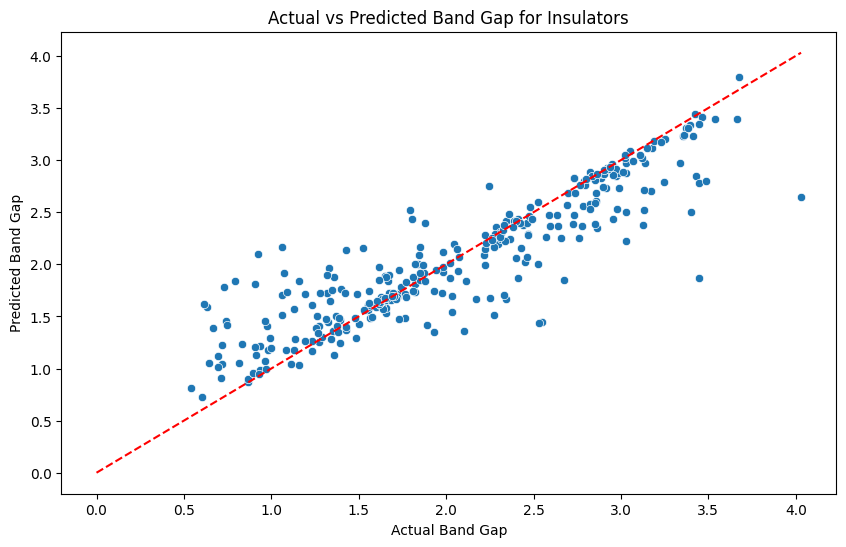

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataframe
data = pd.read_excel("dataset_excavate.xlsx")
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Preprocessing
# Check for missing values
print(df.isnull().sum())

# Convert non-numeric columns to numeric (if applicable)
# For categorical columns, use Label Encoding or OneHot Encoding
for column in df.select_dtypes(include=['object']).columns:
    try:
        # If a column is categorical, try encoding it
        df[column] = LabelEncoder().fit_transform(df[column].astype(str))
    except Exception as e:
        print(f"Could not encode column {column} due to {e}")

# Handle missing values by filling with mean for numeric columns
df.fillna(df.mean(), inplace=True)

# Feature selection for classification
X_classification = df.drop(columns=['PBE band gap'])
y_classification = (df['PBE band gap'] >= 0.5).astype(int)  # 1 for insulators, 0 for non-insulators

# Split the dataset into training and testing sets (80-20 split)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Create and train the classification model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = classifier.predict(X_test_class)

# Evaluate the classification model
print(classification_report(y_test_class, y_pred_class))

# Calculate accuracy for classification
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {classification_accuracy}')

# Creating a DataFrame to display actual vs predicted values for classification
classification_results = pd.DataFrame({
    'Actual': y_test_class,
    'Predicted': y_pred_class
})

print("\nClassification Results (Actual vs Predicted):")
print(classification_results)

# Now for the regression task, we only use insulators
insulators_data = df[df['PBE band gap'] > 0.5]
X_regression = insulators_data.drop(columns=['PBE band gap'])
y_regression = insulators_data['PBE band gap']

# Split the insulator dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Create and train the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = regressor.predict(X_test_reg)

# Evaluate the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Mean Squared Error for Regression: {mse}')

# Calculating R^2 for regression
r2 = r2_score(y_test_reg, y_pred_reg)
print(f'R^2 Score for Regression: {r2}')

# DataFrame for actual vs predicted values for regression
regression_results = pd.DataFrame({
    'Actual': y_test_reg,
    'Predicted': y_pred_reg
})

classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {classification_accuracy}')


print("\nRegression Results (Actual vs Predicted):")
print(regression_results)

# OUTPUTS on screen
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs Predicted Band Gap for Insulators')
plt.plot([0, max(y_test_reg)], [0, max(y_test_reg)], color='red', linestyle='--')  # Diagonal line
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_excel('dataset_excavate.xlsx')

# Display the first few rows of the dataset
print(data.head(3))

# Check the column names to ensure correct referencing
print("Column names in the dataset:")
print(data.columns)

# Check unique values in the 'PBE band gap' column
if 'PBE band gap' in data.columns:
    print("Unique values in 'PBE band gap':")
    print(data['PBE band gap'].unique())

# Preprocess the data
if 'PBE band gap' in data.columns:
    # Remove non-numeric values from 'PBE band gap'
    data = data[pd.to_numeric(data['PBE band gap'], errors='coerce').notna()]

    # Convert the column to numeric
    data['PBE band gap'] = pd.to_numeric(data['PBE band gap'], errors='coerce')

    # Drop rows with NaN values
    data = data.dropna(subset=['PBE band gap'])

    # Create a new column 'Insulator' (1 for insulators, 0 for non-insulators)
    data['Insulator'] = np.where(data['PBE band gap'] > 0.5, 1, 0)
else:
    raise ValueError("Column 'PBE band gap' not found in the dataset.")

# Feature selection (excluding target variable and non-feature columns)
features = data.drop(columns=['PBE band gap', 'Insulator', 'functional group'], errors='ignore')
target = data['Insulator']

# Identify categorical columns
categorical_cols = features.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Apply one-hot encoding for categorical columns
features = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

# Ensure no missing values remain
features = features.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train and evaluate multiple classification models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    print(f"Training {name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"\n{name} Model Evaluation:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

  functional group   A  A_OS  A'  A'_OS  A_HOMO-  A_HOMO+   A_IE-   A_IE+  \
0       AgBaAuCdO6  Ag     3  Ba      2    0.585    -3.82  114.05  616.95   
1       AgBaAuHgO6  Ag     3  Ba      2    0.585    -3.82  114.05  616.95   
2       AgBaMoCdO6  Ag     3  Ba      2    0.585    -3.82  114.05  616.95   

   A_LUMO-  ...   B_X+  B_Z_radii-  B_Z_radii+  B_e_affin-  B_e_affin+  \
0   0.6485  ...  2.115      0.2225      2.4375       145.4        77.4   
1   0.6485  ...  2.270      0.1250      2.5350       135.4        87.4   
2   0.6485  ...  1.925      0.2525      2.4675        70.0         2.0   

   PBE band gap        μ       μĀ     μ𝐵 ̅        t  
0           0.0  0.54286  0.13571  0.13571  0.92317  
1           0.0  0.56786  0.13571  0.16071  0.90845  
2           0.0  0.55714  0.13571  0.12143  0.91470  

[3 rows x 38 columns]
Column names in the dataset:
Index(['functional group', 'A', 'A_OS', 'A'', 'A'_OS', 'A_HOMO-', 'A_HOMO+',
       'A_IE-', 'A_IE+', 'A_LUMO-', 'A_LUMO+', 'A

  functional group   A  A_OS  A'  A'_OS  A_HOMO-  A_HOMO+   A_IE-   A_IE+  \
0       AgBaAuCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
1       AgBaAuHgO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
2       AgBaMoCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
3           AgBiO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   
4           AgBrO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   

   A_LUMO-  ...   B_X+  B_Z_radii-  B_Z_radii+  B_e_affin-  B_e_affin+  \
0   0.6485  ...  2.115      0.2225      2.4375       145.4        77.4   
1   0.6485  ...  2.270      0.1250      2.5350       135.4        87.4   
2   0.6485  ...  1.925      0.2525      2.4675        70.0         2.0   
3   0.0000  ...  2.020      0.0000      1.9970         0.0        91.3   
4   0.0000  ...  2.960      0.0000      1.2000         0.0       324.7   

   PBE band gap        μ       μĀ     μ𝐵 ̅        t  
0        0.0000  0.54286  0.13571  0.1

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


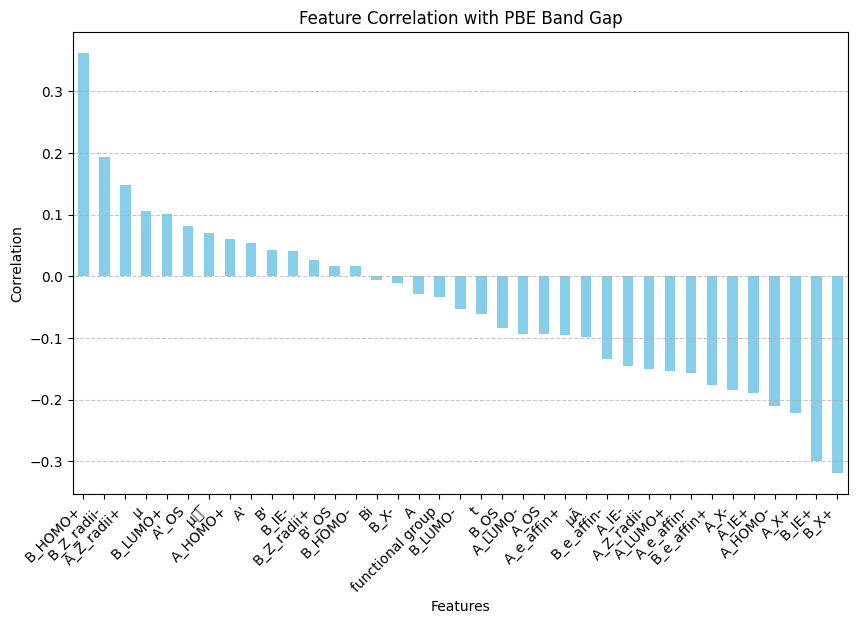

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataframe
data = pd.read_excel("dataset_excavate.xlsx")
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Preprocessing
# Check for missing values
print(df.isnull().sum())

# Convert non-numeric columns to numeric using Label Encoding
for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = LabelEncoder().fit_transform(df[column].astype(str))
    except Exception as e:
        print(f"Could not encode column {column} due to {e}")

# Handle missing values by filling with mean for numeric columns
df.fillna(df.mean(), inplace=True)

# --- Classification ---
X_classification = df.drop(columns=['PBE band gap'])
y_classification = (df['PBE band gap'] >= 0.5).astype(int)

# ... (rest of your classification code)

# --- Regression ---
insulators_data = df[df['PBE band gap'] > 0.5]
X_regression = insulators_data.drop(columns=['PBE band gap'])
y_regression = insulators_data['PBE band gap']

# ... (rest of your regression code)

# --- Correlation ---
# 1. Select only numeric columns:
numeric_features = df.select_dtypes(include=np.number)

# 2. Calculate correlation for numeric features:
correlations = numeric_features.corr()["PBE band gap"].sort_values(ascending=False)

# 3. Display correlations:
print(correlations)
# Plot correlation as a bar chart
plt.figure(figsize=(10, 6))
correlations.drop("PBE band gap").plot(kind="bar", color="skyblue")  # Drop target variable itself
plt.title("Feature Correlation with PBE Band Gap")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


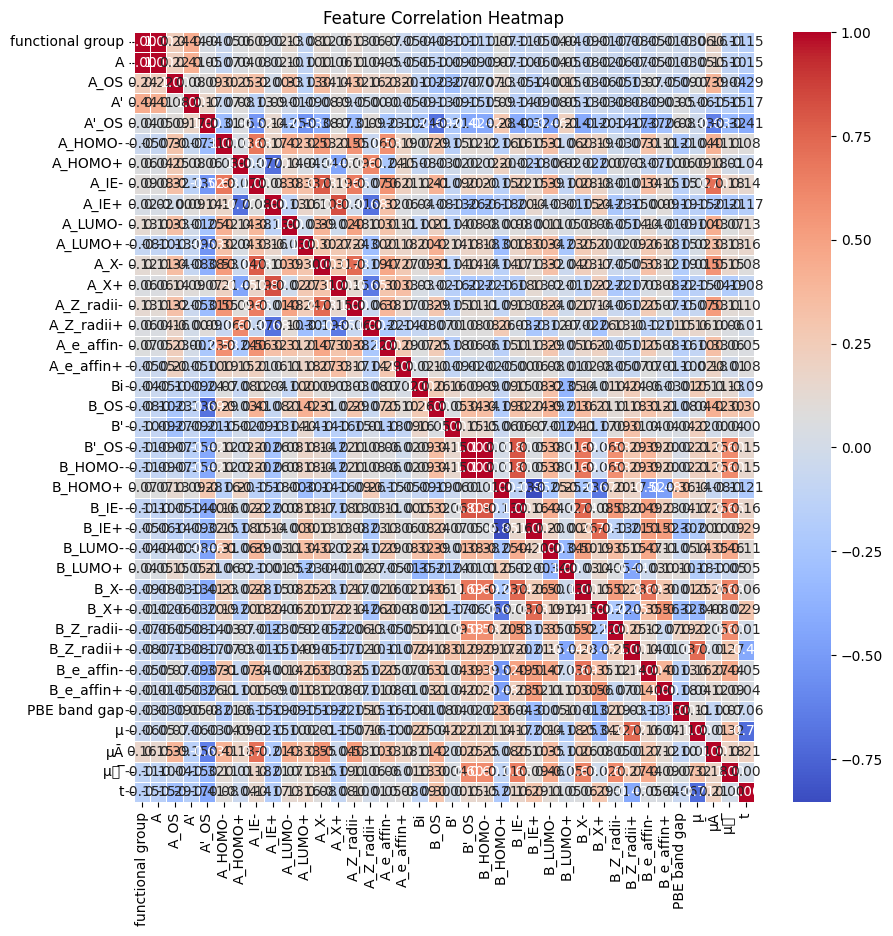

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
file_path = "dataset_excavate.xlsx"  # Update with your path if needed
df = pd.read_excel(file_path)

# --- Data Preprocessing ---
df_processed = df.copy()

# Encode categorical columns
categorical_cols = ['functional group', 'A', "A'", 'Bi', "B'"]
for col in categorical_cols:
    df_processed[col] = LabelEncoder().fit_transform(df_processed[col].astype(str))

# Define features (X) and target (y) for Classification
X_classification = df_processed.drop(columns=['PBE band gap'])
y_classification = (df_processed['PBE band gap'] >= 0.5).astype(int)  # Binary classification

# Define features (X) and target (y) for Regression (Only for insulators with band gap > 0.5)
insulators_data = df_processed[df_processed['PBE band gap'] > 0.5]
X_regression = insulators_data.drop(columns=['PBE band gap'])
y_regression = insulators_data['PBE band gap']

# Normalize numerical features
scaler = StandardScaler()
X_classification = scaler.fit_transform(X_classification)
X_regression = scaler.transform(X_regression)

# Split data into training & testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# --- Build Classification Model ---
classification_model = keras.Sequential([
    layers.Input(shape=(X_classification.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

classification_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train Classification Model
classification_model.fit(X_train_cls, y_train_cls, epochs=20, batch_size=32, validation_data=(X_test_cls, y_test_cls))

# Evaluate Classification Model
cls_loss, cls_accuracy = classification_model.evaluate(X_test_cls, y_test_cls)
print(f"Classification Accuracy: {cls_accuracy:.4f}")

# --- Build Regression Model ---
regression_model = keras.Sequential([
    layers.Input(shape=(X_regression.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Output layer for regression
])

regression_model.compile(optimizer="adam", loss="mse", metrics=["mae", "mse"])

# Train Regression Model
regression_model.fit(X_train_reg, y_train_reg, epochs=20, batch_size=32, validation_data=(X_test_reg, y_test_reg))

# Evaluate Regression Model
reg_loss, reg_mae, reg_mse = regression_model.evaluate(X_test_reg, y_test_reg)
print(f"Regression MAE: {reg_mae:.4f}, MSE: {reg_mse:.4f}")


Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6863 - loss: 0.5613 - val_accuracy: 0.7818 - val_loss: 0.4670
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8117 - loss: 0.4172 - val_accuracy: 0.8186 - val_loss: 0.4122
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8384 - loss: 0.3712 - val_accuracy: 0.8361 - val_loss: 0.3778
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8651 - loss: 0.3352 - val_accuracy: 0.8293 - val_loss: 0.3615
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8778 - loss: 0.3021 - val_accuracy: 0.8448 - val_loss: 0.3385
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8933 - loss: 0.2741 - val_accuracy: 0.8526 - val_loss: 0.3404
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8960 - loss: 0.2545 - val_accuracy: 0.8603 - val_loss: 0.3159
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9003 - loss: 0.2478 - val_accuracy: 0.

  functional group   A  A_OS  A'  A'_OS  A_HOMO-  A_HOMO+   A_IE-   A_IE+  \
0       AgBaAuCdO6  Ag     3  Ba      2    0.585    -3.82  114.05  616.95   
1       AgBaAuHgO6  Ag     3  Ba      2    0.585    -3.82  114.05  616.95   
2       AgBaMoCdO6  Ag     3  Ba      2    0.585    -3.82  114.05  616.95   

   A_LUMO-  ...   B_X+  B_Z_radii-  B_Z_radii+  B_e_affin-  B_e_affin+  \
0   0.6485  ...  2.115      0.2225      2.4375       145.4        77.4   
1   0.6485  ...  2.270      0.1250      2.5350       135.4        87.4   
2   0.6485  ...  1.925      0.2525      2.4675        70.0         2.0   

   PBE band gap        μ       μĀ     μ𝐵 ̅        t  
0           0.0  0.54286  0.13571  0.13571  0.92317  
1           0.0  0.56786  0.13571  0.16071  0.90845  
2           0.0  0.55714  0.13571  0.12143  0.91470  

[3 rows x 38 columns]
Unique values in 'PBE band gap':
[0.     0.1524 0.0215 ... 0.0992 0.2492 0.1125]
Categorical columns: Index(['A', 'A'', 'Bi', 'B''], dtype='object')
Traini

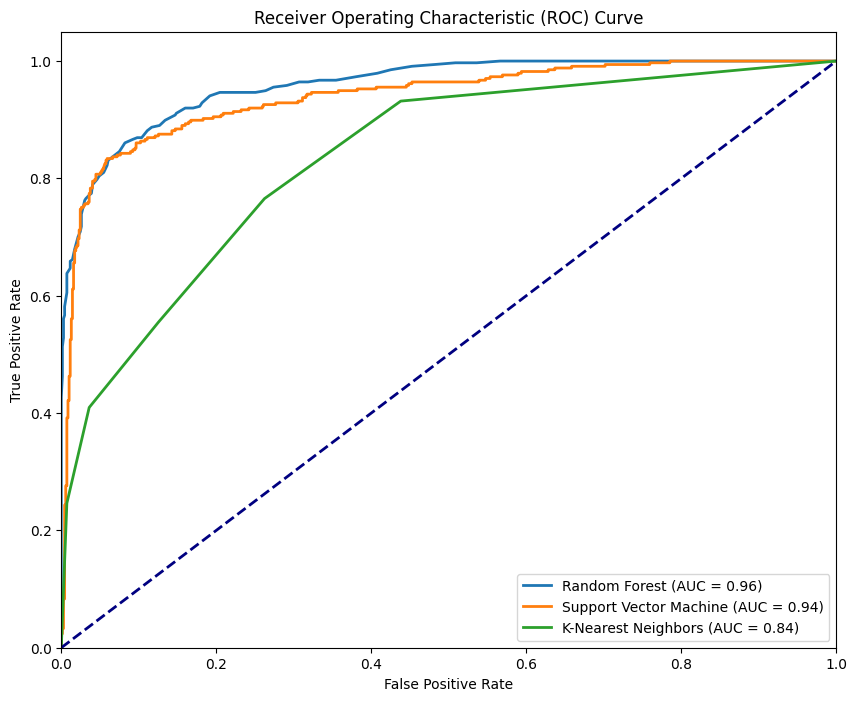

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('dataset_excavate.xlsx')

# Display the first few rows of the dataset
print(data.head(3))

# Check unique values in the 'PBE band gap' column
if 'PBE band gap' in data.columns:
    print("Unique values in 'PBE band gap':")
    print(data['PBE band gap'].unique())

# Preprocess the data
if 'PBE band gap' in data.columns:
    # Remove non-numeric values from 'PBE band gap'
    data = data[pd.to_numeric(data['PBE band gap'], errors='coerce').notna()]

    # Convert the column to numeric
    data['PBE band gap'] = pd.to_numeric(data['PBE band gap'], errors='coerce')

    # Drop rows with NaN values
    data = data.dropna(subset=['PBE band gap'])

    # Create a new column 'Insulator' (1 for insulators, 0 for non-insulators)
    data['Insulator'] = np.where(data['PBE band gap'] > 0.5, 1, 0)
else:
    raise ValueError("Column 'PBE band gap' not found in the dataset.")

# Feature selection (excluding target variable and non-feature columns)
features = data.drop(columns=['PBE band gap', 'Insulator', 'functional group'], errors='ignore')
target = data['Insulator']

# Identify categorical columns
categorical_cols = features.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Apply one-hot encoding for categorical columns
features = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

# Ensure no missing values remain
features = features.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train and evaluate multiple classification models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42, probability=True),  # SVC needs probability=True for predict_proba
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for name, model in models.items():
    print(f"Training {name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Evaluate the model
    print(f"\n{name} Model Evaluation:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_value = roc_auc_score(y_test, y_prob)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc_value:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Epoch TF



Epoch 1/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6925 - loss: 0.6198 - val_accuracy: 0.7507 - val_loss: 0.5006
Epoch 2/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8044 - loss: 0.4237 - val_accuracy: 0.8021 - val_loss: 0.4005
Epoch 3/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8278 - loss: 0.3849 - val_accuracy: 0.8390 - val_loss: 0.3524
Epoch 4/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8281 - loss: 0.3640 - val_accuracy: 0.8468 - val_loss: 0.3490
Epoch 5/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8452 - loss: 0.3433 - val_accuracy: 0.8652 - val_loss: 0.3238
Epoch 6/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8484 - loss: 0.3417 - val_accuracy: 0.8700 - val_loss: 0.3151
Epoch 7/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8638 - loss: 0.3149 - val_accuracy: 0.8720 - val_loss: 0.2923
Epoch 8/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8674 - loss: 0.2971 - val_accuracy: 

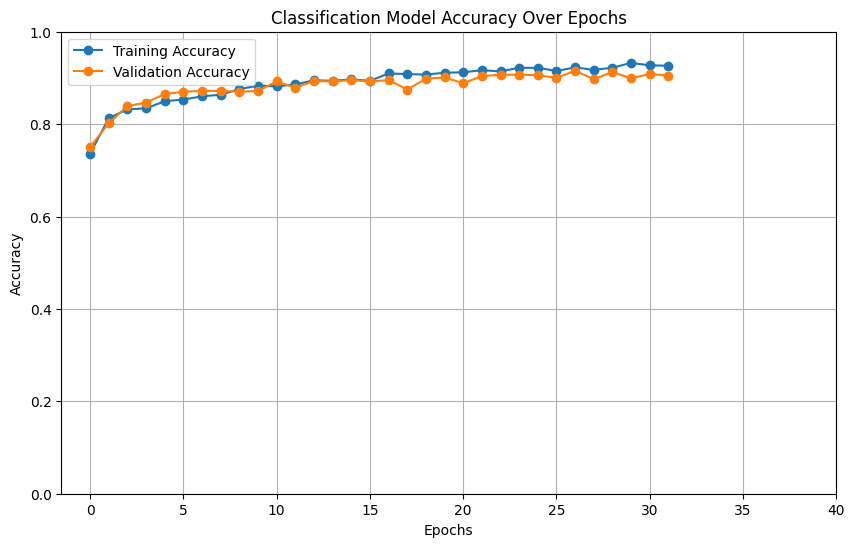

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the dataset
file_path = "dataset_excavate.xlsx"  # Update with your path if needed
df = pd.read_excel(file_path)

# --- Data Preprocessing ---
df_processed = df.copy()

# Encode categorical columns
categorical_cols = ['functional group', 'A', "A'", 'Bi', "B'"]
for col in categorical_cols:
    df_processed[col] = LabelEncoder().fit_transform(df_processed[col].astype(str))

# Define features (X) and target (y) for Classification
X_classification = df_processed.drop(columns=['PBE band gap'])
y_classification = (df_processed['PBE band gap'] >= 0.5).astype(int)  # Binary classification

# Normalize numerical features
scaler = StandardScaler()
X_classification = scaler.fit_transform(X_classification)

# Split data into training & testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# --- Build Enhanced Classification Model ---
classification_model = keras.Sequential([
    layers.Input(shape=(X_classification.shape[1],)),
    layers.Dense(512, activation="relu"),  # Increased number of neurons
    layers.BatchNormalization(),
    layers.Dropout(0.4),  # Increased dropout rate
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

classification_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                              loss="binary_crossentropy",
                              metrics=["accuracy"])

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Classification Model and store history
history_cls = classification_model.fit(X_train_cls, y_train_cls, epochs=40, batch_size=32,  # Increased epochs
                                        validation_data=(X_test_cls, y_test_cls),
                                        callbacks=[early_stopping])

# Evaluate Classification Model
cls_loss, cls_accuracy = classification_model.evaluate(X_test_cls, y_test_cls)
print(f"Classification Accuracy: {cls_accuracy:.4f}")

# Make predictions
y_pred_cls = (classification_model.predict(X_test_cls) > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_cls, y_pred_cls)
recall = recall_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# --- 2D Plot for Classification Accuracy ---
plt.figure(figsize=(10, 6))
plt.plot(history_cls.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_cls.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Classification Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 41, 5))  # Set x-ticks for epochs
plt.ylim(0, 1)  # Set y-limits
plt.grid()
plt.legend()
plt.show()

In [ ]:
import pandas as pd
df = pd.read_excel("dataset_excavate.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   functional group  5152 non-null   object 
 1   B_HOMO            5152 non-null   object 
 2   A_OS              5152 non-null   int64  
 3   A'                5152 non-null   object 
 4   A'_OS             5152 non-null   int64  
 5   A_HOMO-           5152 non-null   float64
 6   A_HOMO+           5152 non-null   float64
 7   A_IE-             5152 non-null   float64
 8   A_IE+             5152 non-null   float64
 9   A_LUMO-           5152 non-null   float64
 10  A_LUMO+           5152 non-null   float64
 11  A_X-              5152 non-null   float64
 12  A_X+              5152 non-null   float64
 13  A_Z_radii-        5152 non-null   float64
 14  A_Z_radii+        5152 non-null   float64
 15  A_e_affin-        5152 non-null   float64
 16  A_e_affin+        5152 non-null   float64
